In [1]:
from sotip import *
import numpy as np
import scanpy as sc
import os
import squidpy as sq

# Mixed

In [195]:
pd_df = pd.read_csv('DMA_validate/DMA_validate_M_thre1_500times.csv')

In [196]:
pd_df['occurrence_score'] = pd_df['ME_int']/pd_df['ME_int_bg_mean']

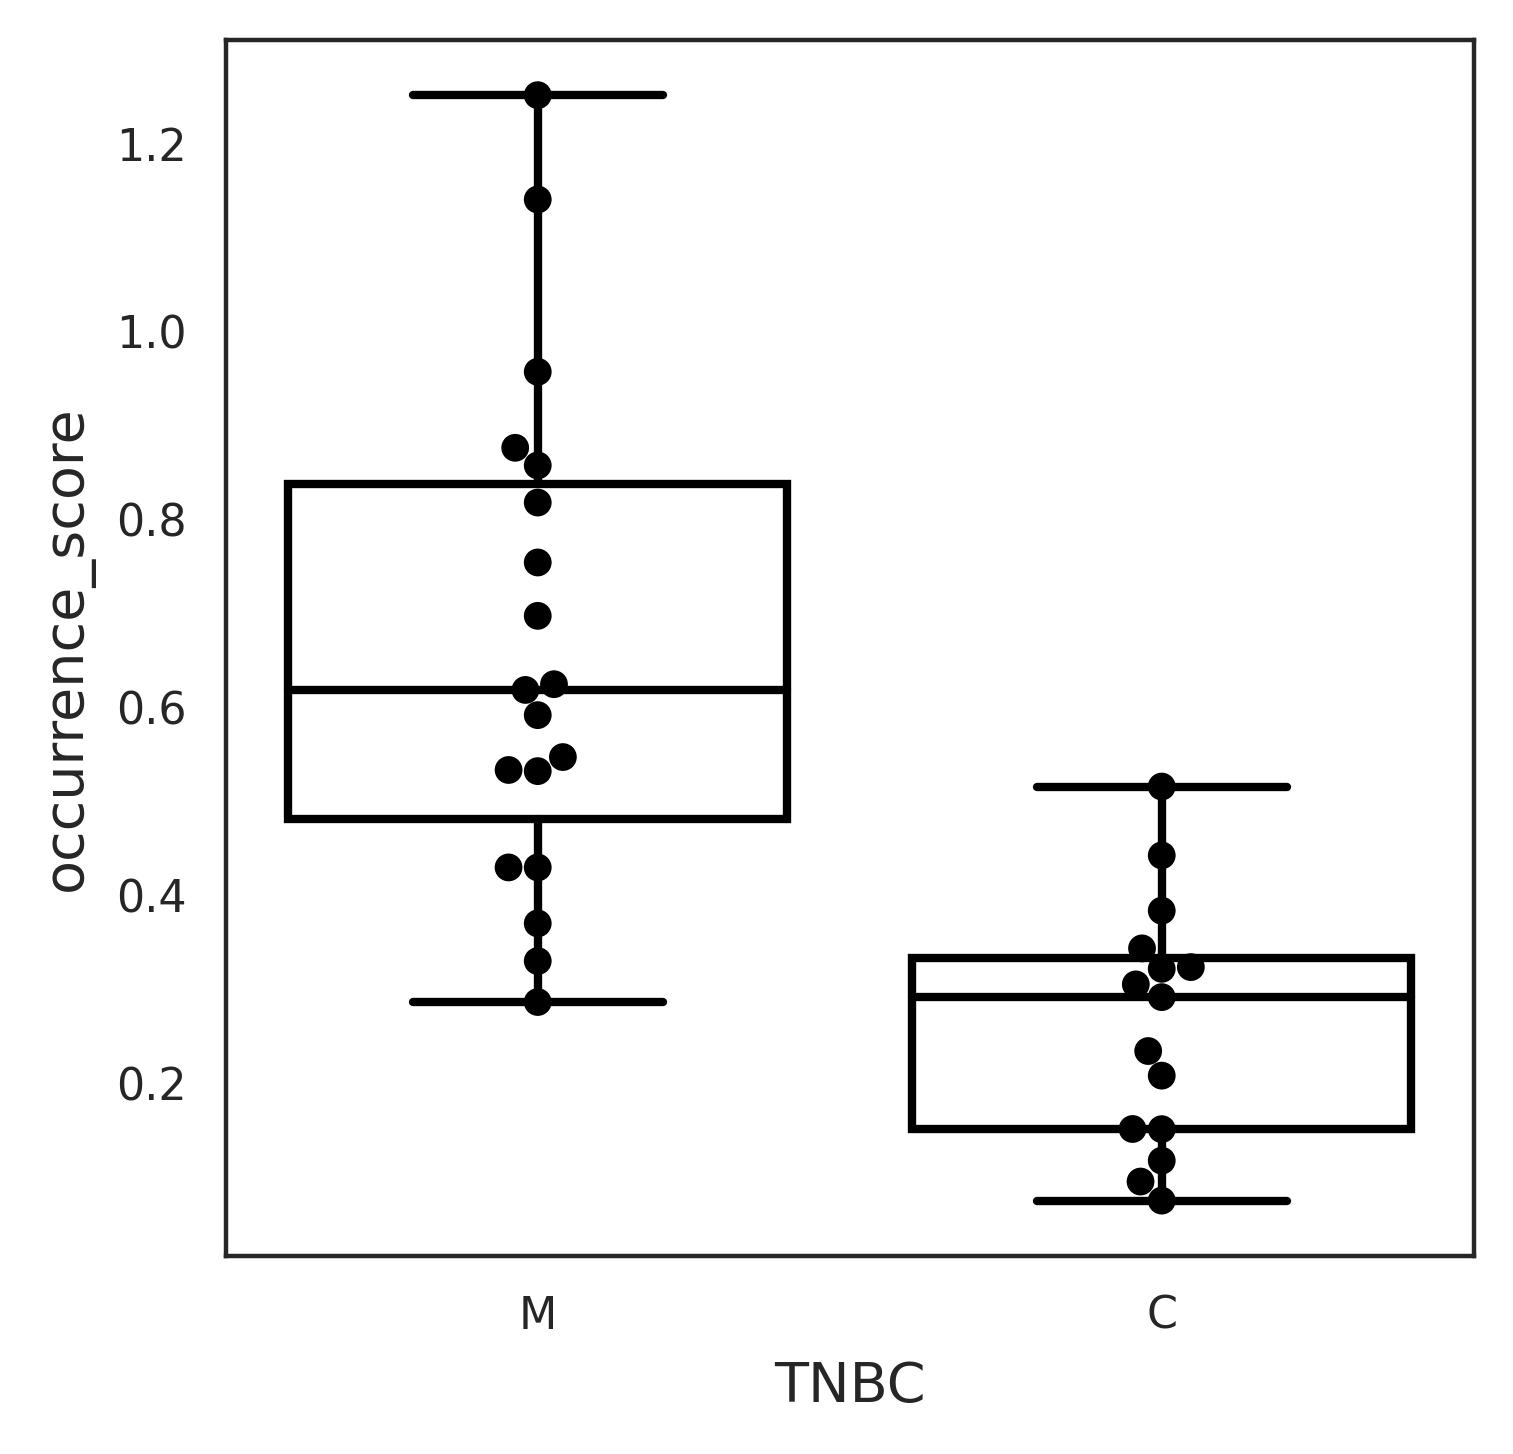

In [44]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

In [18]:
import pingouin
from scipy.stats import *

In [17]:
pingouin.mwu(pd_df[pd_df.TNBC=='M']['occurrence_score'],pd_df[pd_df.TNBC=='C']['occurrence_score'],alternative='greater')

U-val alternative    p-val       RBC      CLES
MWU  266.0     greater  0.00001 -0.866667  0.933333

In [21]:
ranksums(pd_df[pd_df.TNBC=='M']['occurrence_score'],pd_df[pd_df.TNBC=='C']['occurrence_score'],alternative='greater')



RanksumsResult(statistic=4.283523249449153, pvalue=9.197843315104657e-06)

# Comp

In [30]:
pd_df = pd.read_csv('DMA_validate/DMA_validate_C_thre1_500times.csv')

In [31]:
pd_df['occurrence_score'] = pd_df['ME_int']/pd_df['ME_int_bg_mean']

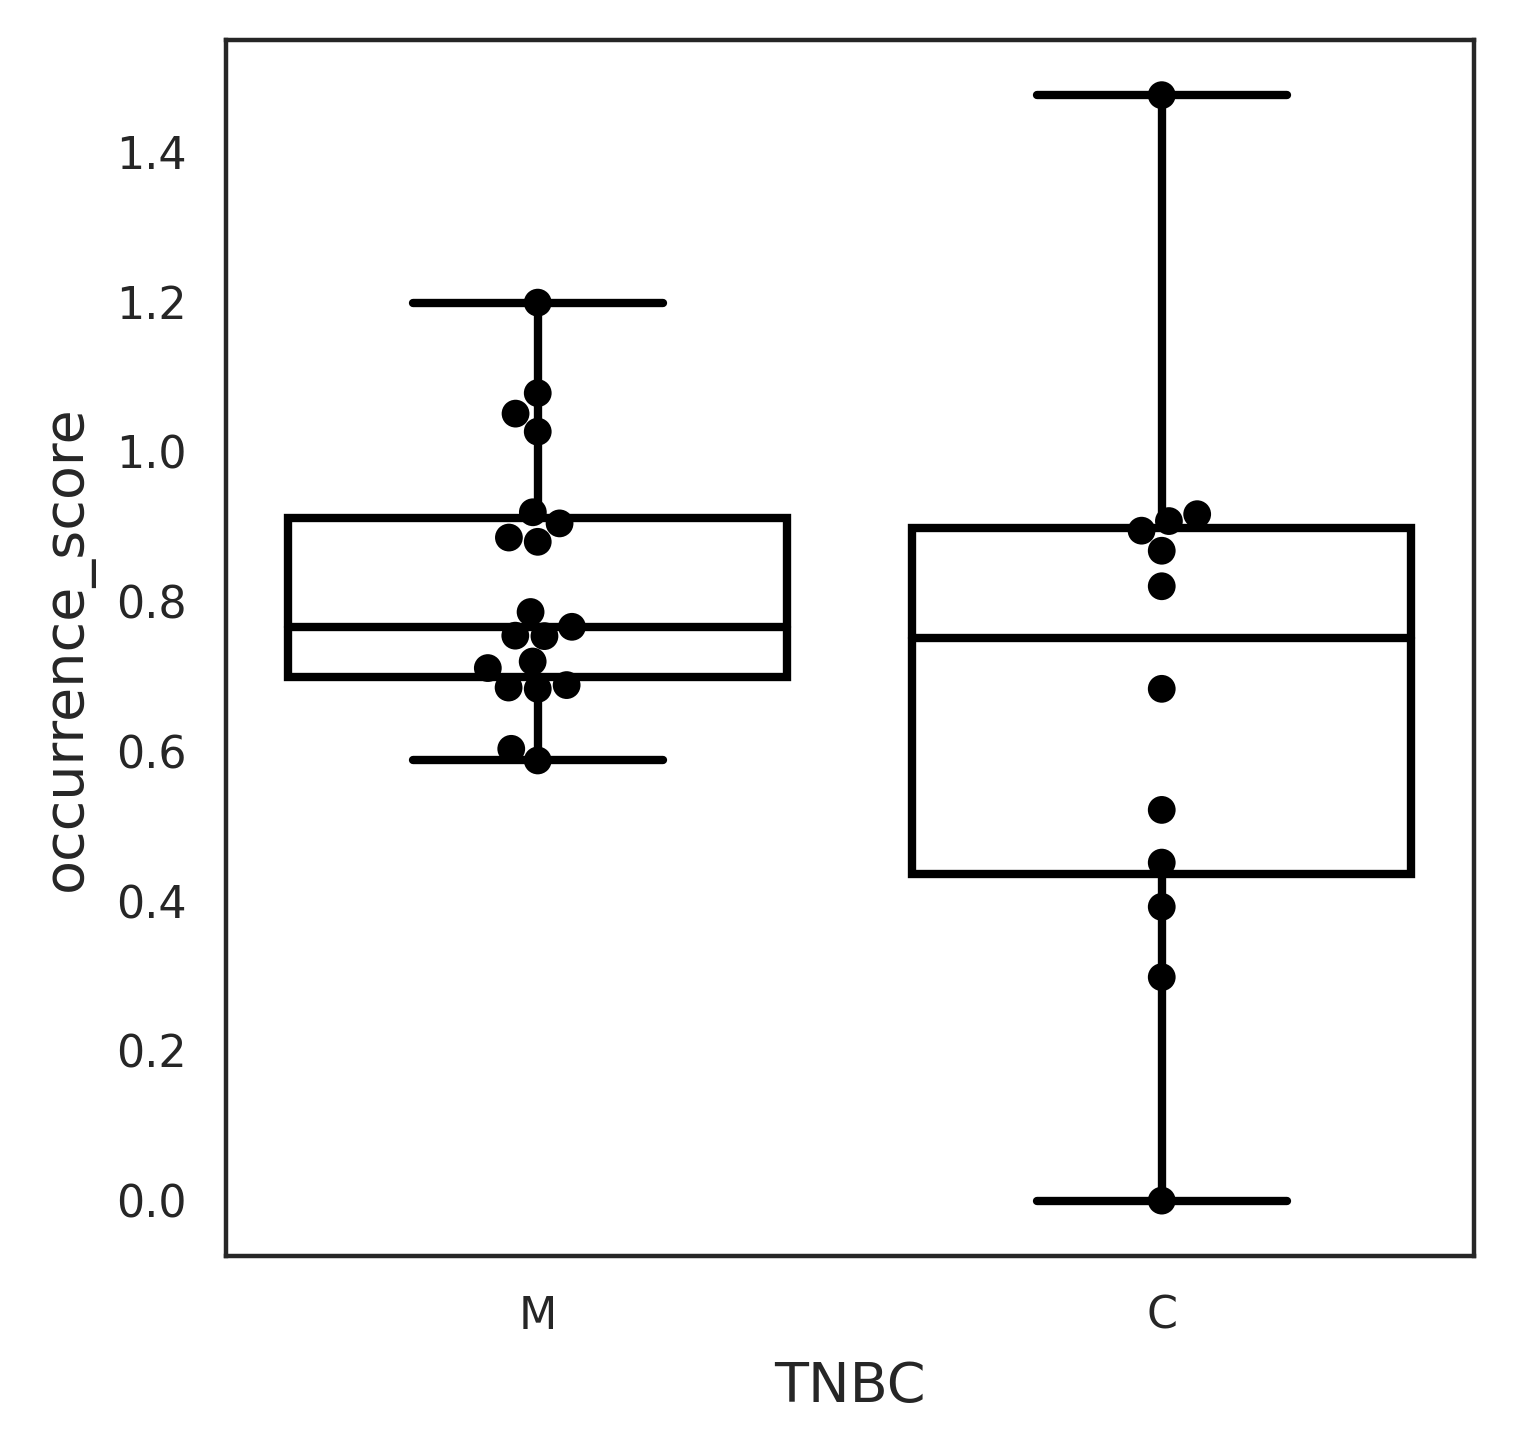

In [37]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

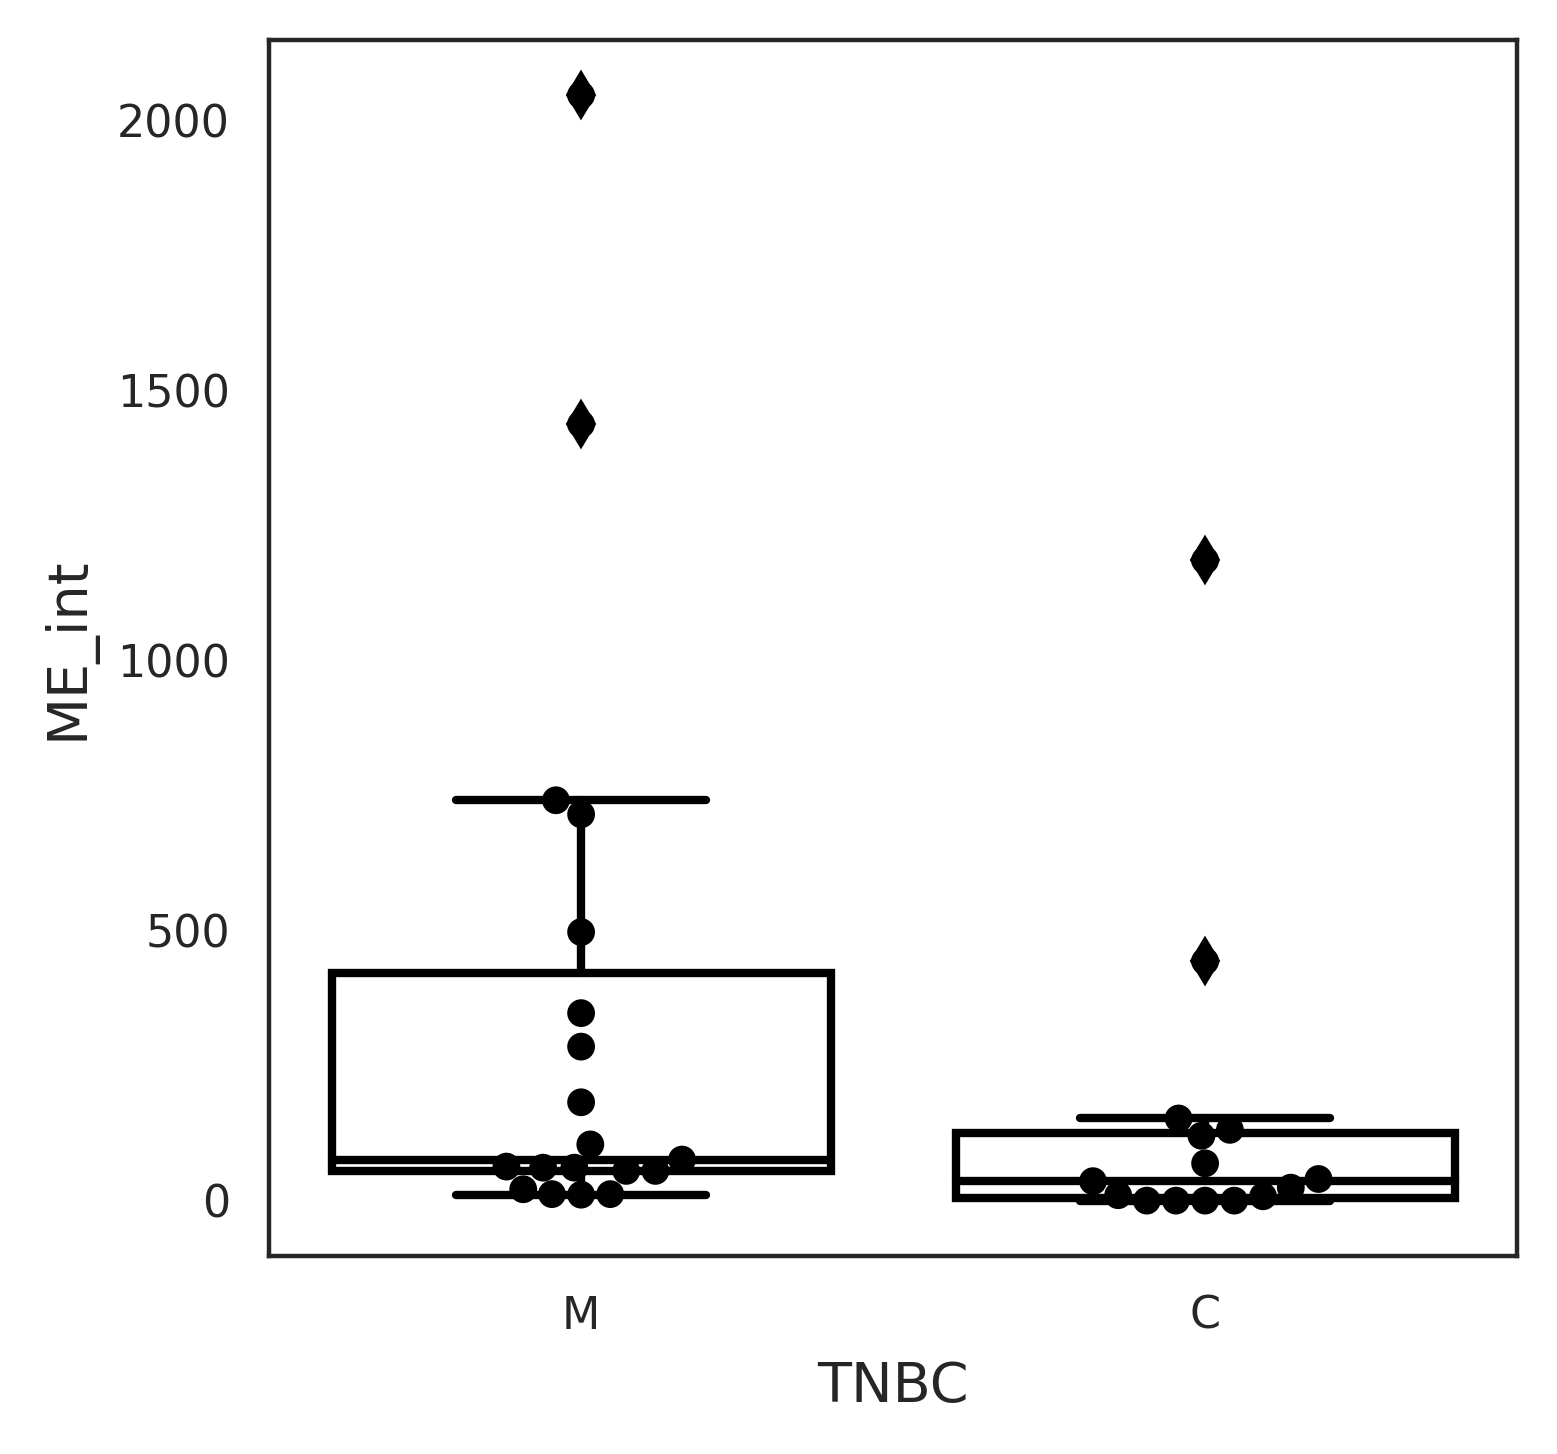

In [33]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="ME_int", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="ME_int", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

In [18]:
import pingouin
from scipy.stats import *

In [17]:
pingouin.mwu(pd_df[pd_df.TNBC=='M']['occurrence_score'],pd_df[pd_df.TNBC=='C']['occurrence_score'],alternative='greater')

U-val alternative    p-val       RBC      CLES
MWU  266.0     greater  0.00001 -0.866667  0.933333

In [38]:
ranksums(pd_df[pd_df.TNBC=='C']['occurrence_score'],pd_df[pd_df.TNBC=='M']['occurrence_score'],alternative='two-sided')



RanksumsResult(statistic=-0.0173421993904824, pvalue=0.986163620412307)

In [36]:
ranksums(pd_df[pd_df.TNBC=='C']['ME_int'],pd_df[pd_df.TNBC=='M']['ME_int'],alternative='less')



RanksumsResult(statistic=-1.994352929905476, pvalue=0.02305674932606749)

# Comp thre2

In [39]:
pd_df = pd.read_csv('DMA_validate/DMA_validate_C_thre2_100times.csv')

In [45]:
pd_df['occurrence_score'] = (pd_df['ME_int']+1)/(pd_df['ME_int_bg_mean']+1)

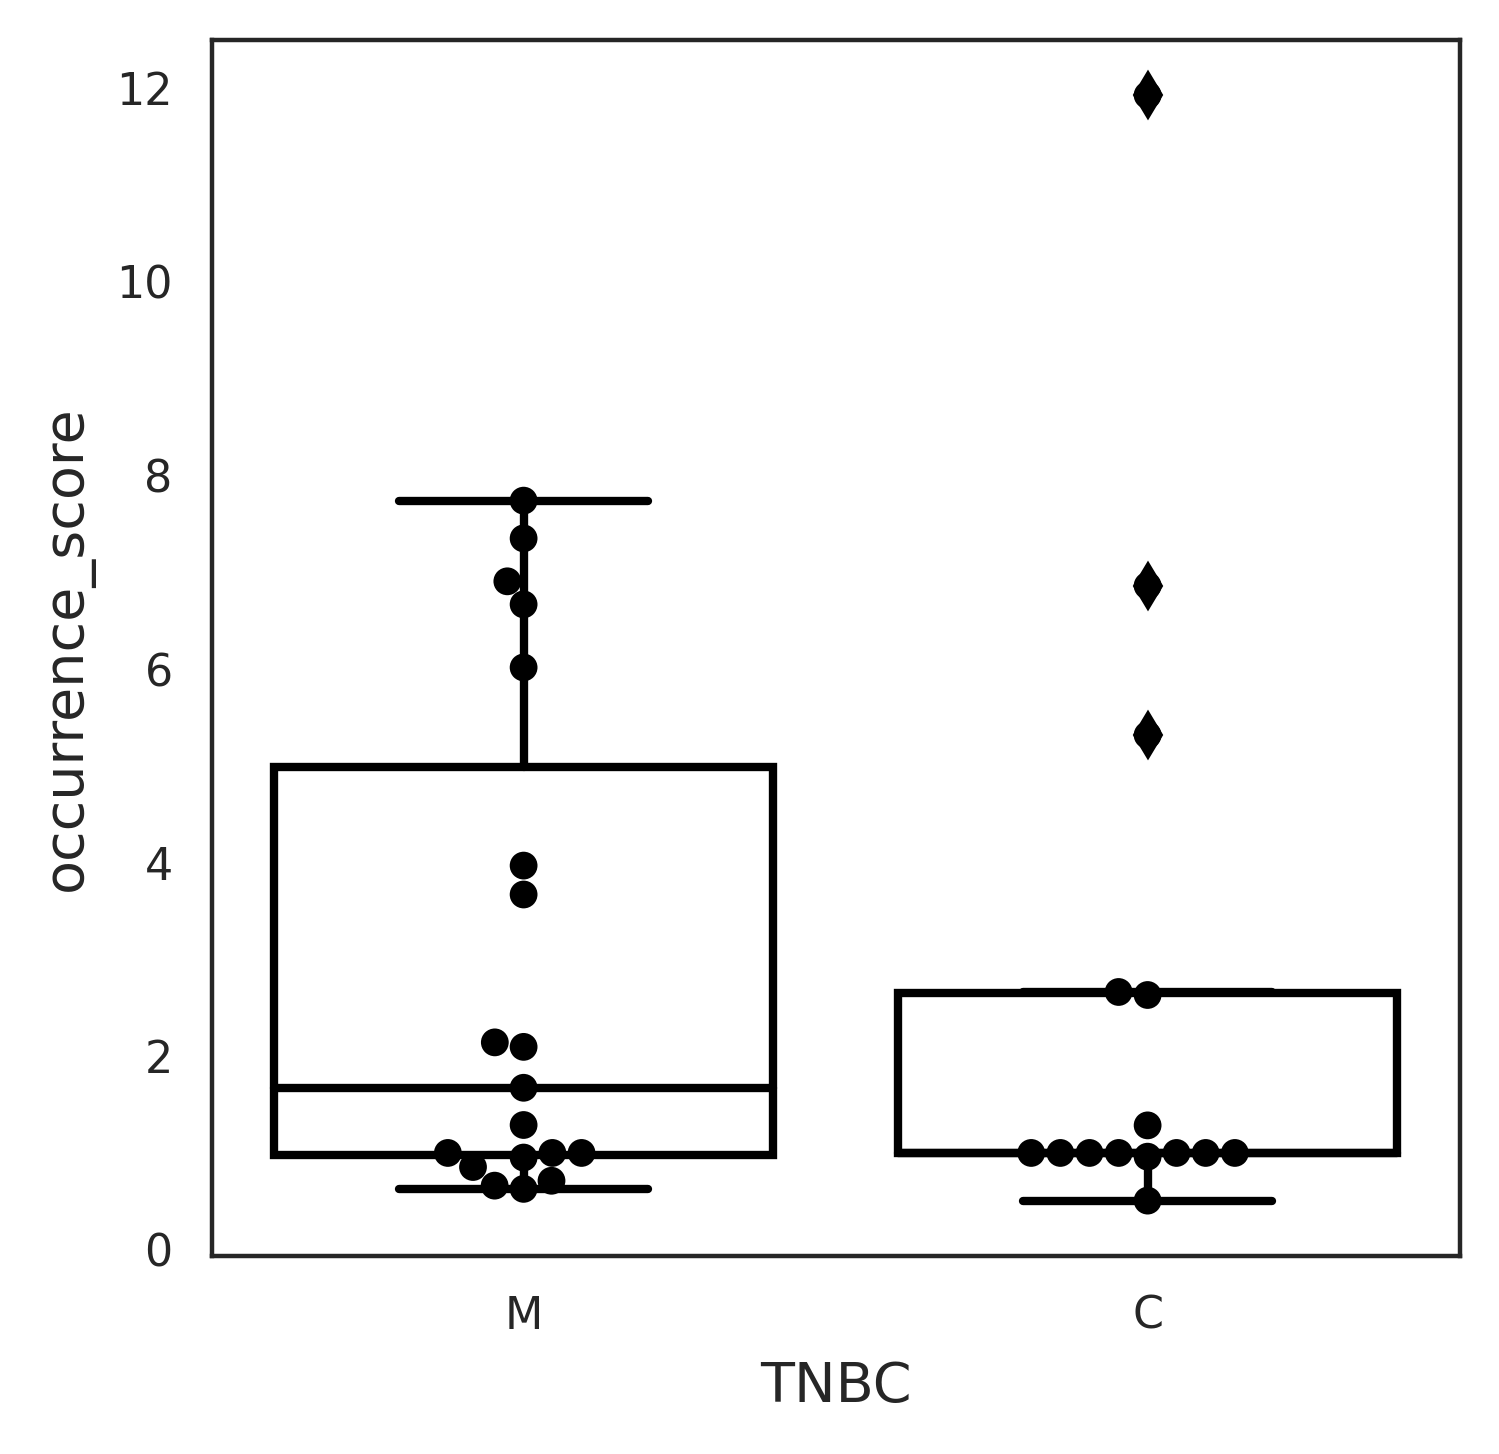

In [46]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="occurrence_score", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

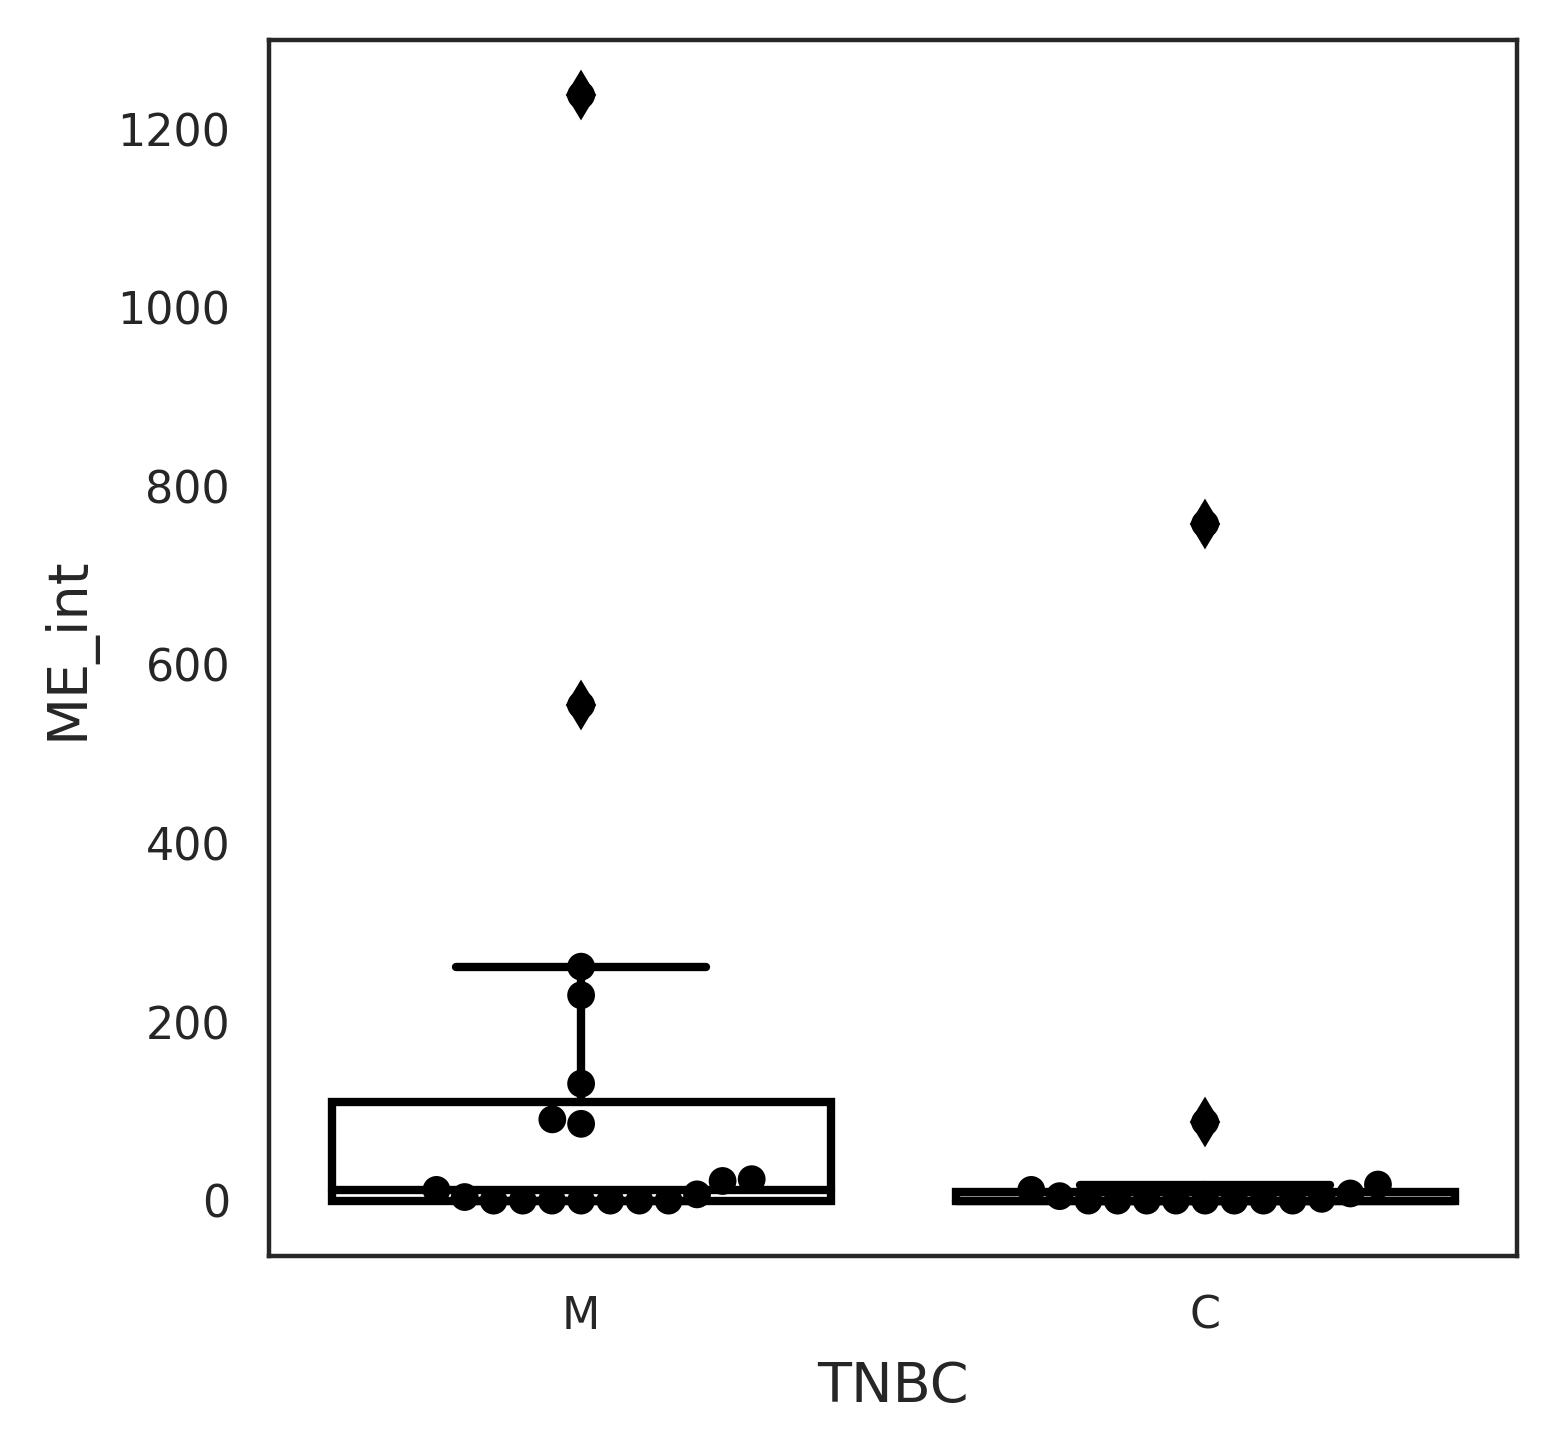

In [47]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="ME_int", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="ME_int", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

In [43]:
ranksums(pd_df[pd_df.TNBC=='C']['occurrence_score'],pd_df[pd_df.TNBC=='M']['occurrence_score'],alternative='two-sided')



RanksumsResult(statistic=1.5434557457529336, pvalue=0.12272023700498151)

# load survival information

In [2]:
import pandas as pd

In [5]:
patient_info = pd.read_excel('DMA_validate/TNBC_patient_info.xlsx')

In [52]:
patient_survival_dict = dict(zip(patient_info.values[:,0],patient_info.values[:,-2]))
patient_censored_dict = dict(zip(patient_info.values[:,0],patient_info.values[:,-1]))

In [53]:
patient_censored_dict

{'InternalId': 'Censored',
 1: 0,
 2: 0,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 0,
 14: 1,
 15: 0,
 16: 0,
 17: 0,
 18: 1,
 19: 1,
 20: 1,
 21: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 1,
 27: 0,
 28: 1,
 29: 0,
 30: 1,
 31: 0,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 39: 1,
 40: 0,
 41: 1,
 nan: nan,
 '* Survival was calculated from date of diagnosis. An end date of 1/1/2016 was used for capping.': nan}

In [23]:
pd_df['occurrence_score'] = pd_df['ME_int']/pd_df['ME_int_bg_mean']

In [29]:
pd_df['patient'][0]

1

In [31]:
patient_survival_dict[1]

2612

In [197]:
survival_array = []
censored_array = []
for p in pd_df['patient']:
    if p in patient_survival_dict:
        survival_array.append(patient_survival_dict[p])
        censored_array.append(patient_censored_dict[p])
    else:
        survival_array.append(-1)
        censored_array.append(-1)
        


In [198]:
pd_df['survival'] = survival_array
pd_df['censored'] = censored_array

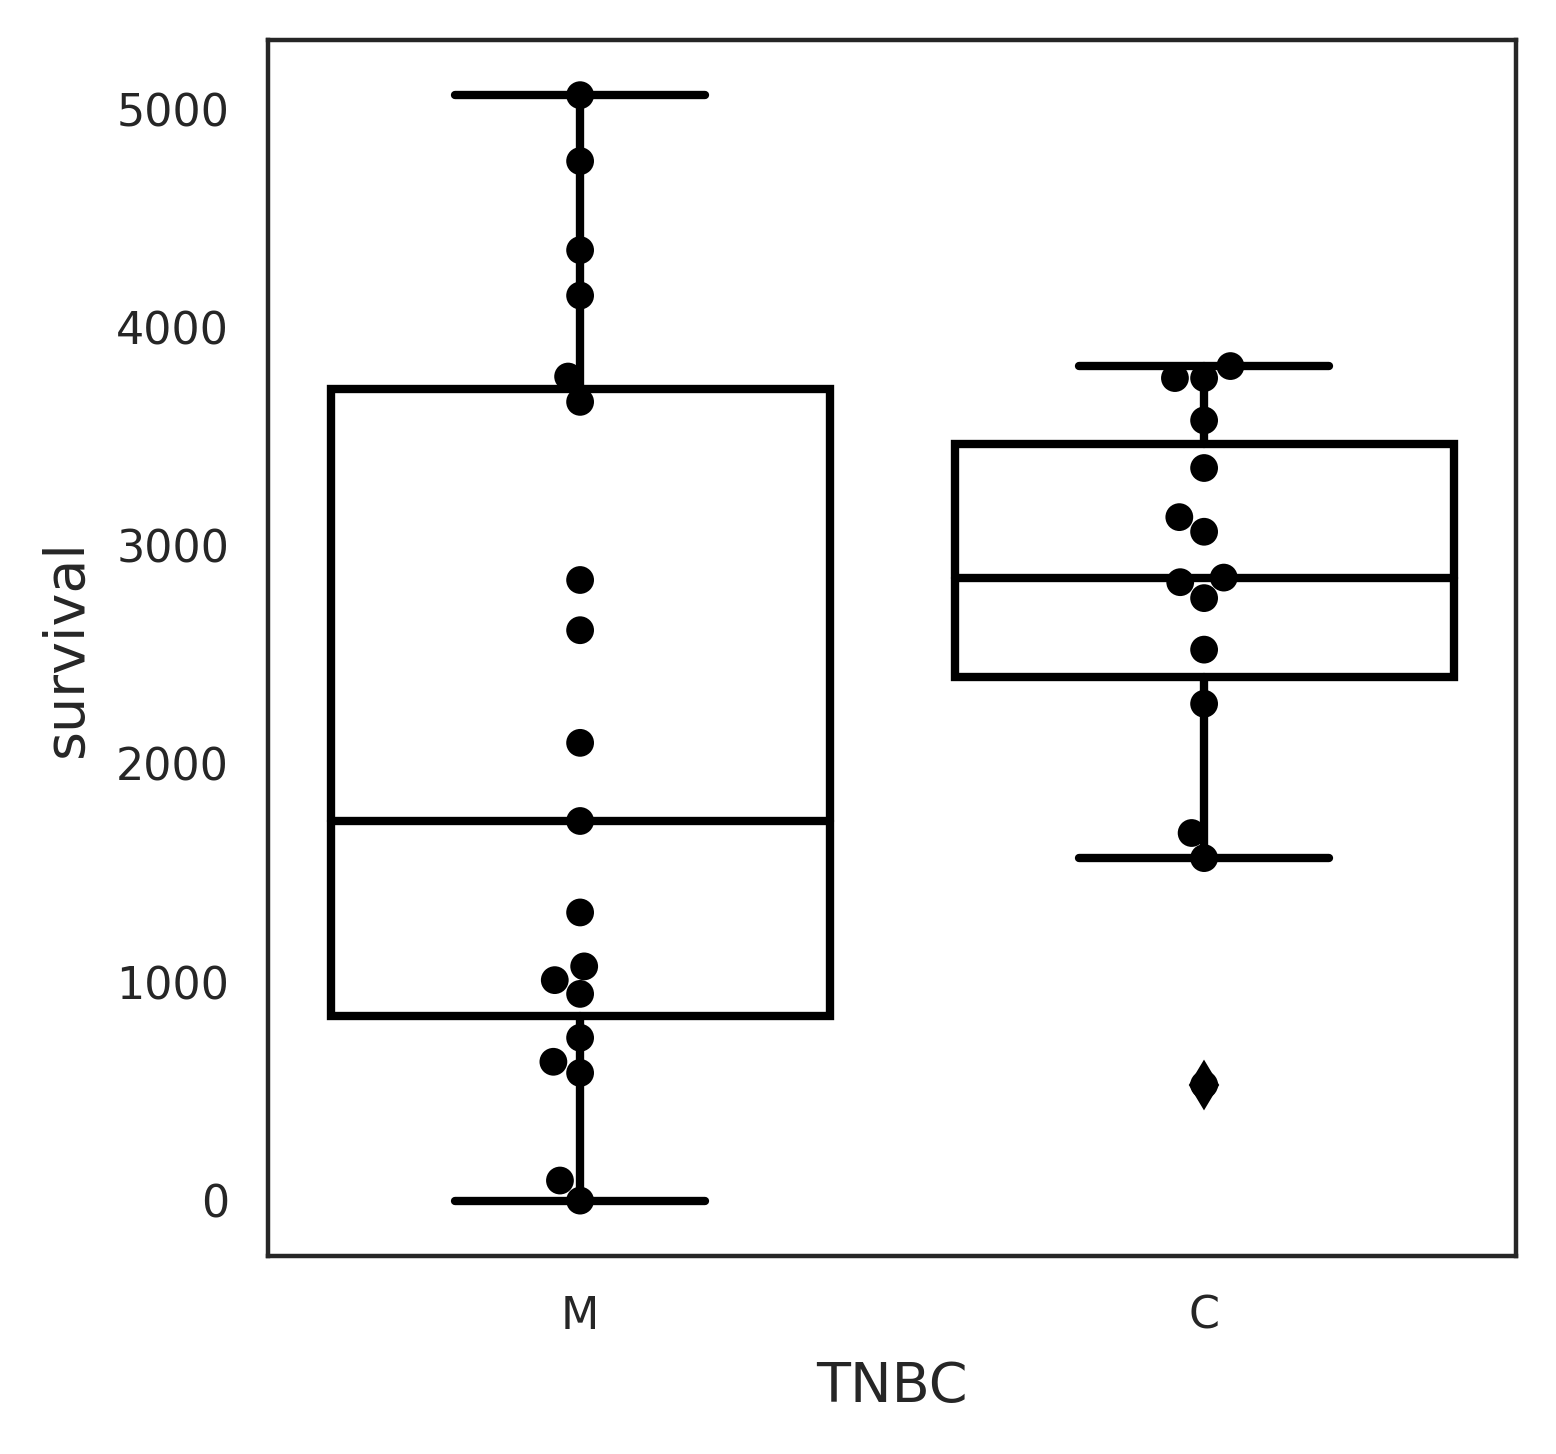

In [45]:
# sns.boxplot(data=pd_df,x='method',y='ari',)
order = ['M','C']
ax = sns.boxplot(x="TNBC", y="survival", data=pd_df,color='k',order=order)
ax = sns.swarmplot(x="TNBC", y="survival", data=pd_df,color='k',order=order)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
# plt.ylim(0.5, 1)

In [56]:
pd_df_valid = pd_df[pd_df.survival!=-1]

In [42]:
spearmanr(pd_df_valid['survival'],pd_df_valid['occurrence_score'])

SpearmanrResult(correlation=0.021225035588436136, pvalue=0.906669709296342)

In [43]:
pearsonr(pd_df['survival'],pd_df['occurrence_score'])

(-0.09654807642280817, 0.5870048563057467)

# survival analysis (M/C)

In [57]:
data_x

Age_in_years  Celltype  Karnofsky_score  Months_from_Diagnosis  \
0            69.0  squamous             60.0                    7.0   
1            64.0  squamous             70.0                    5.0   
2            38.0  squamous             60.0                    3.0   
3            63.0  squamous             60.0                    9.0   
4            65.0  squamous             70.0                   11.0   
..            ...       ...              ...                    ...   
132          65.0     large             75.0                    1.0   
133          64.0     large             60.0                    5.0   
134          67.0     large             70.0                   18.0   
135          65.0     large             80.0                    4.0   
136          37.0     large             30.0                    3.0   

    Prior_therapy Treatment  
0              no  standard  
1             yes  standard  
2              no  standard  
3             yes  standard  
4             yes  standard  
..            ...       ...  
132            no      test  
133            no      test  
134           yes      test  
135            no      test  
136            no      test  

[137 rows x 6 columns]

In [62]:
list(zip(pd_df_valid['censored'].astype('bool'),pd_df_valid['survival']))

[(False, 2612),
 (False, 745),
 (True, 3130),
 (True, 2523),
 (True, 1683),
 (True, 2275),
 (False, 584),
 (False, 946),
 (True, 3767),
 (True, 3822),
 (True, 3774),
 (True, 4353),
 (False, 1072),
 (True, 4145),
 (False, 530),
 (False, 2842),
 (True, 5063),
 (True, 4761),
 (False, 635),
 (False, 91),
 (False, 3658),
 (True, 3767),
 (False, 1319),
 (False, 1009),
 (True, 1568),
 (True, 1738),
 (True, 2832),
 (True, 2759),
 (True, 3063),
 (True, 2853),
 (True, 2096),
 (False, 3573),
 (True, 3355)]

In [67]:
data_y

[(False, 2612),
 (False, 745),
 (True, 3130),
 (True, 2523),
 (True, 1683),
 (True, 2275),
 (False, 584),
 (False, 946),
 (True, 3767),
 (True, 3822),
 (True, 3774),
 (True, 4353),
 (False, 1072),
 (True, 4145),
 (False, 530),
 (False, 2842),
 (True, 5063),
 (True, 4761),
 (False, 635),
 (False, 91),
 (False, 3658),
 (True, 3767),
 (False, 1319),
 (False, 1009),
 (True, 1568),
 (True, 1738),
 (True, 2832),
 (True, 2759),
 (True, 3063),
 (True, 2853),
 (True, 2096),
 (False, 3573),
 (True, 3355)]

In [80]:
from sksurv.datasets import load_veterans_lung_cancer

data_x = pd_df_valid
# data_y = list(zip(pd_df_valid['censored'].astype('bool'),pd_df_valid['survival']))
data_y = pd_df_valid[['censored','survival']]
# data_y['censored'] = data_y['censored'].astype('bool')
data_y['censored'] = (1-data_y['censored']).astype('bool')

/tmp/ipykernel_28642/1413051459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y['censored'] = (1-data_y['censored']).astype('bool')


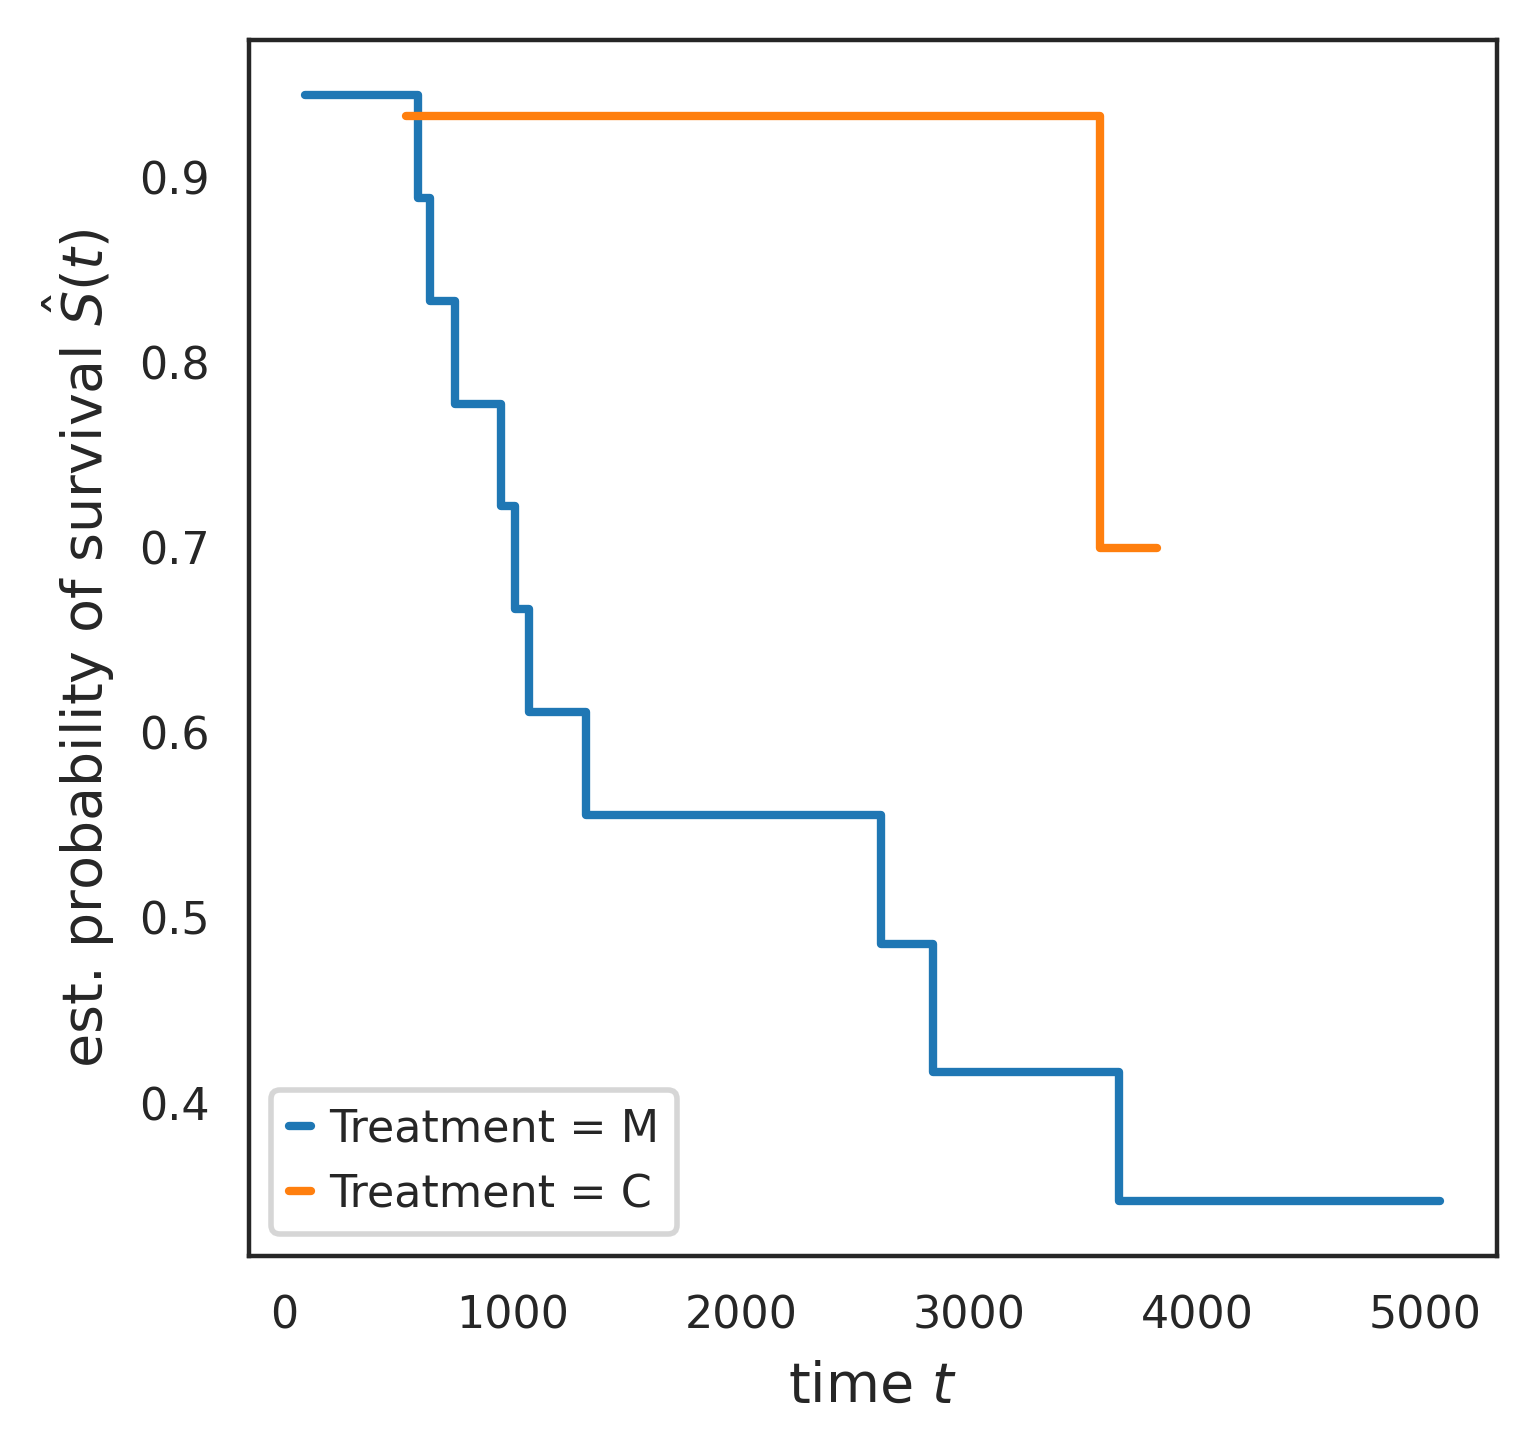

In [83]:
for treatment_type in ("M", "C"):
    mask_treat = data_x["TNBC"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["censored"][mask_treat],
        data_y["survival"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

# survival analysis ME

In [244]:
pd_df_valid = pd_df[pd_df.survival!=-1]

In [245]:
from sksurv.datasets import load_veterans_lung_cancer

data_x = pd_df_valid
# data_y = list(zip(pd_df_valid['censored'].astype('bool'),pd_df_valid['survival']))
data_y = pd_df_valid[['censored','survival']]
# data_y['censored'] = data_y['censored'].astype('bool')
data_y['censored'] = (1-data_y['censored']).astype('bool')

/tmp/ipykernel_28642/1413051459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y['censored'] = (1-data_y['censored']).astype('bool')


In [246]:
MKT_cutoff = 0.6189493652095163
data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]

/tmp/ipykernel_28642/1505108827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


In [247]:
survival_prob_treatment

array([0.96      , 0.92      , 0.88      , 0.84      , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.73846154, 0.73846154, 0.73846154,
       0.73846154, 0.73846154, 0.64615385, 0.55384615, 0.55384615,
       0.55384615, 0.55384615, 0.55384615, 0.55384615])

In [248]:
data_x['MKT'].value_counts()


Low MKT     25
High MKT     8
Name: MKT, dtype: int64

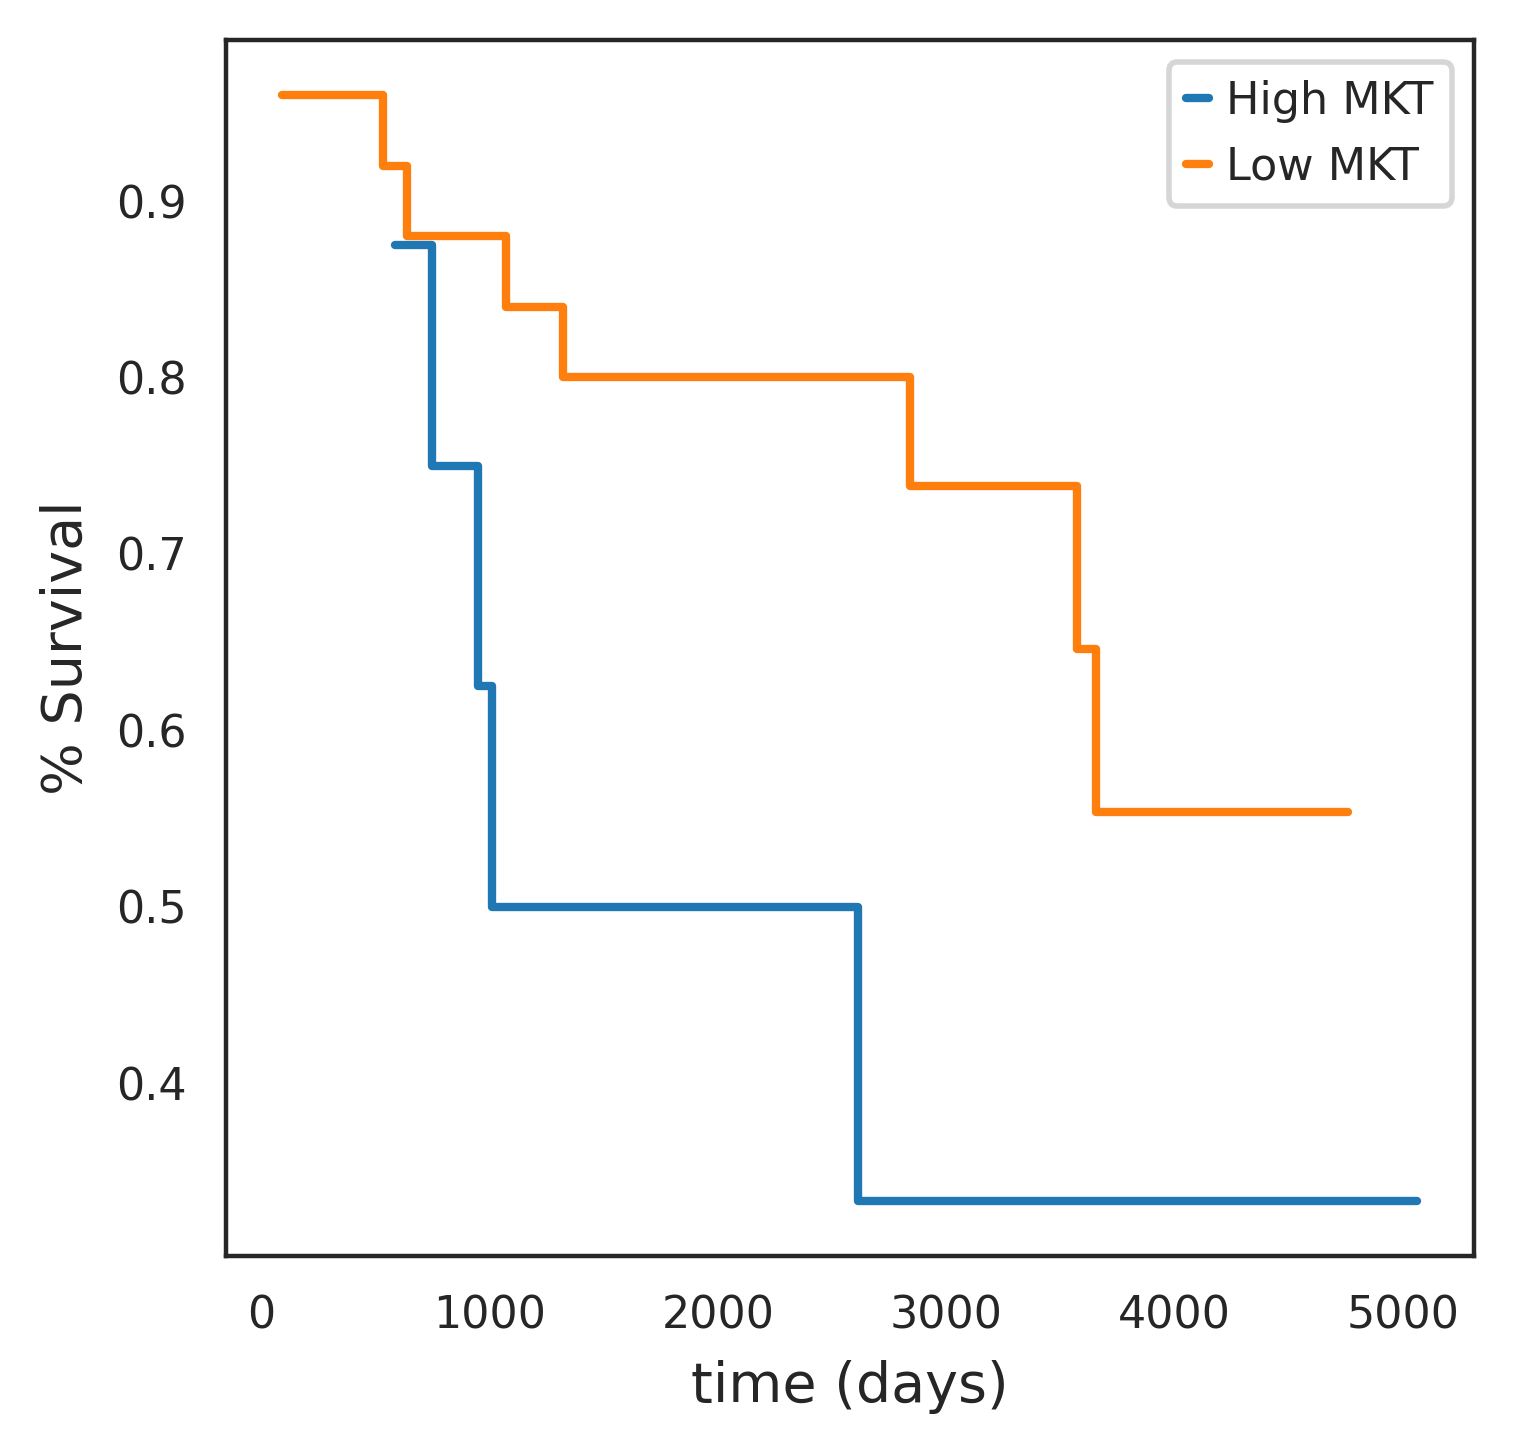

In [249]:
for treatment_type in ("High MKT", "Low MKT"):
    mask_treat = data_x["MKT"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["censored"][mask_treat],
        data_y["survival"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="%s" % treatment_type)

plt.ylabel("% Survival")
plt.xlabel("time (days)")
plt.legend(loc="best")

In [214]:
data_y_format = [tuple(t) for t in data_y.values]
data_y_format = np.array(data_y_format,dtype=[('censored',bool),('survival',int)])

In [236]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
data_x_MKT = data_x[['occurrence_score','TNBC']]
data_x_MKT['TNBC'] = data_x_MKT['TNBC'].astype('category')
data_x_MKT_num = OneHotEncoder().fit_transform(data_x_MKT)
estimator = CoxPHSurvivalAnalysis()
data_x_MKT_num_use = data_x_MKT_num[['TNBC=M']]
# data_x_MKT_num_use = data_x_MKT_num[['occurrence_score']]

estimator.fit(data_x_MKT_num_use, data_y_format)

/tmp/ipykernel_28642/2628091240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x_MKT['TNBC'] = data_x_MKT['TNBC'].astype('category')


CoxPHSurvivalAnalysis()

In [237]:
pd.Series(estimator.coef_, index=data_x_MKT_num_use.columns)

TNBC=M    1.651146
dtype: float64

In [235]:
pd.Series(estimator.coef_, index=data_x_MKT_num_use.columns)

occurrence_score    1.345374
dtype: float64

In [240]:
np.log(4.97)

1.6034198401085373

# all cutoffs

In [266]:
data_x.columns

Index(['Unnamed: 0', 'patient', 'TNBC', 'ME_int', 'ME_int_bg_mean',
       'ME_int_bg_var', 'ME_int_bg_std', 'occurrence_score', 'survival',
       'censored', 'MKT'],
      dtype='object')

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


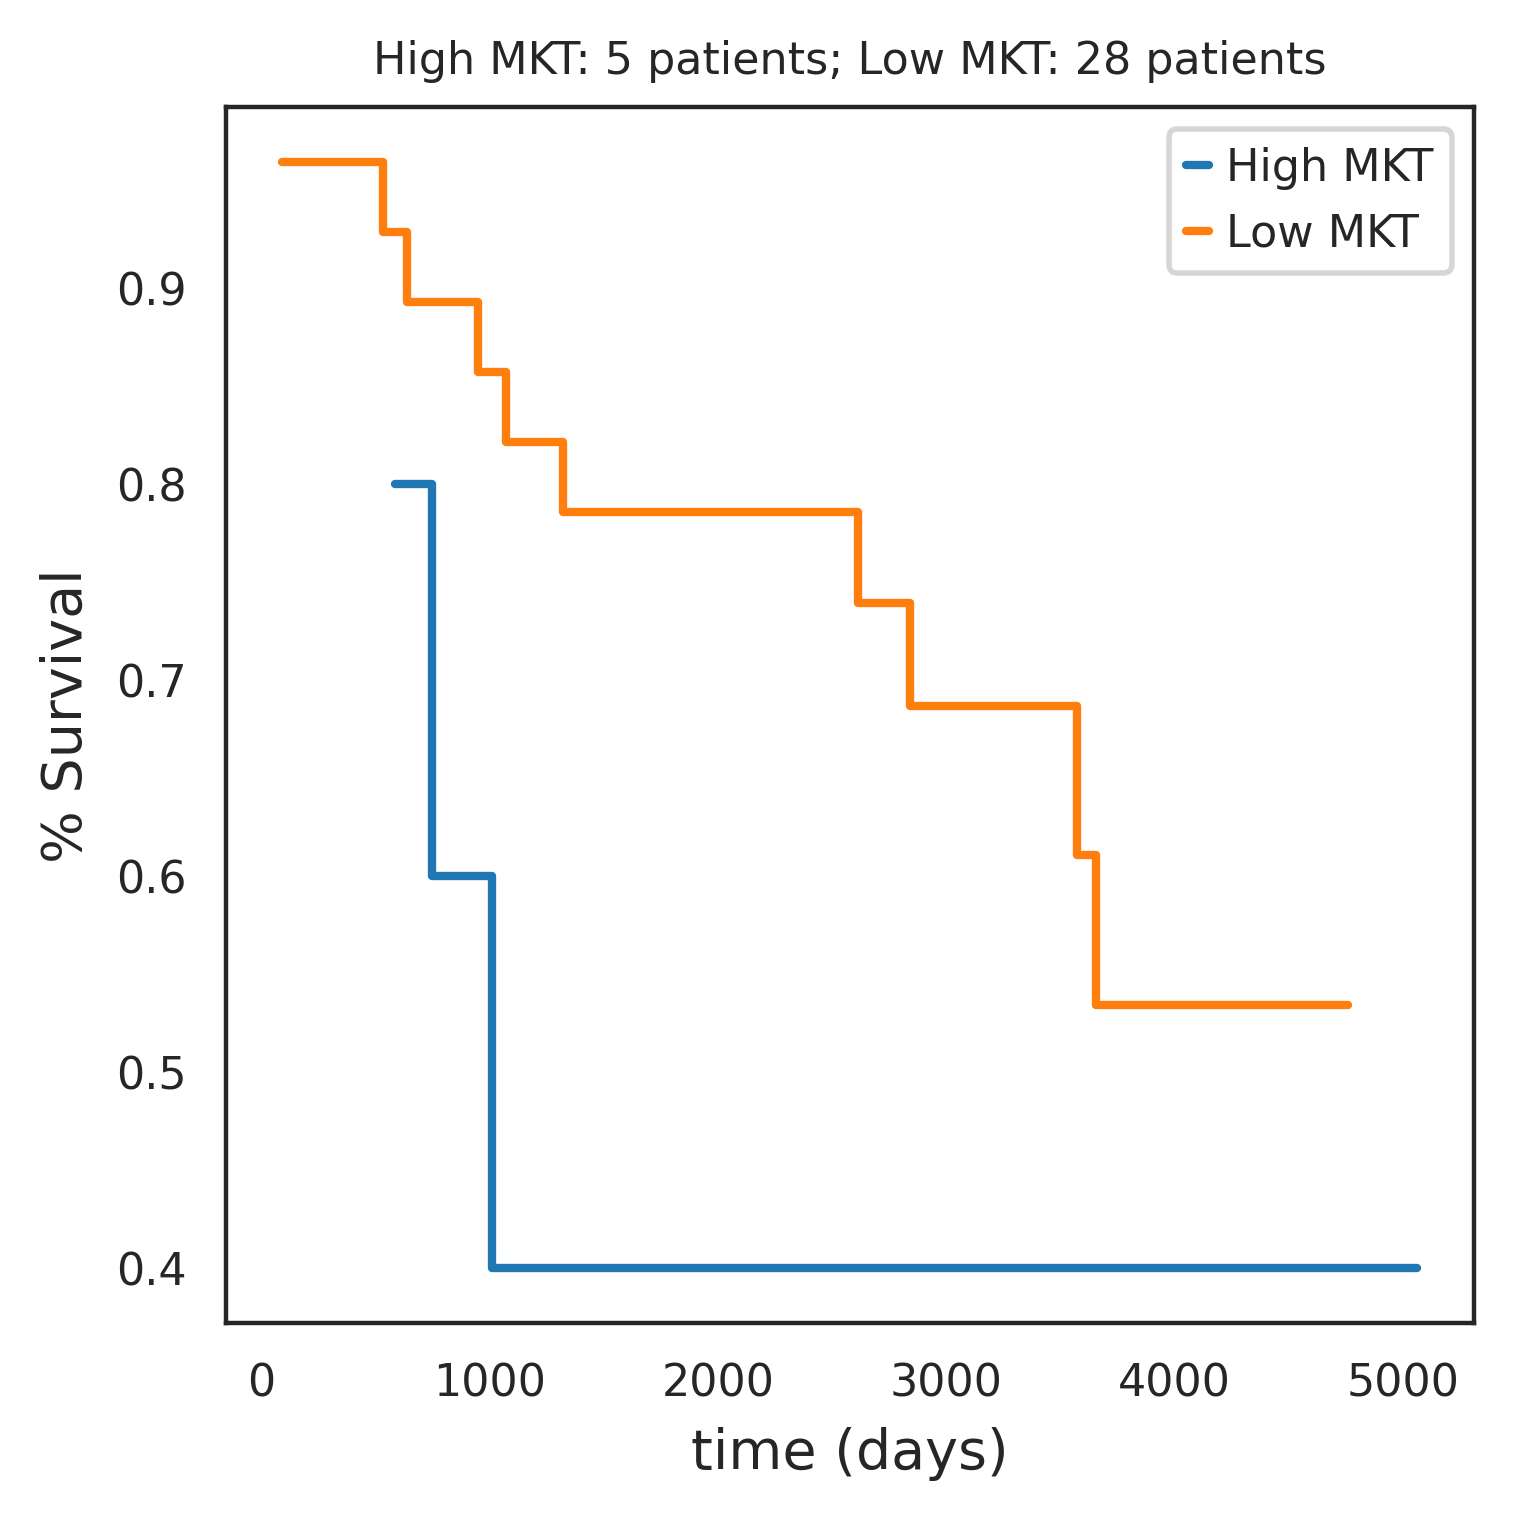

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


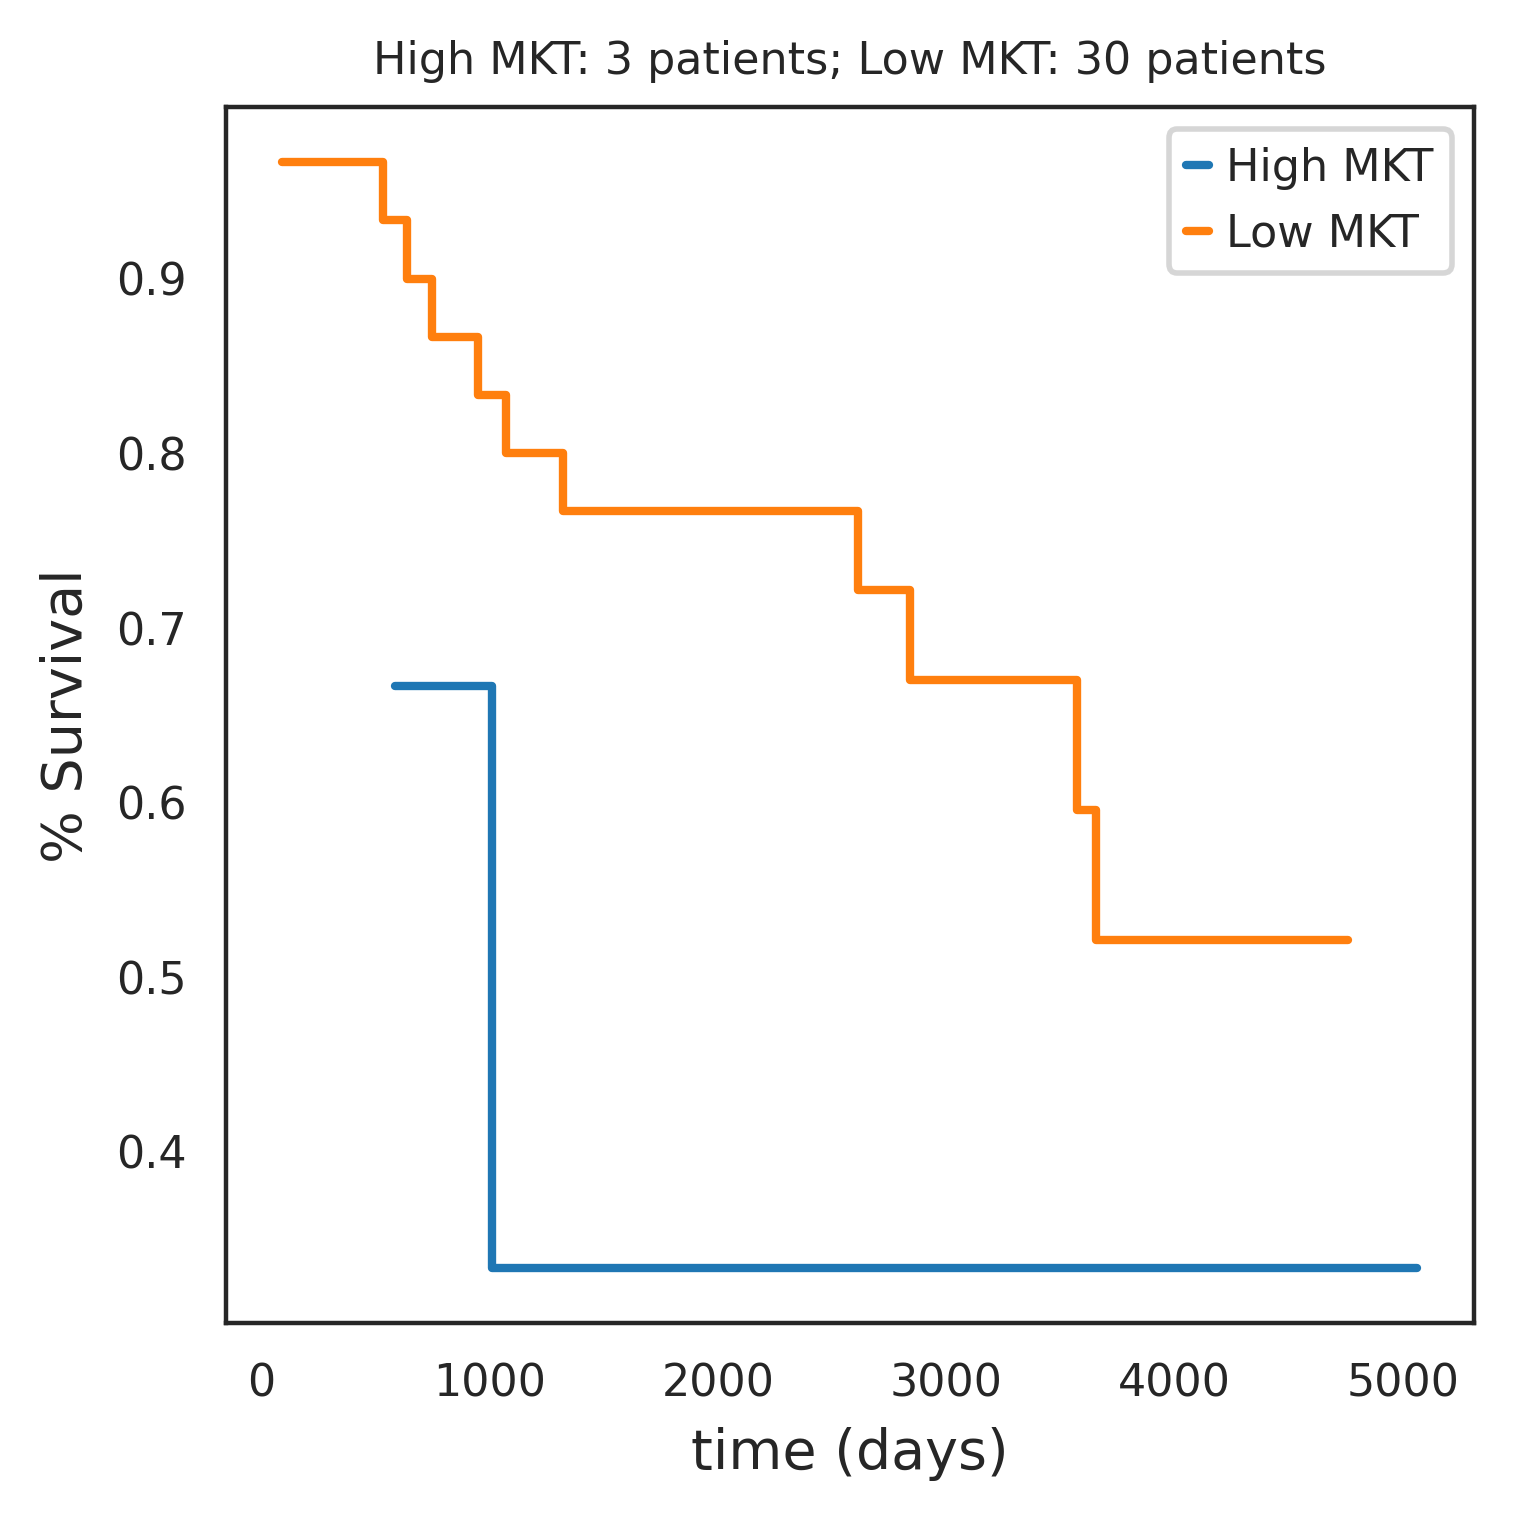

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


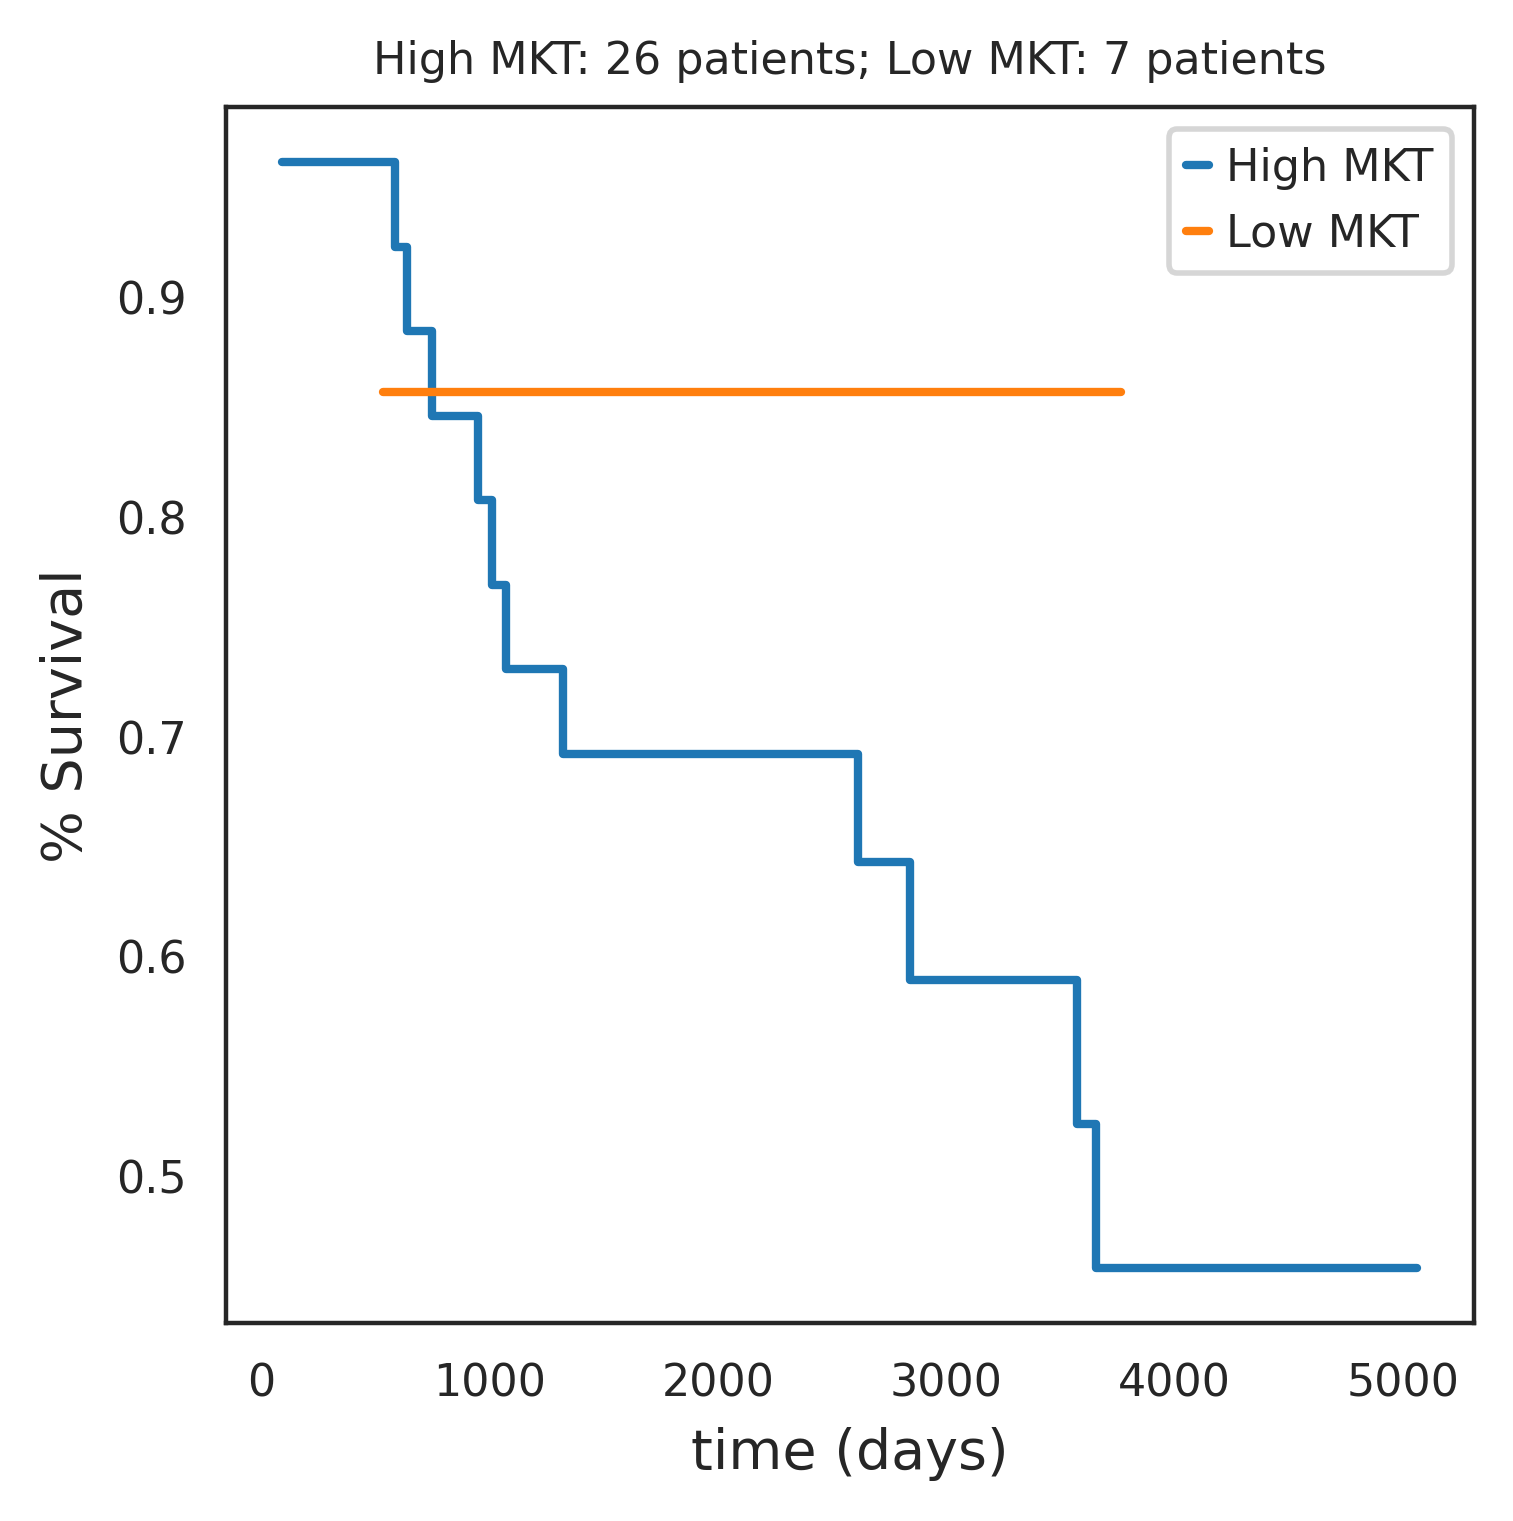

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


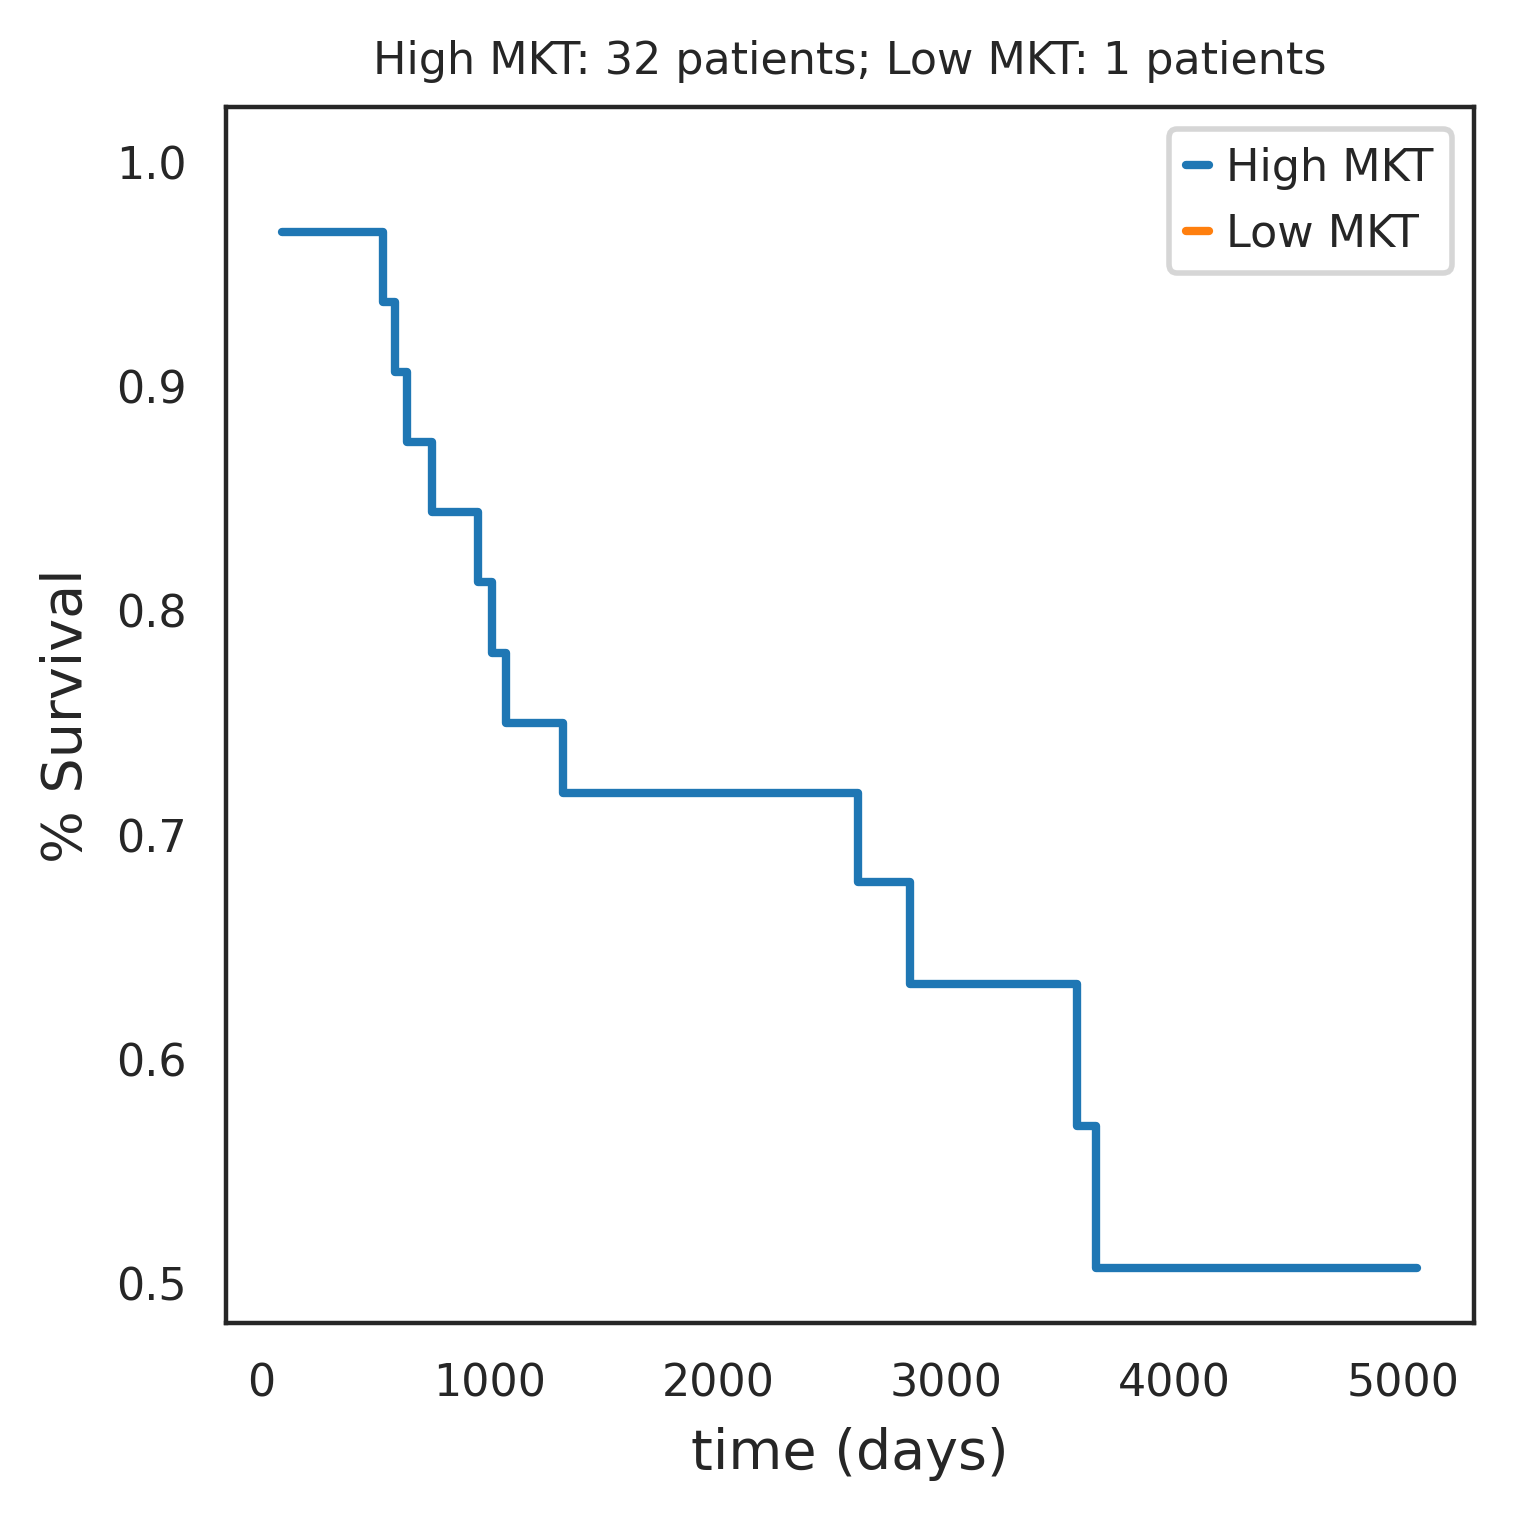

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


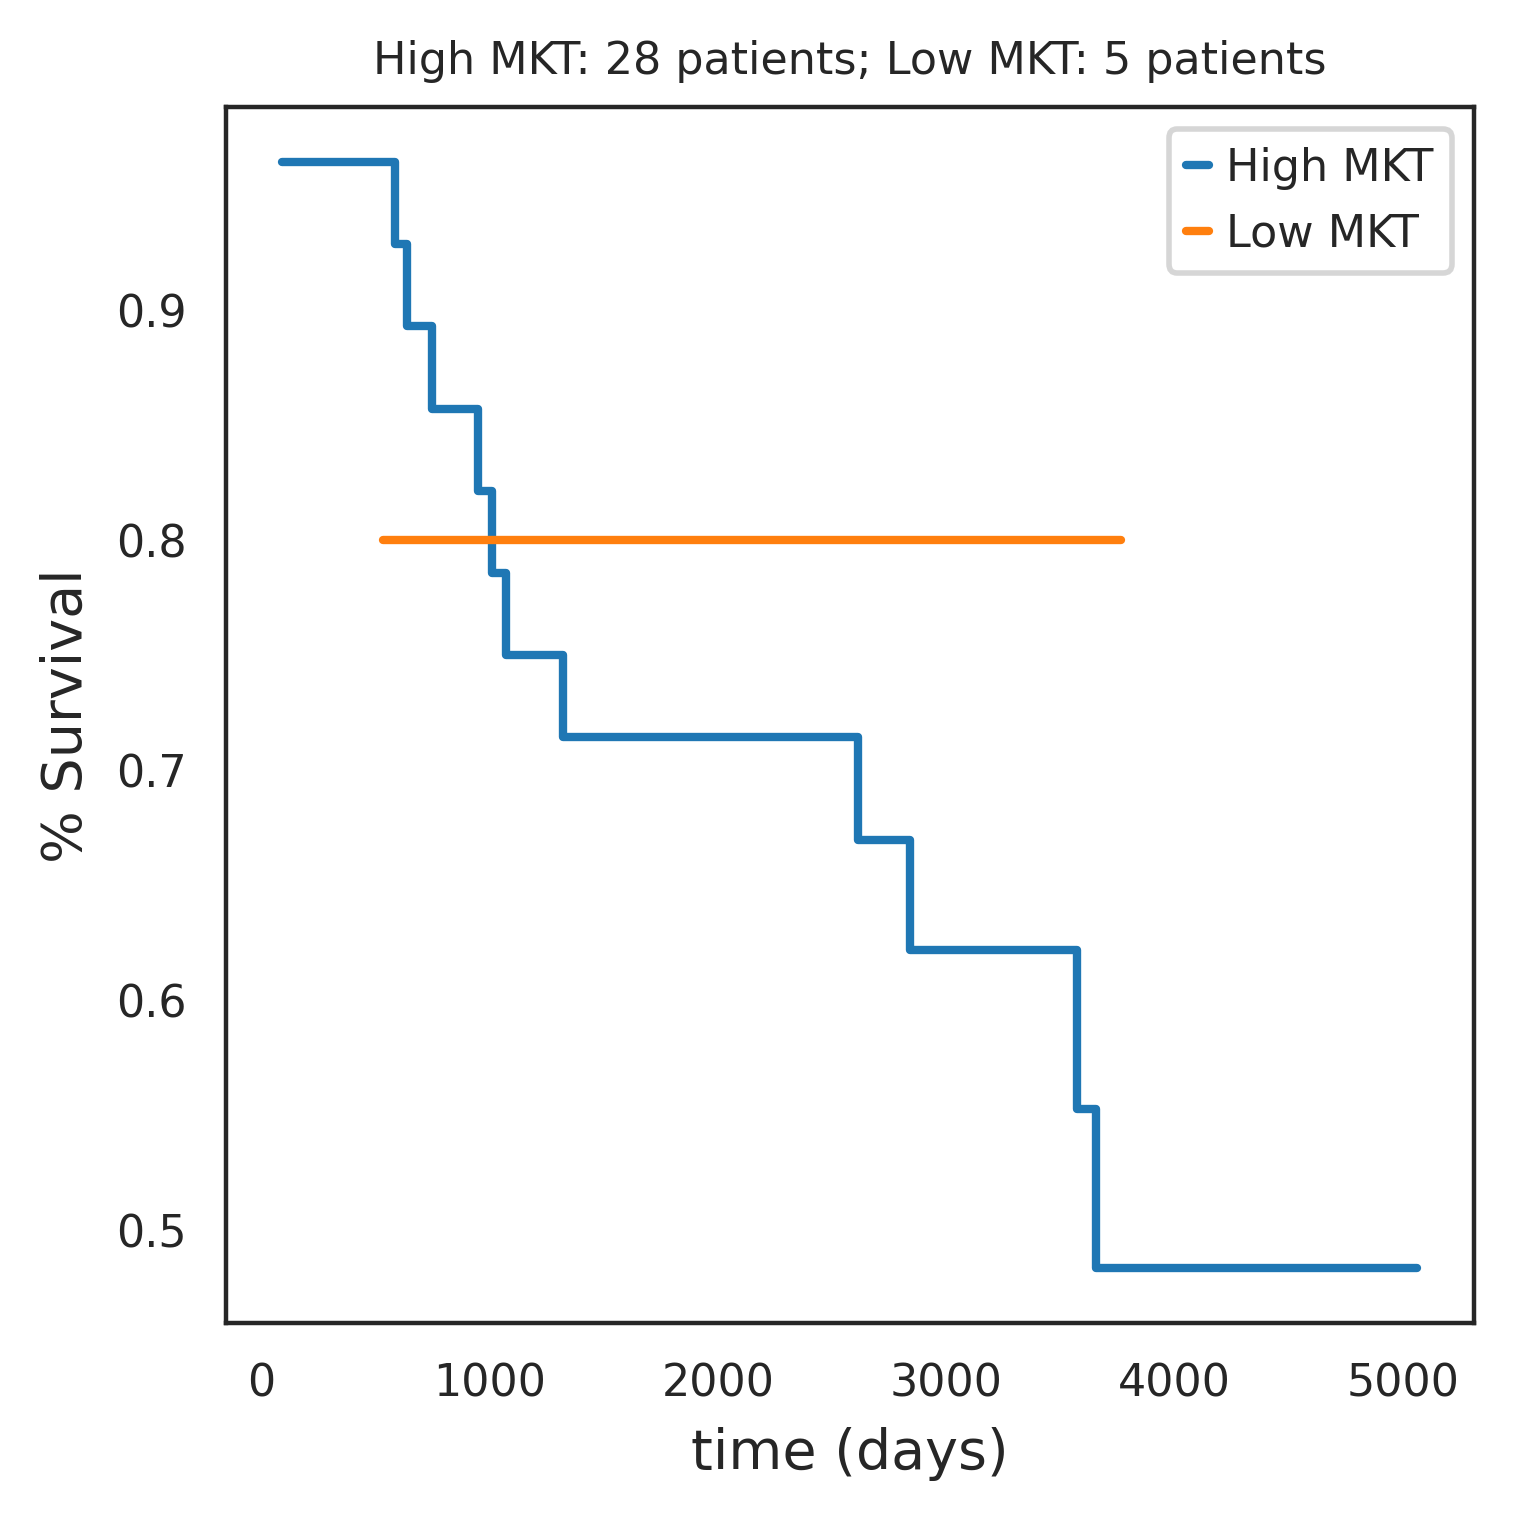

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


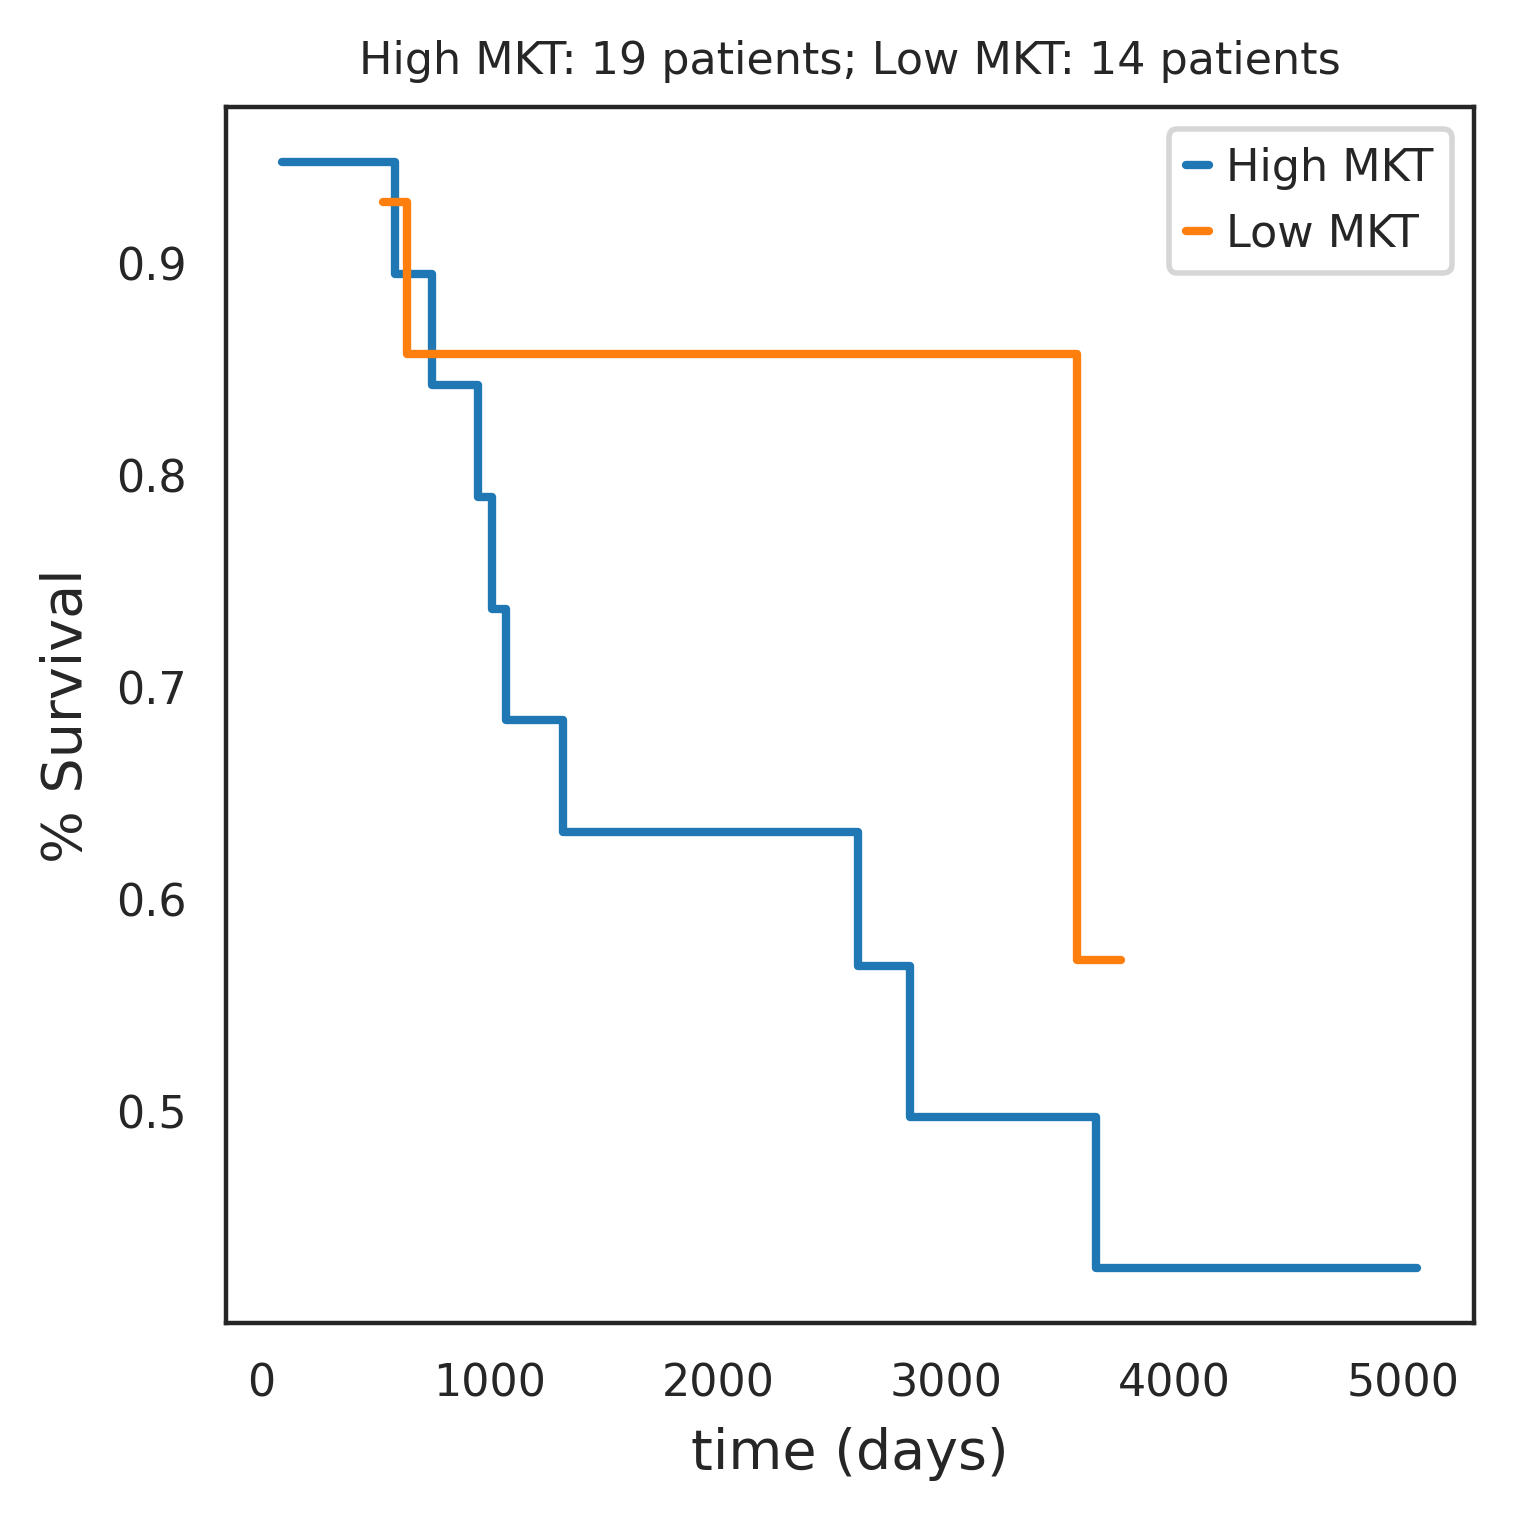

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


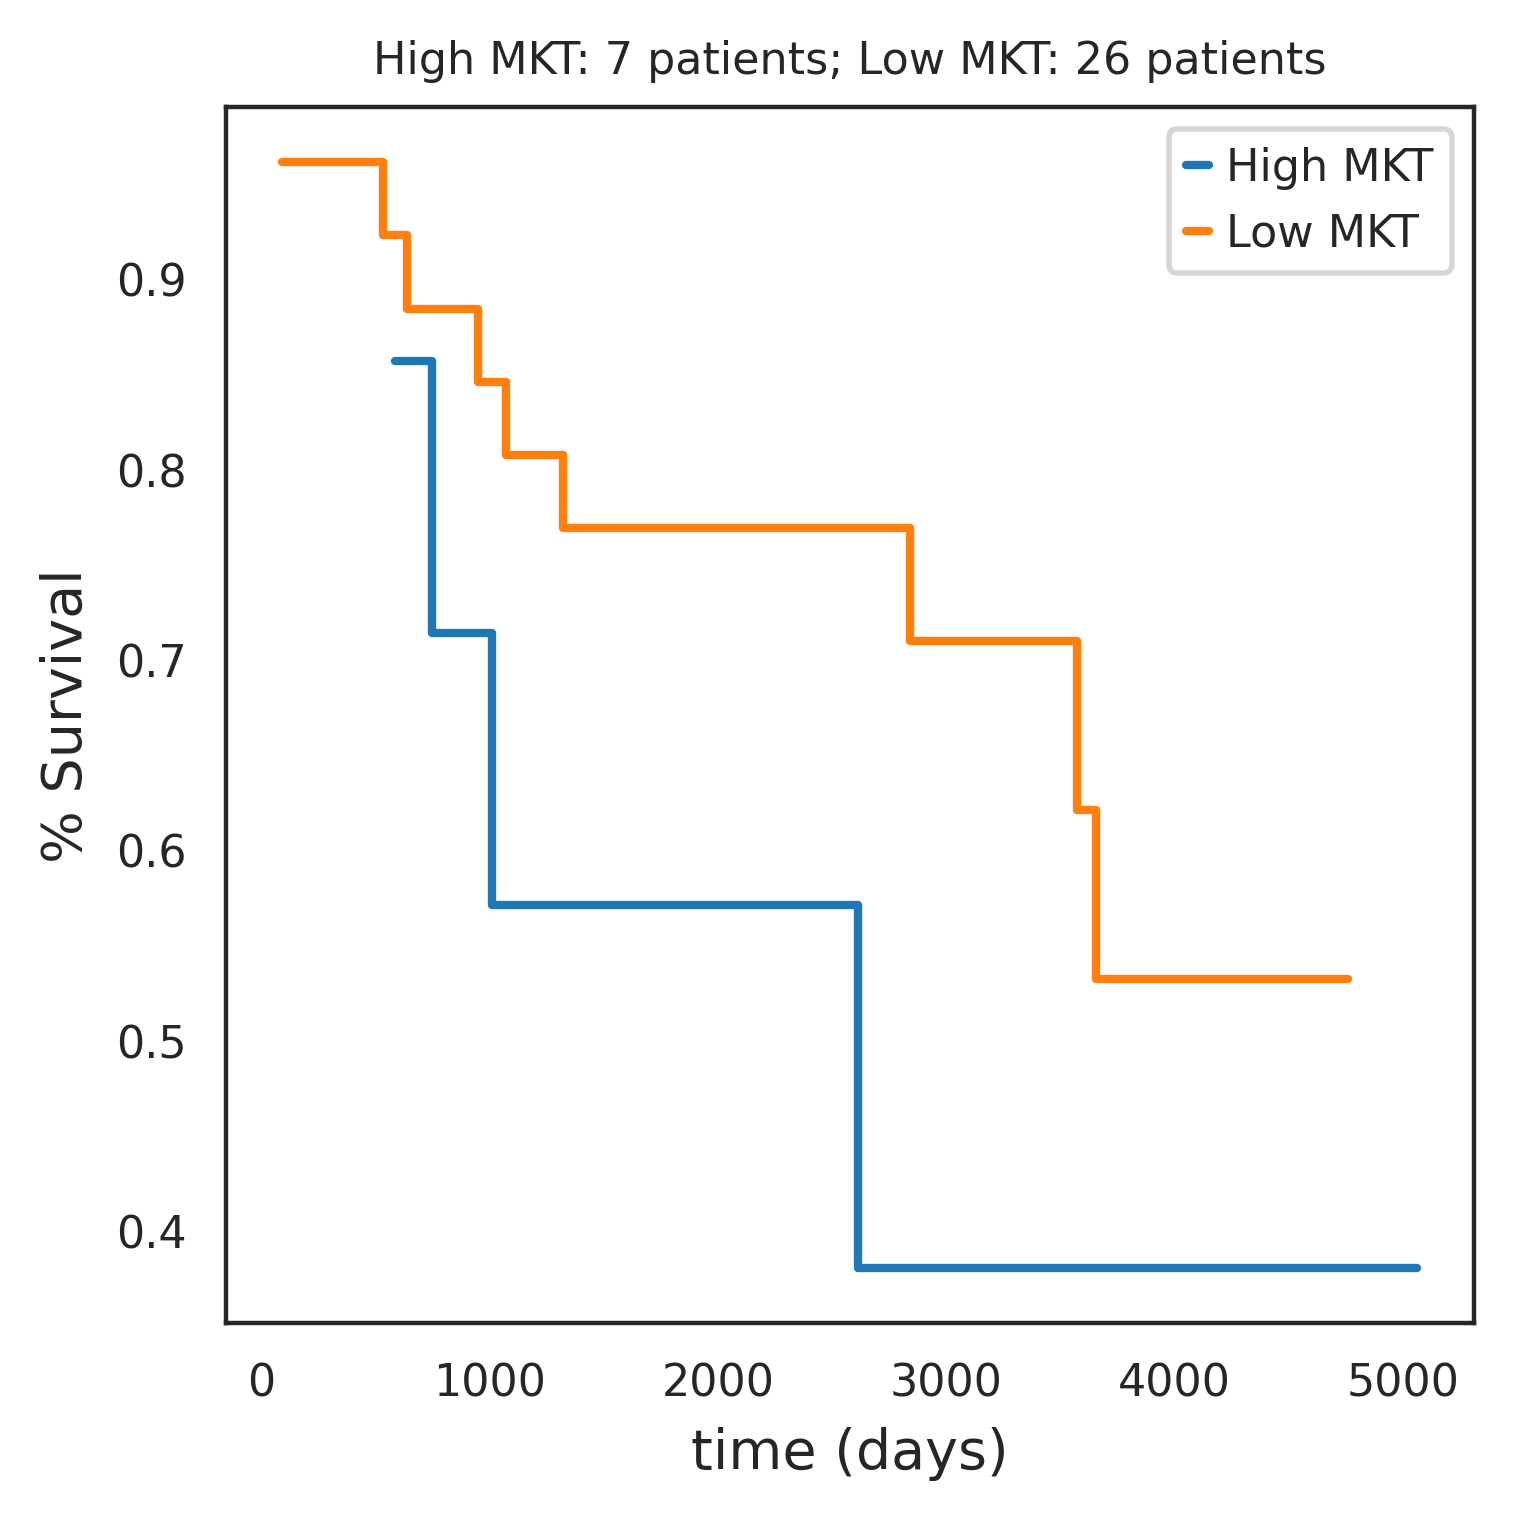

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


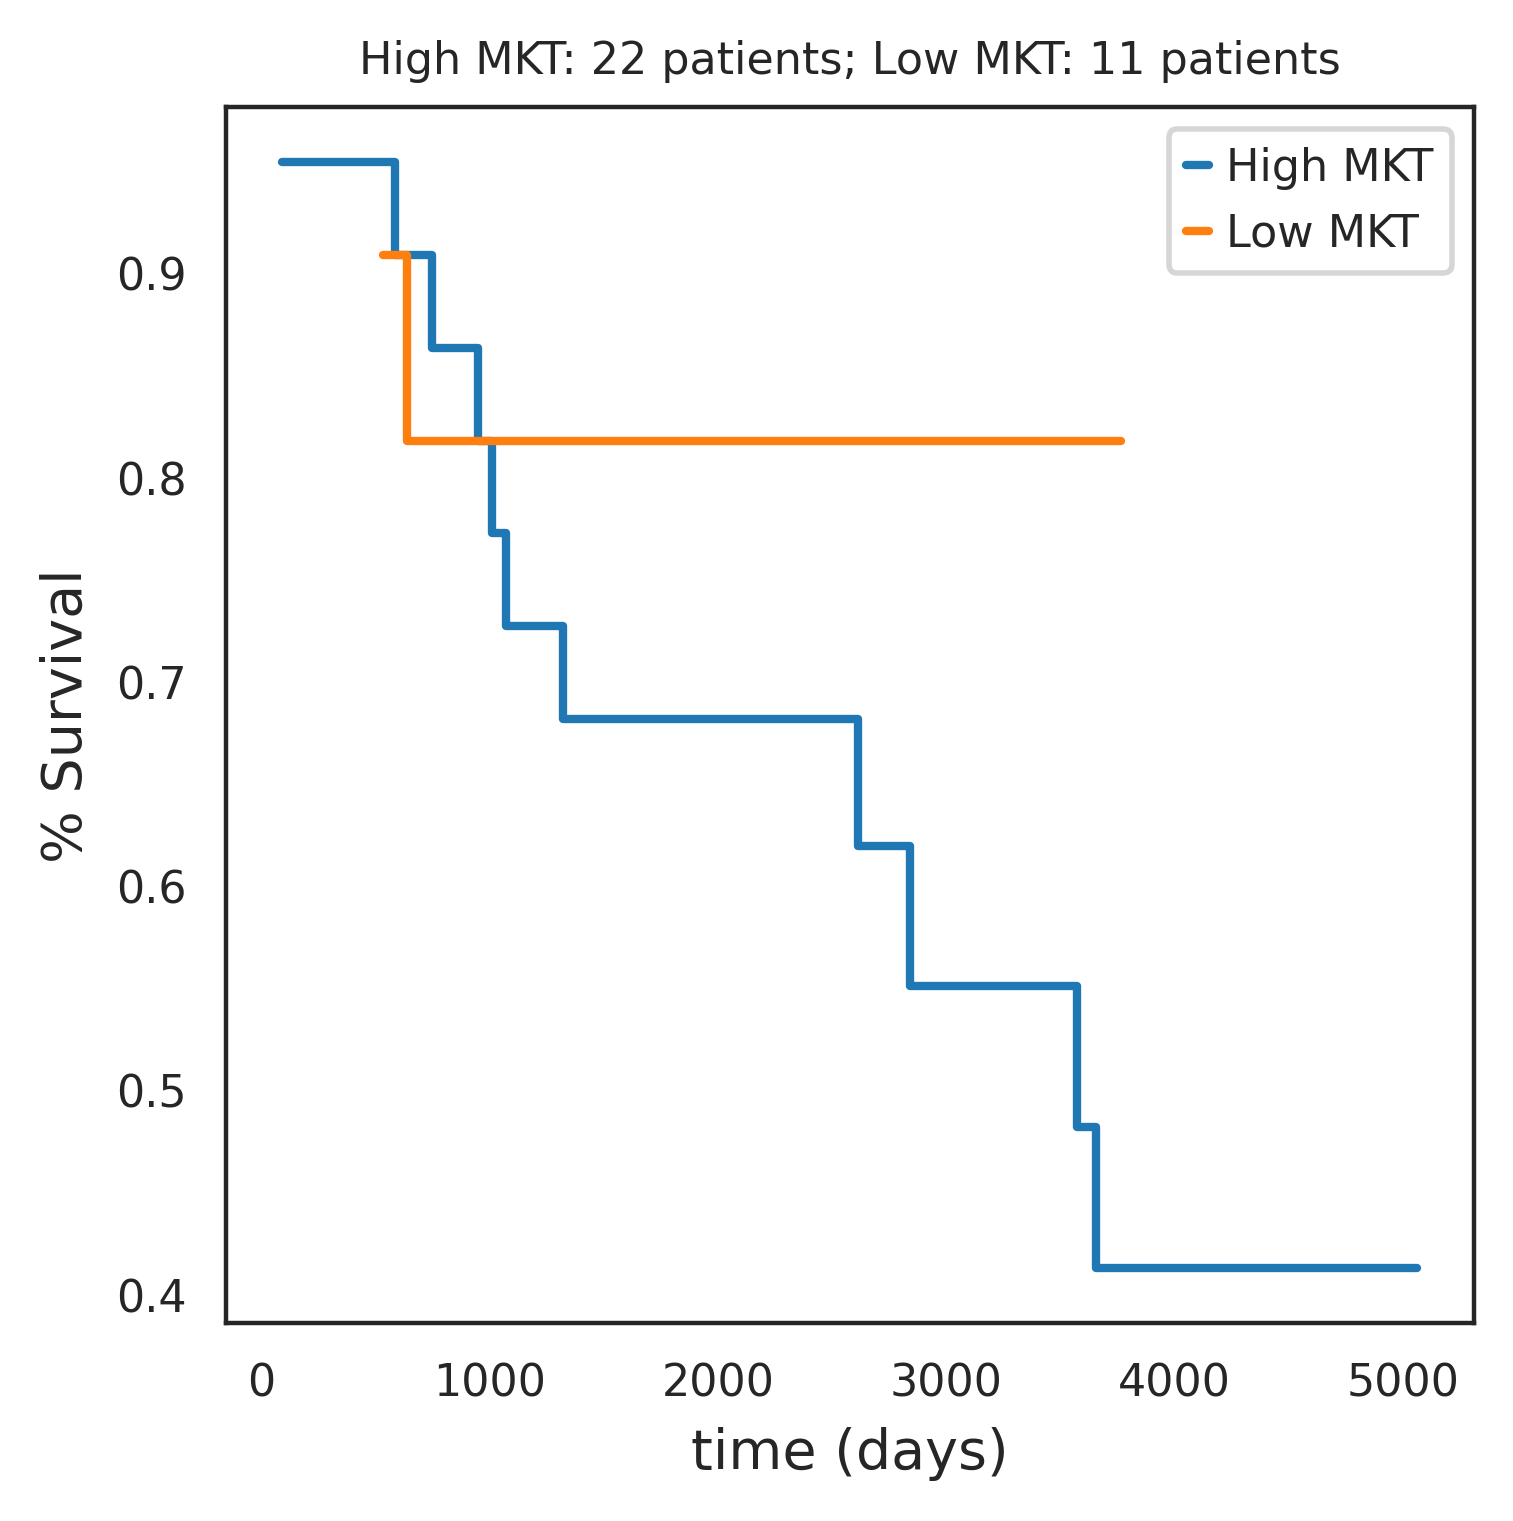

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


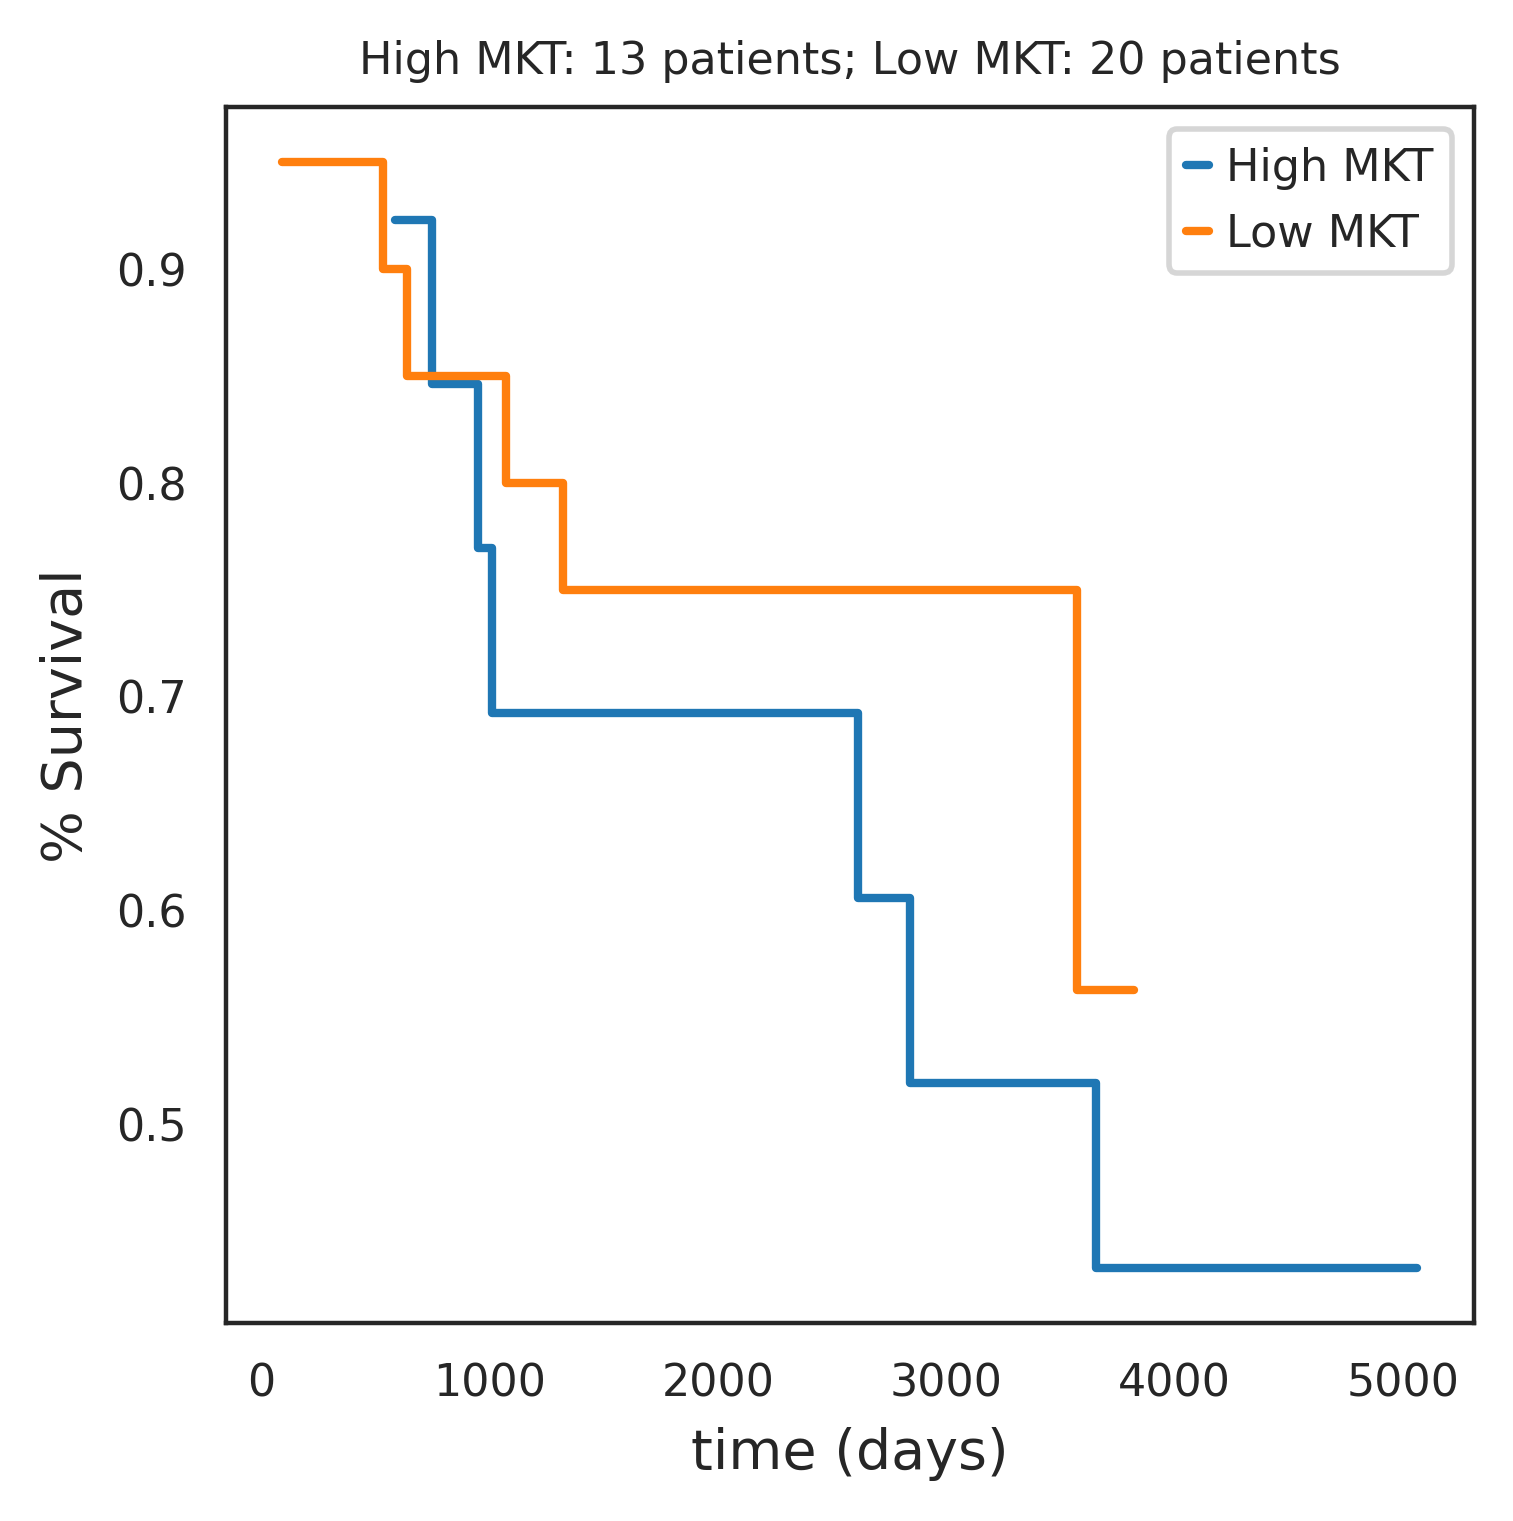

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


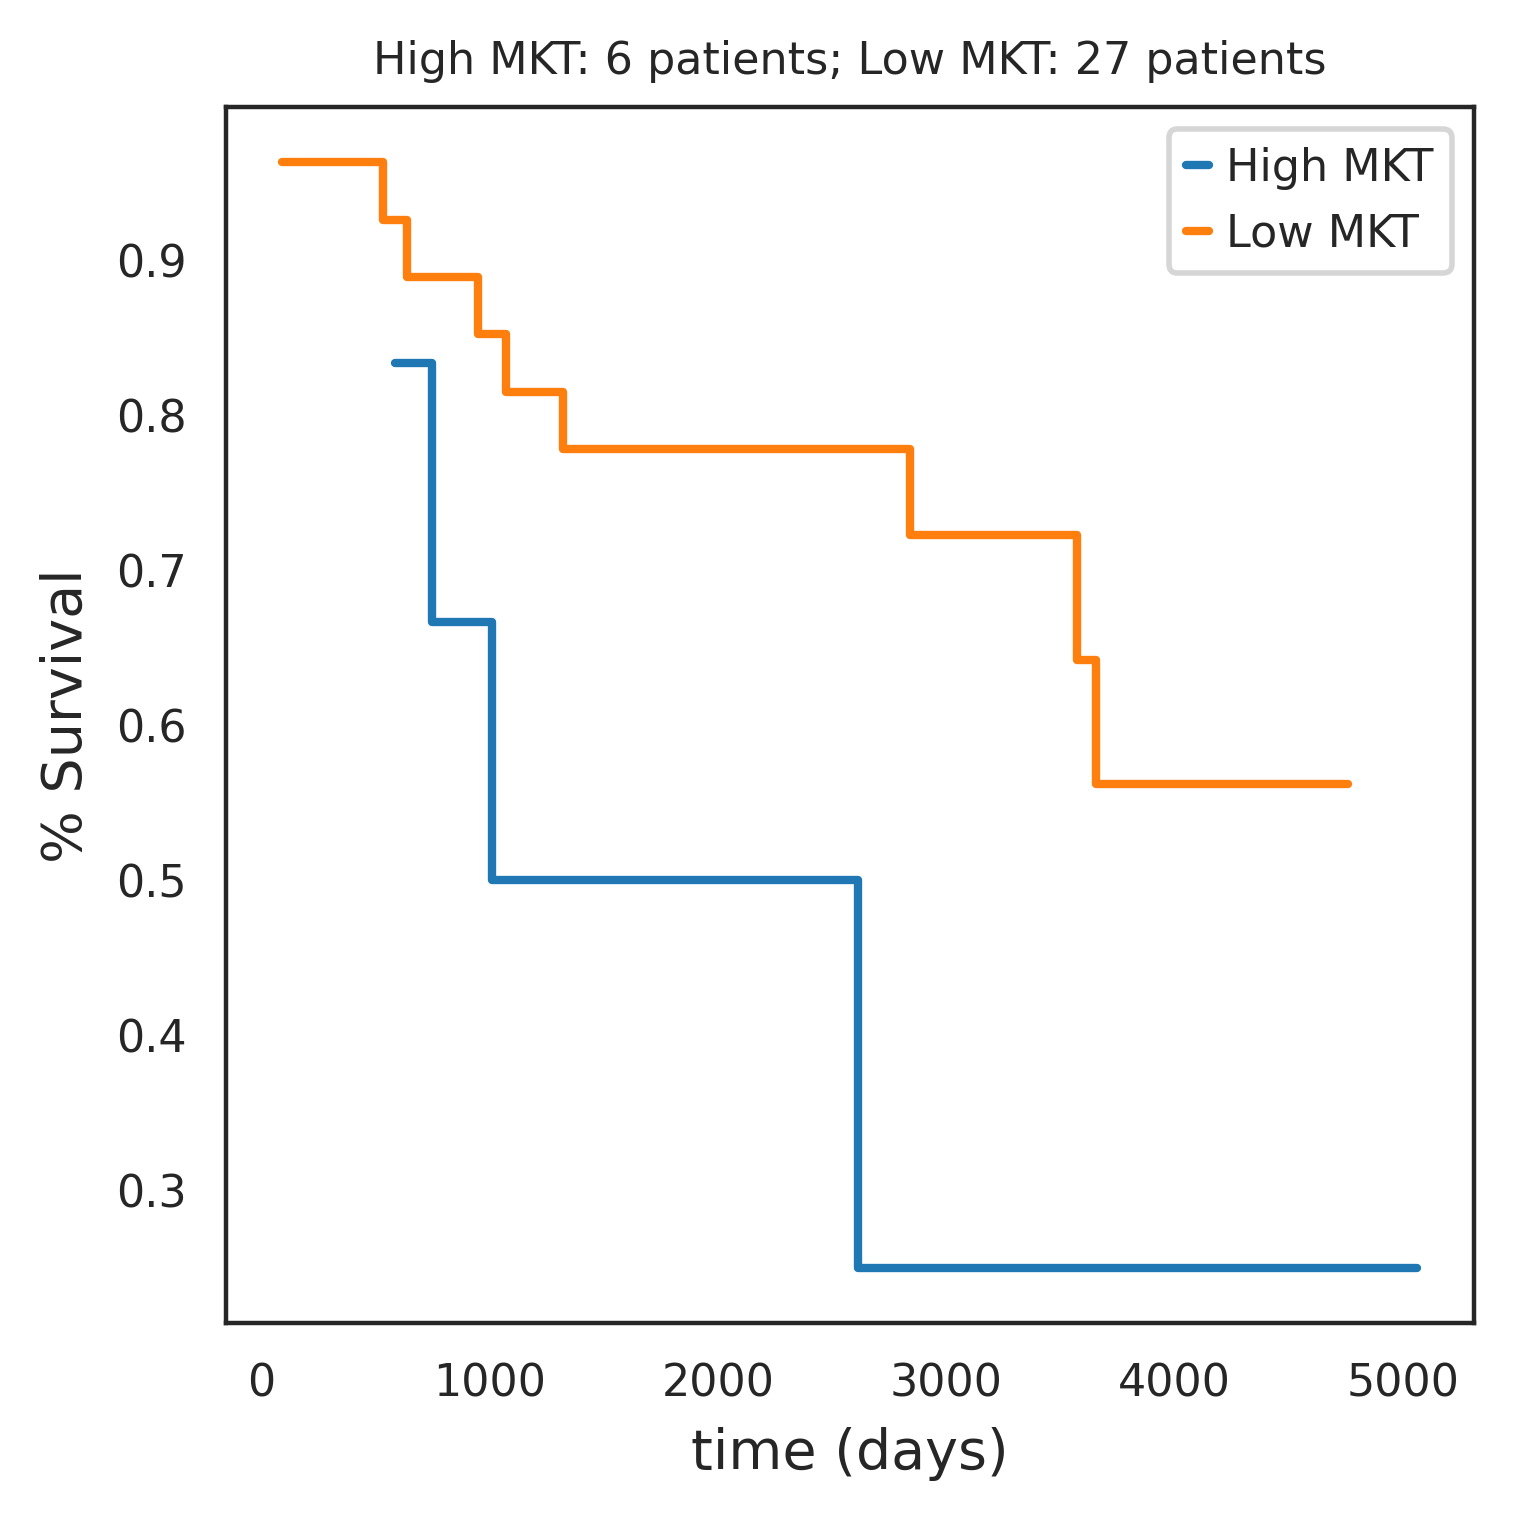

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


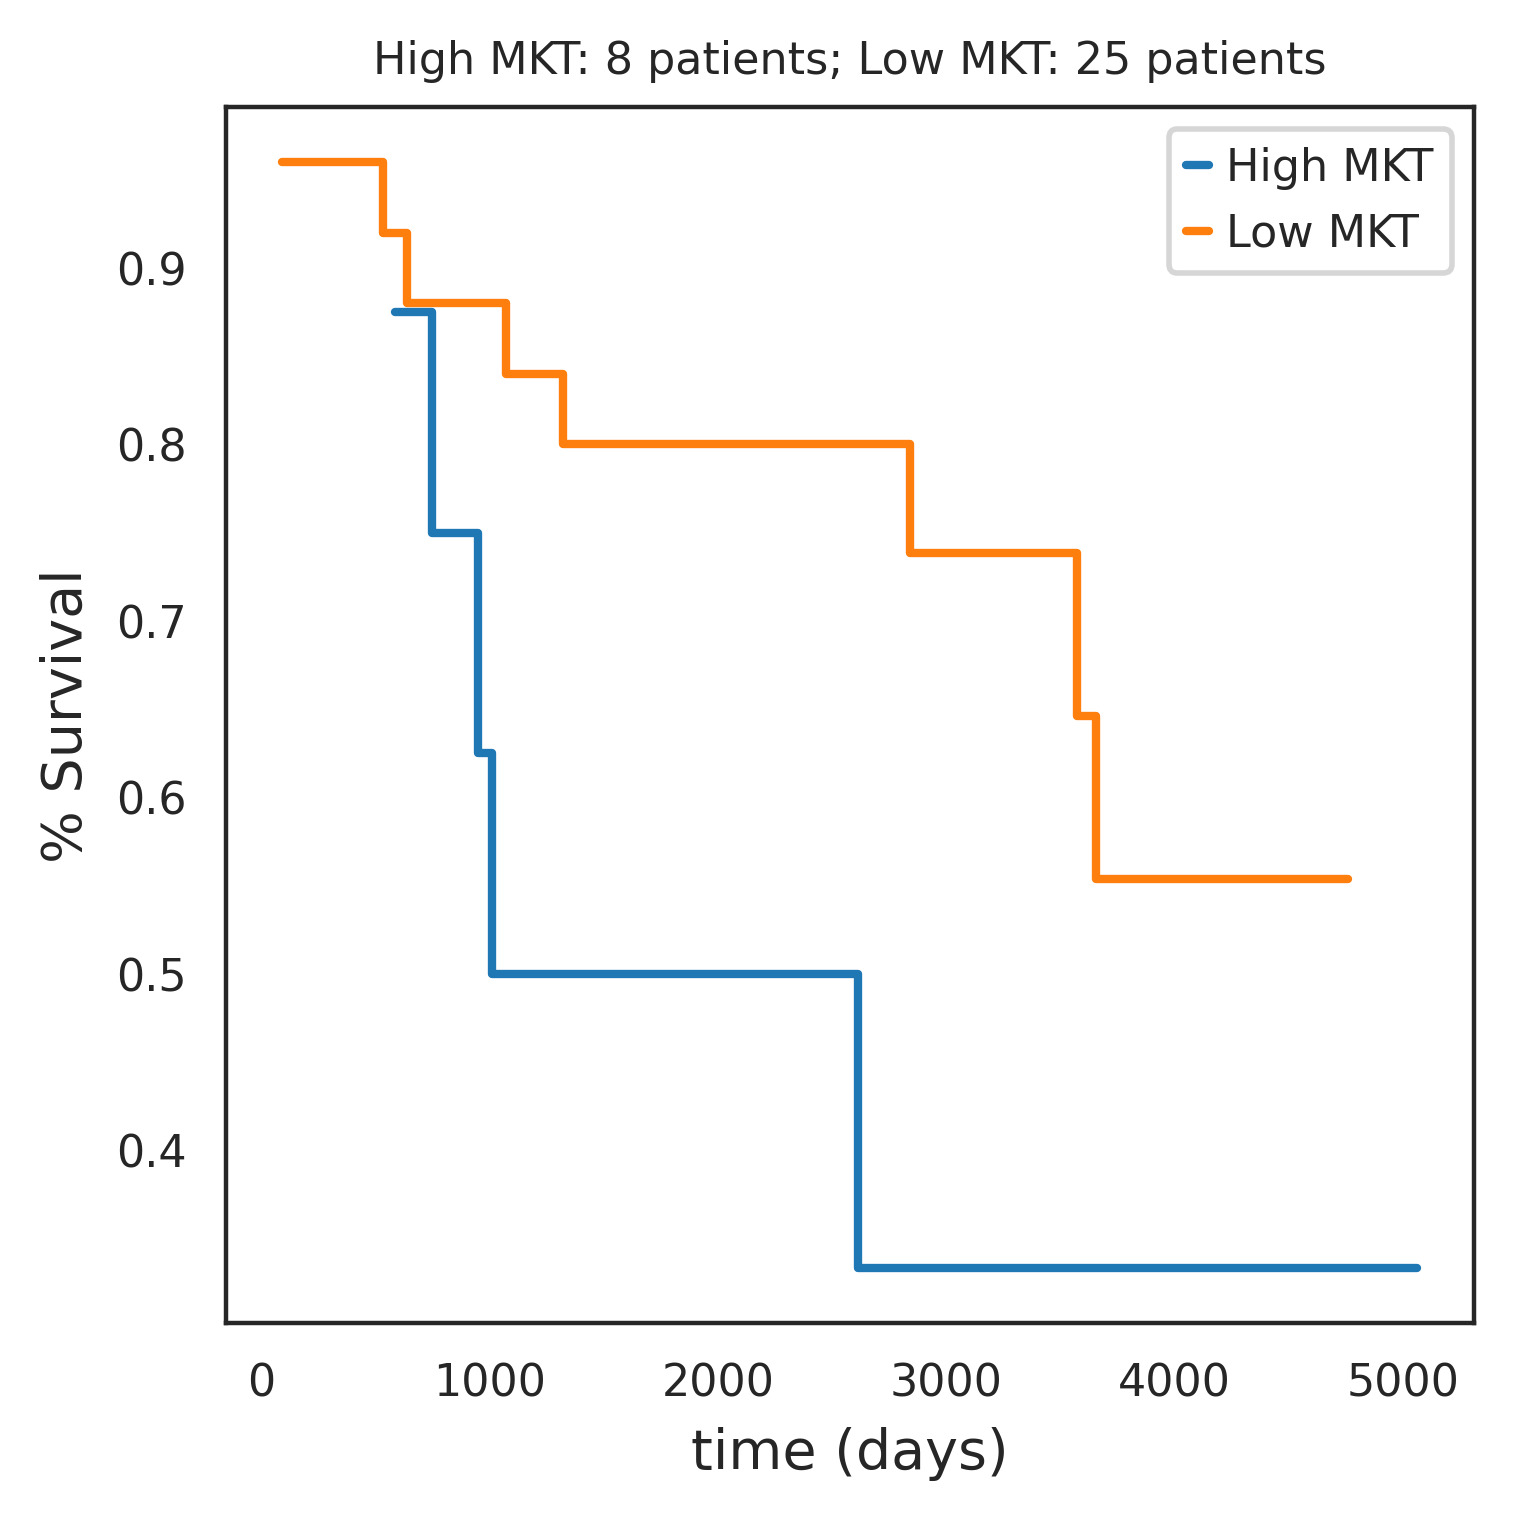

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


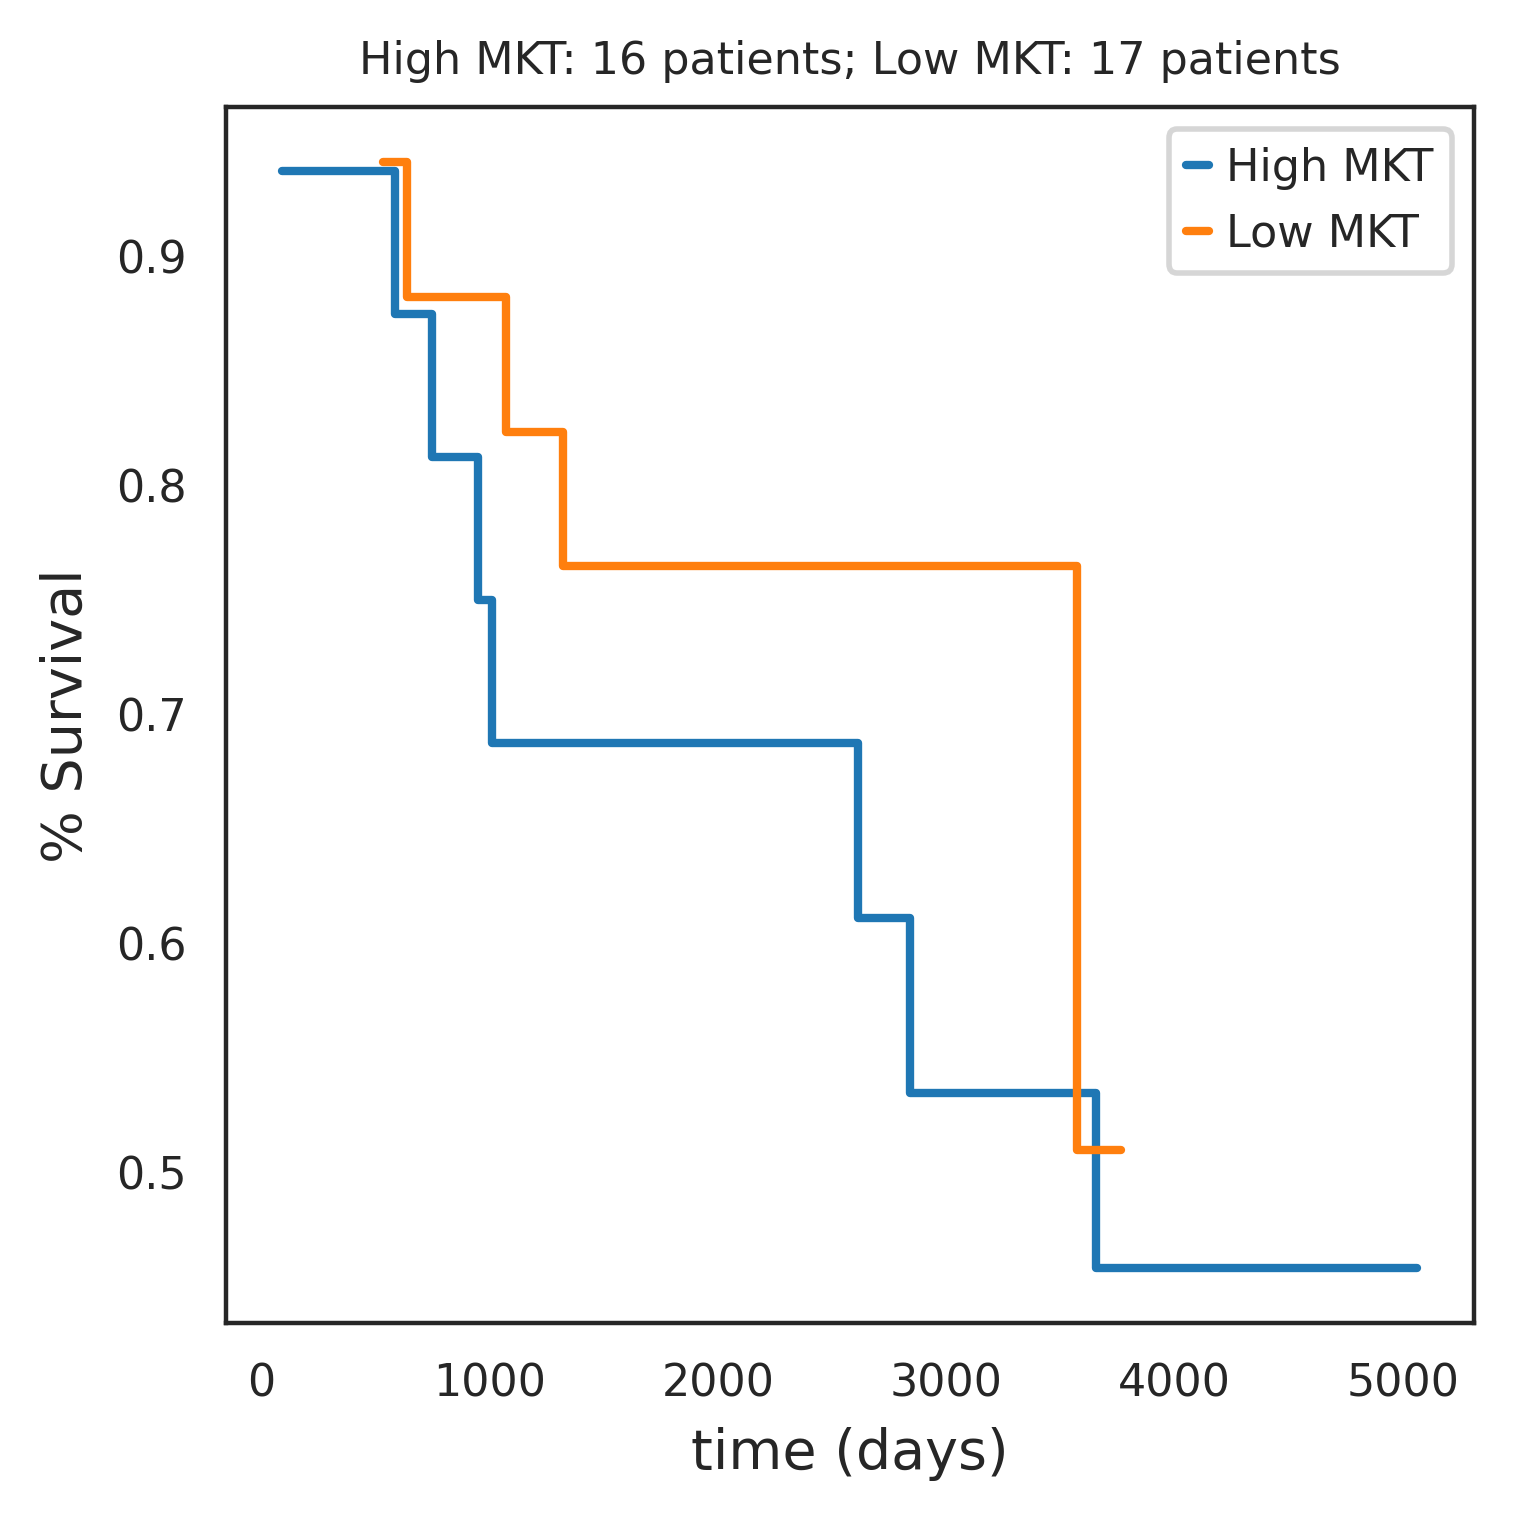

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


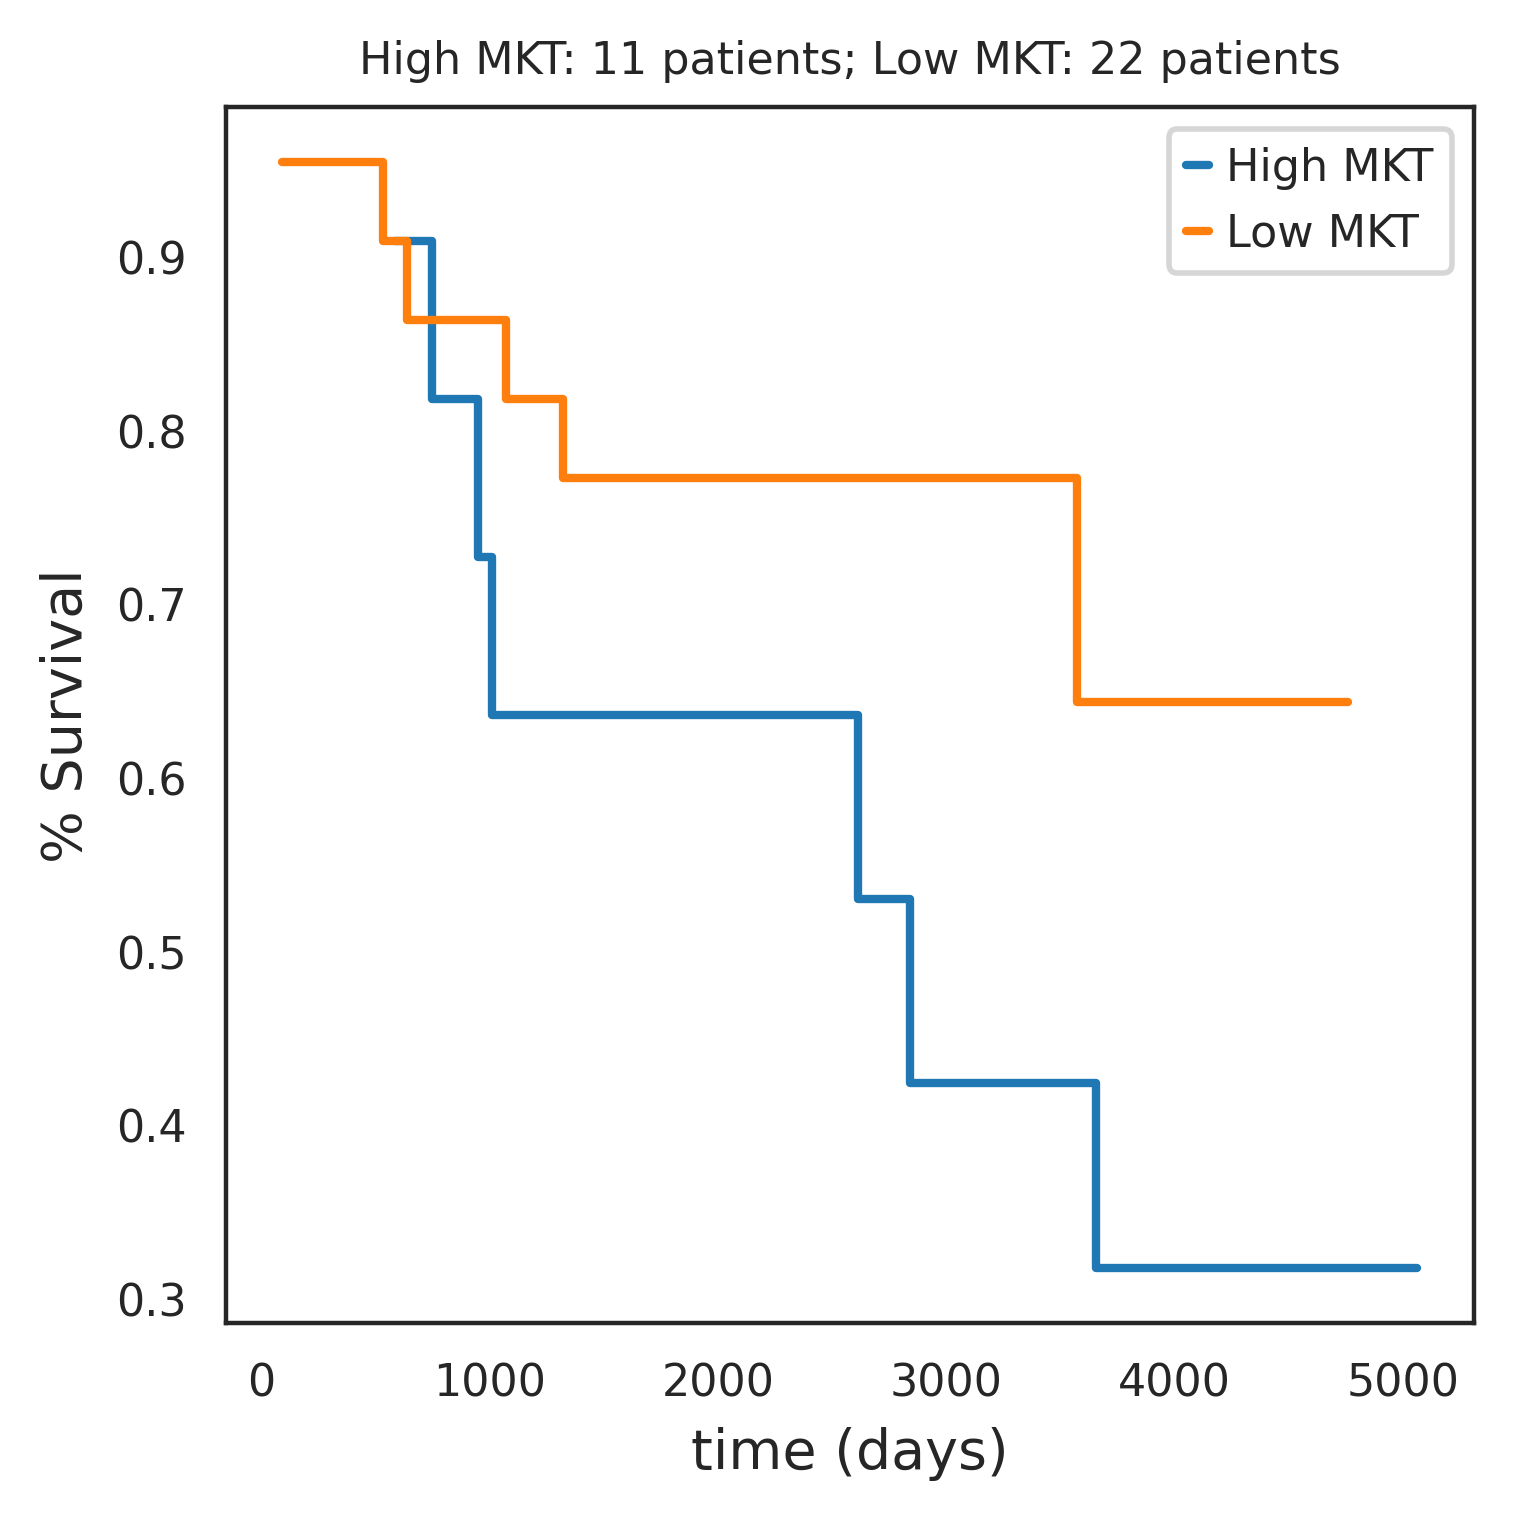

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


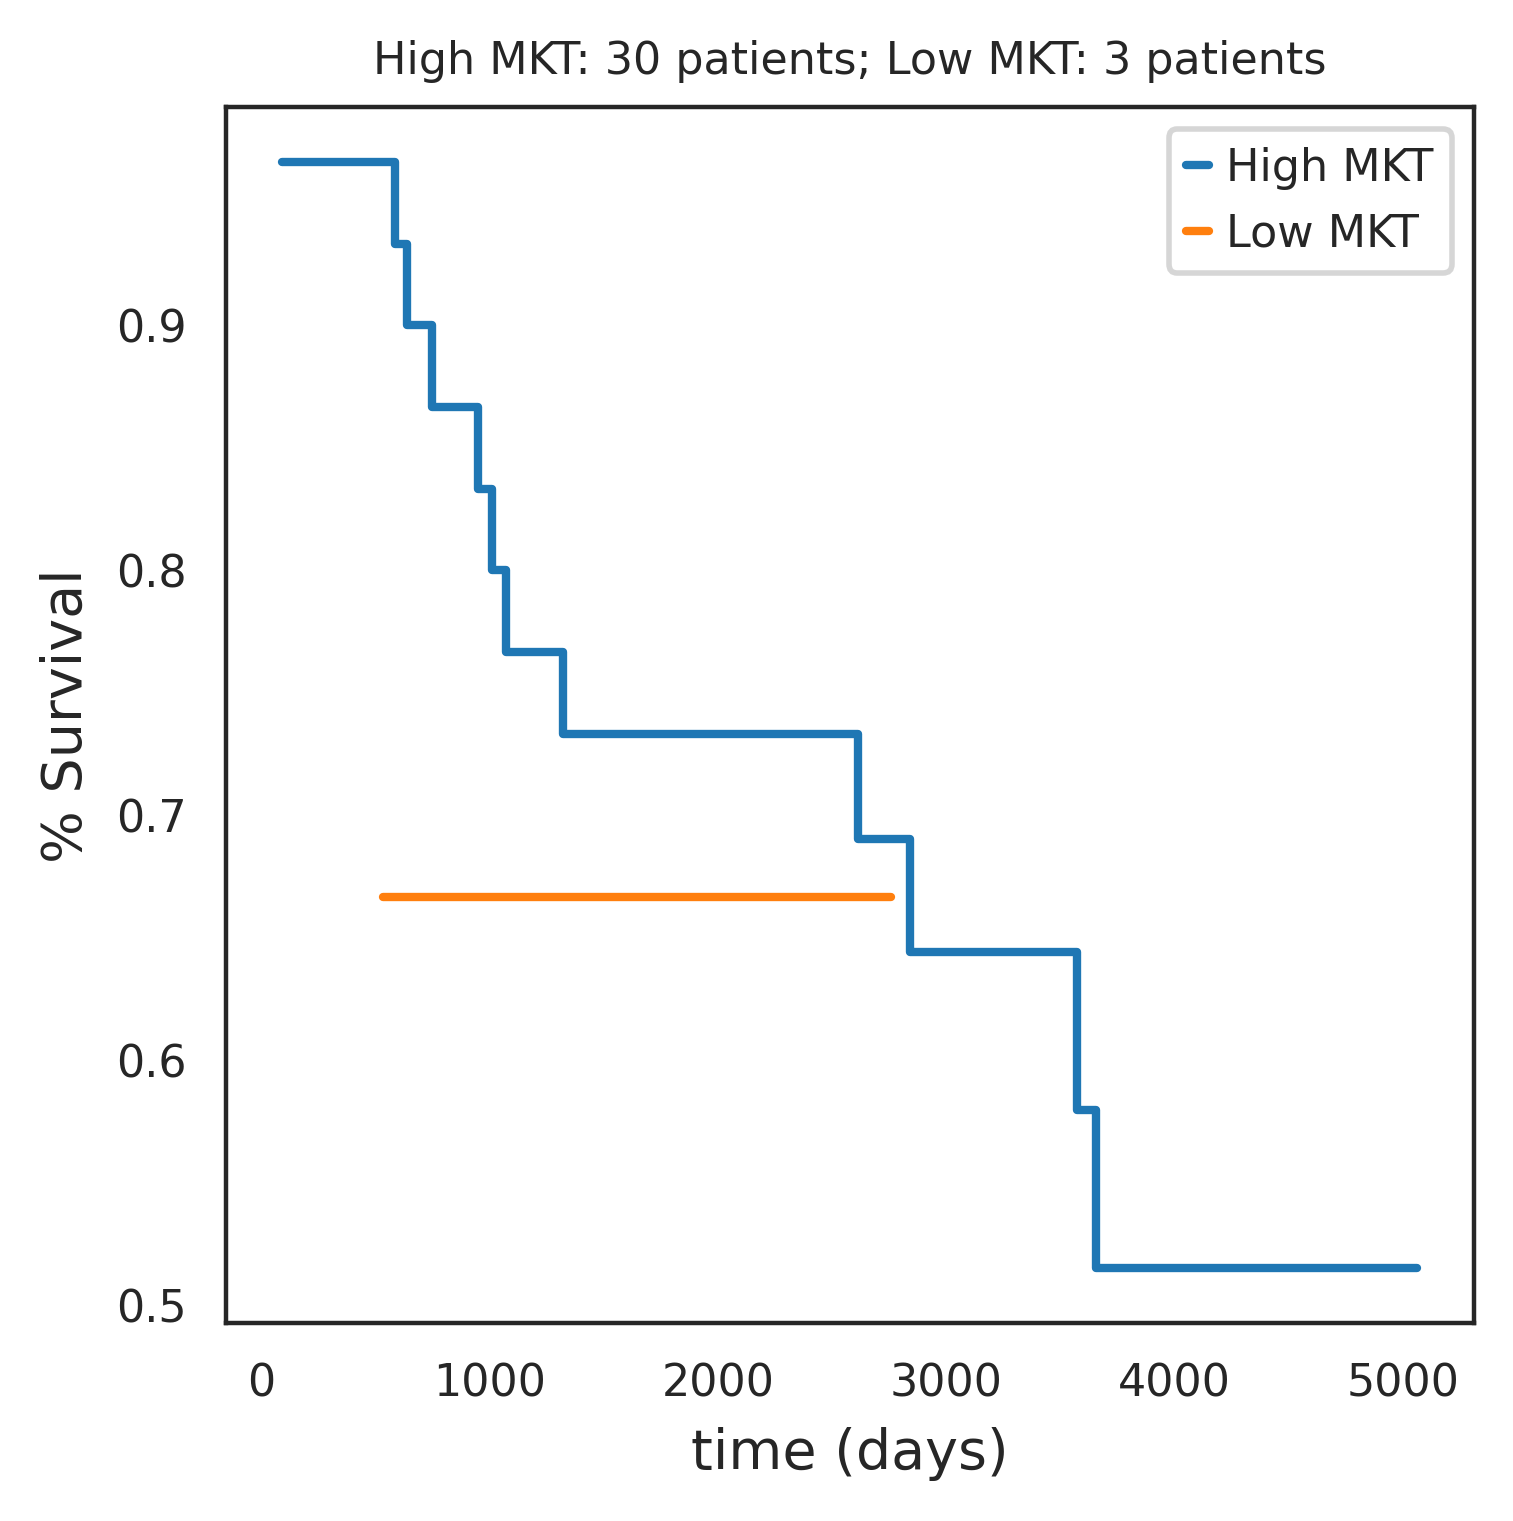

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


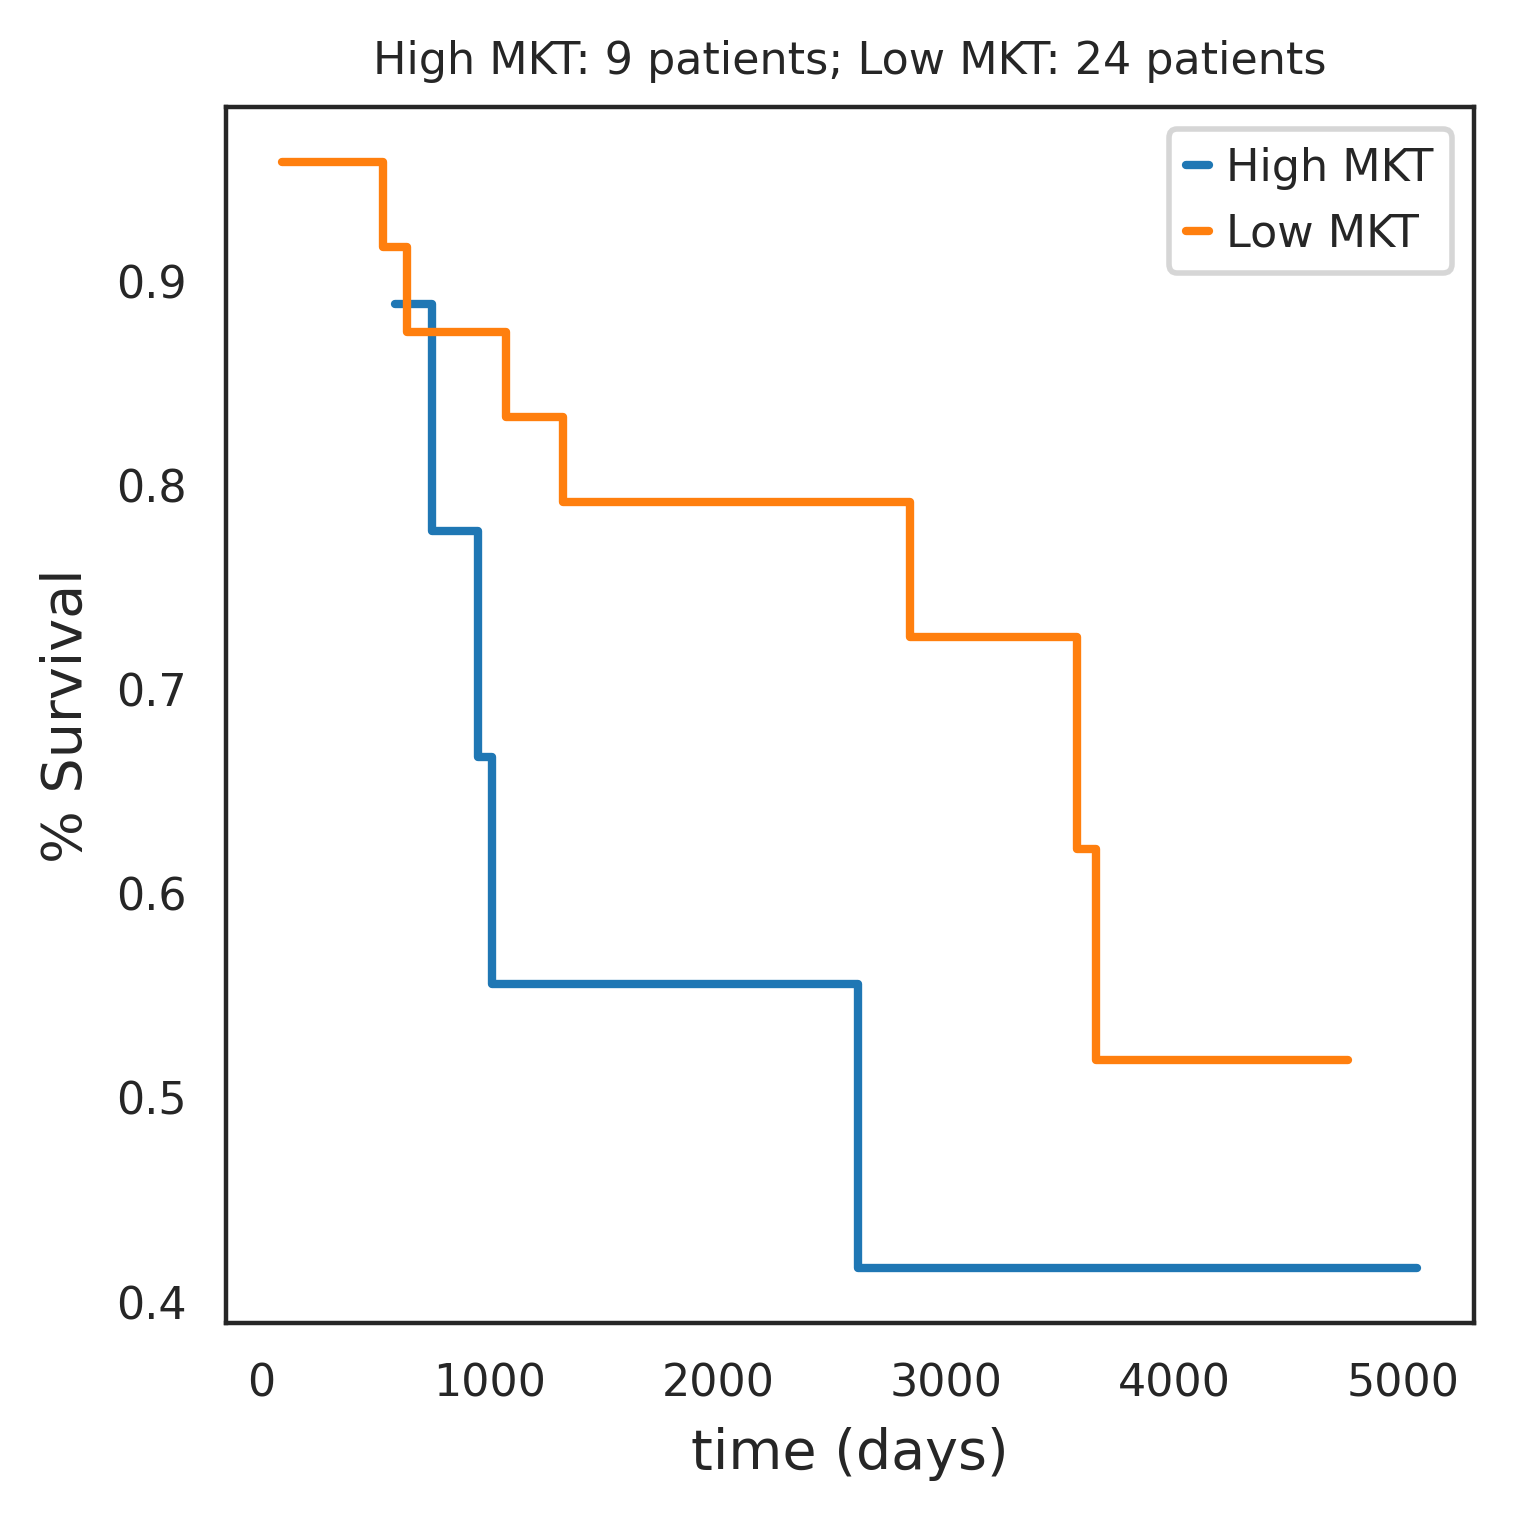

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


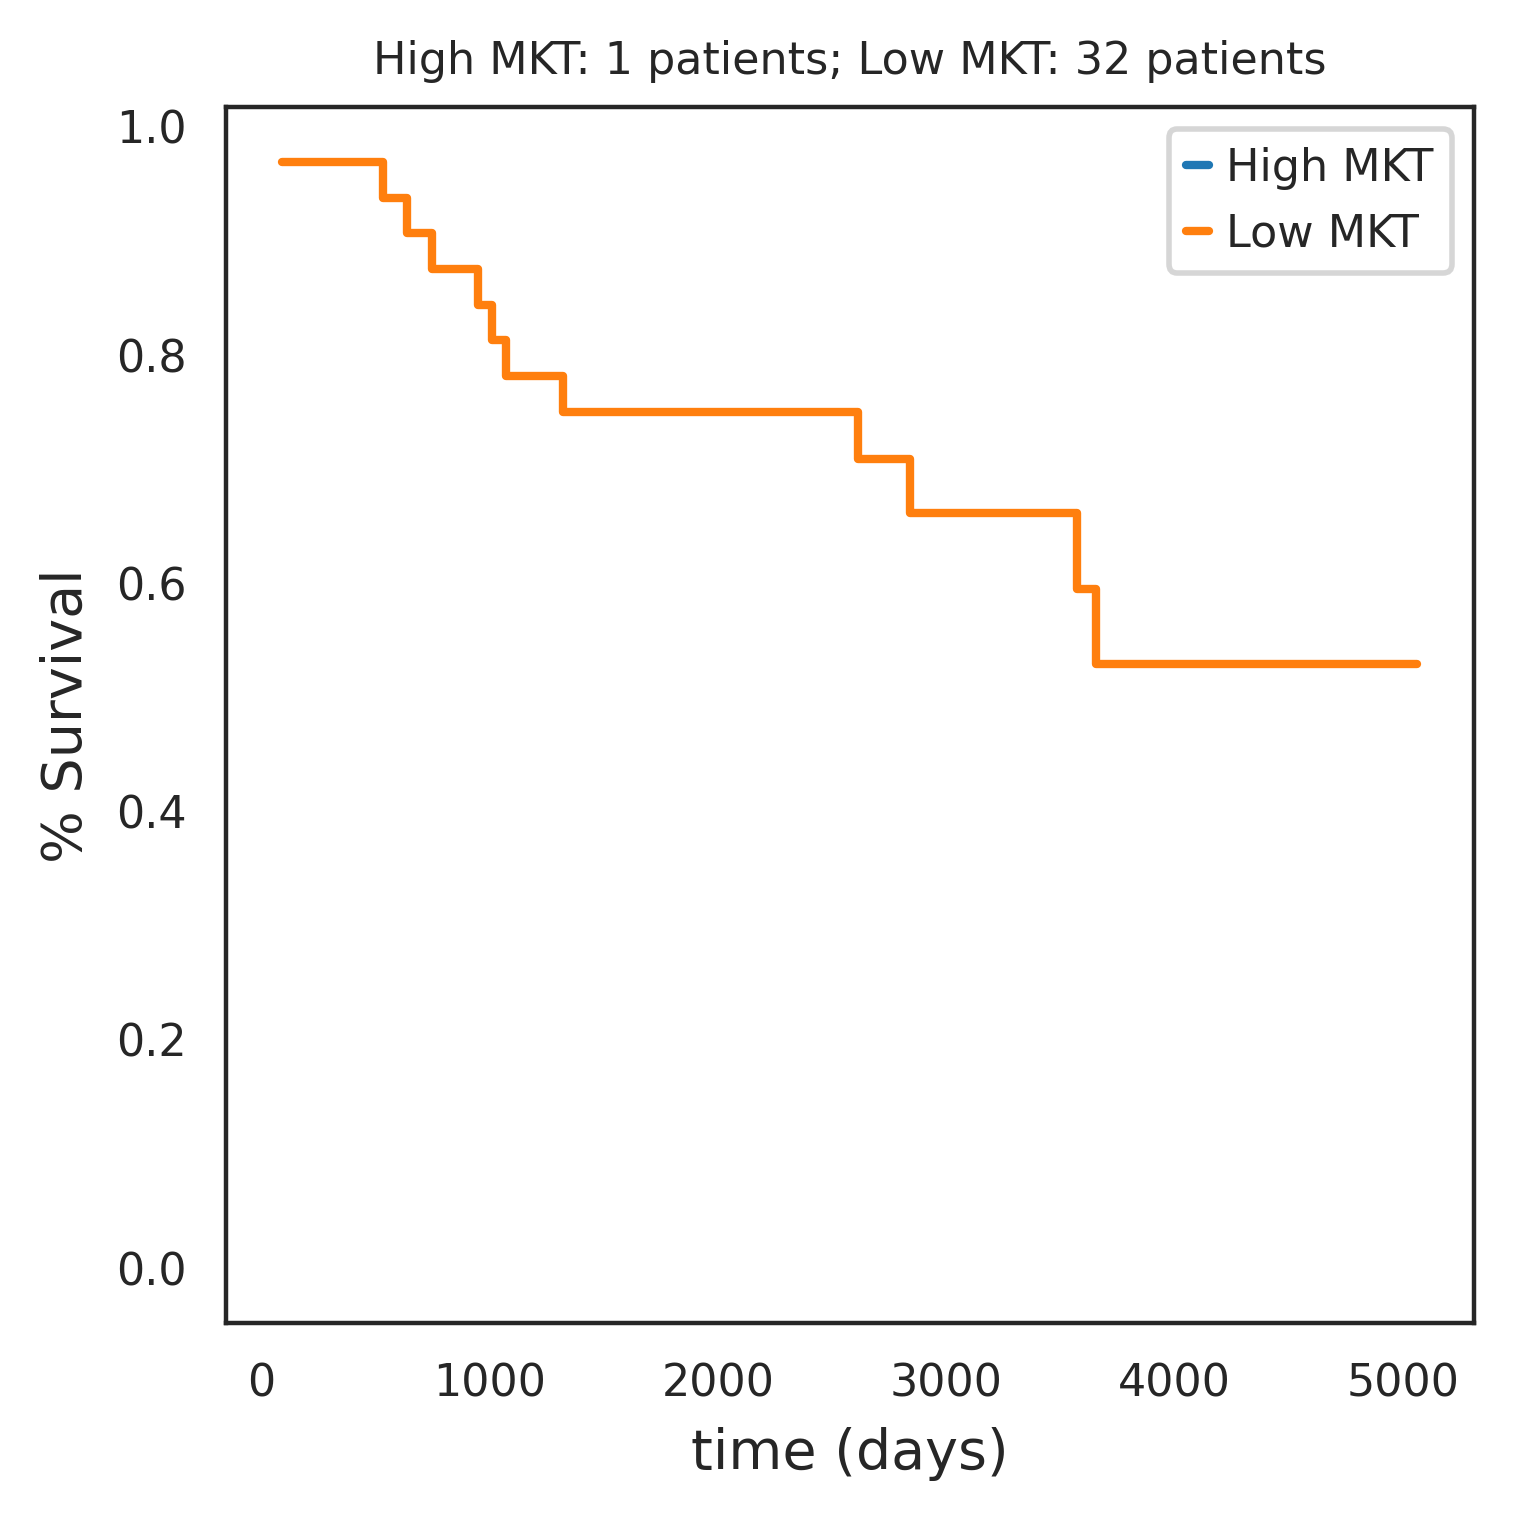

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


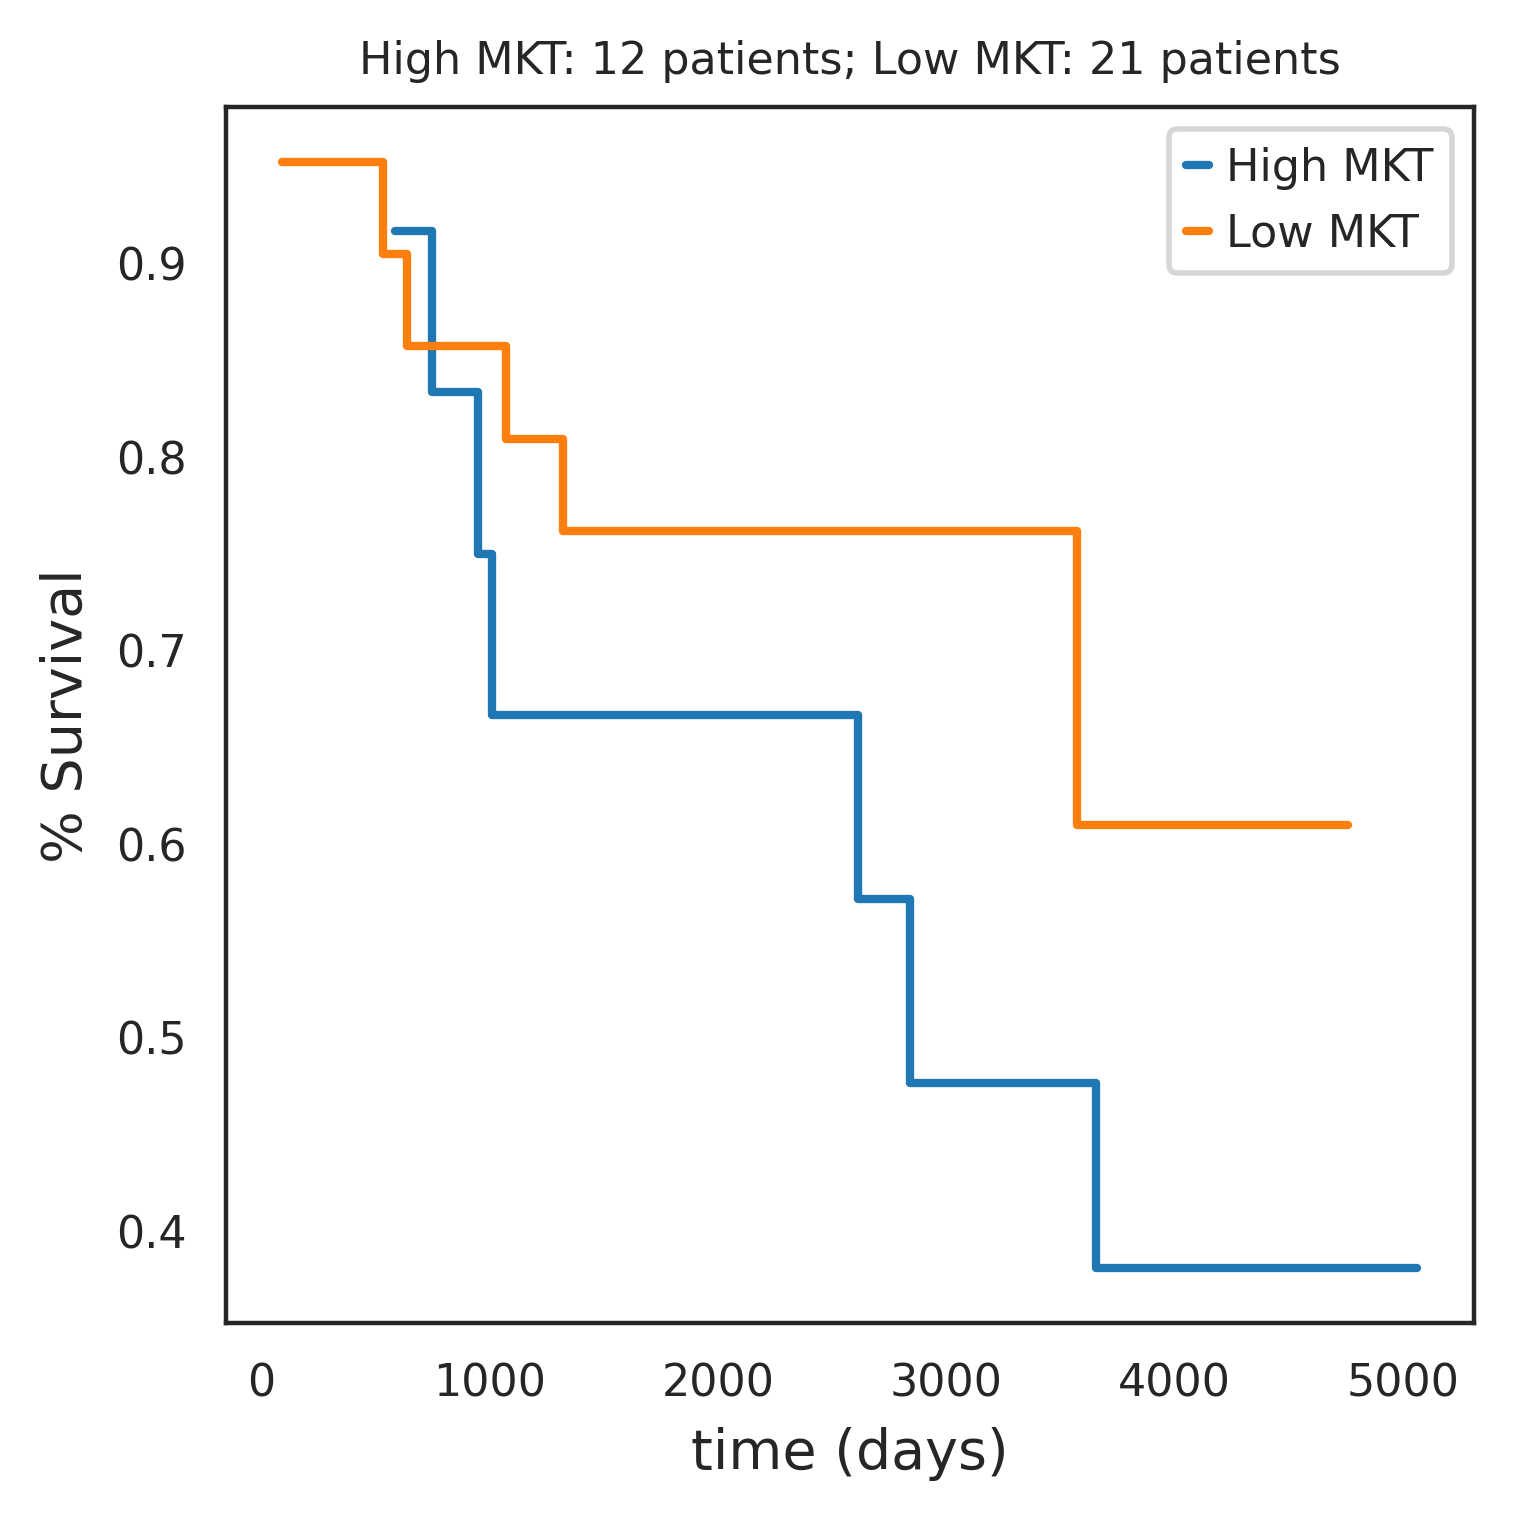

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


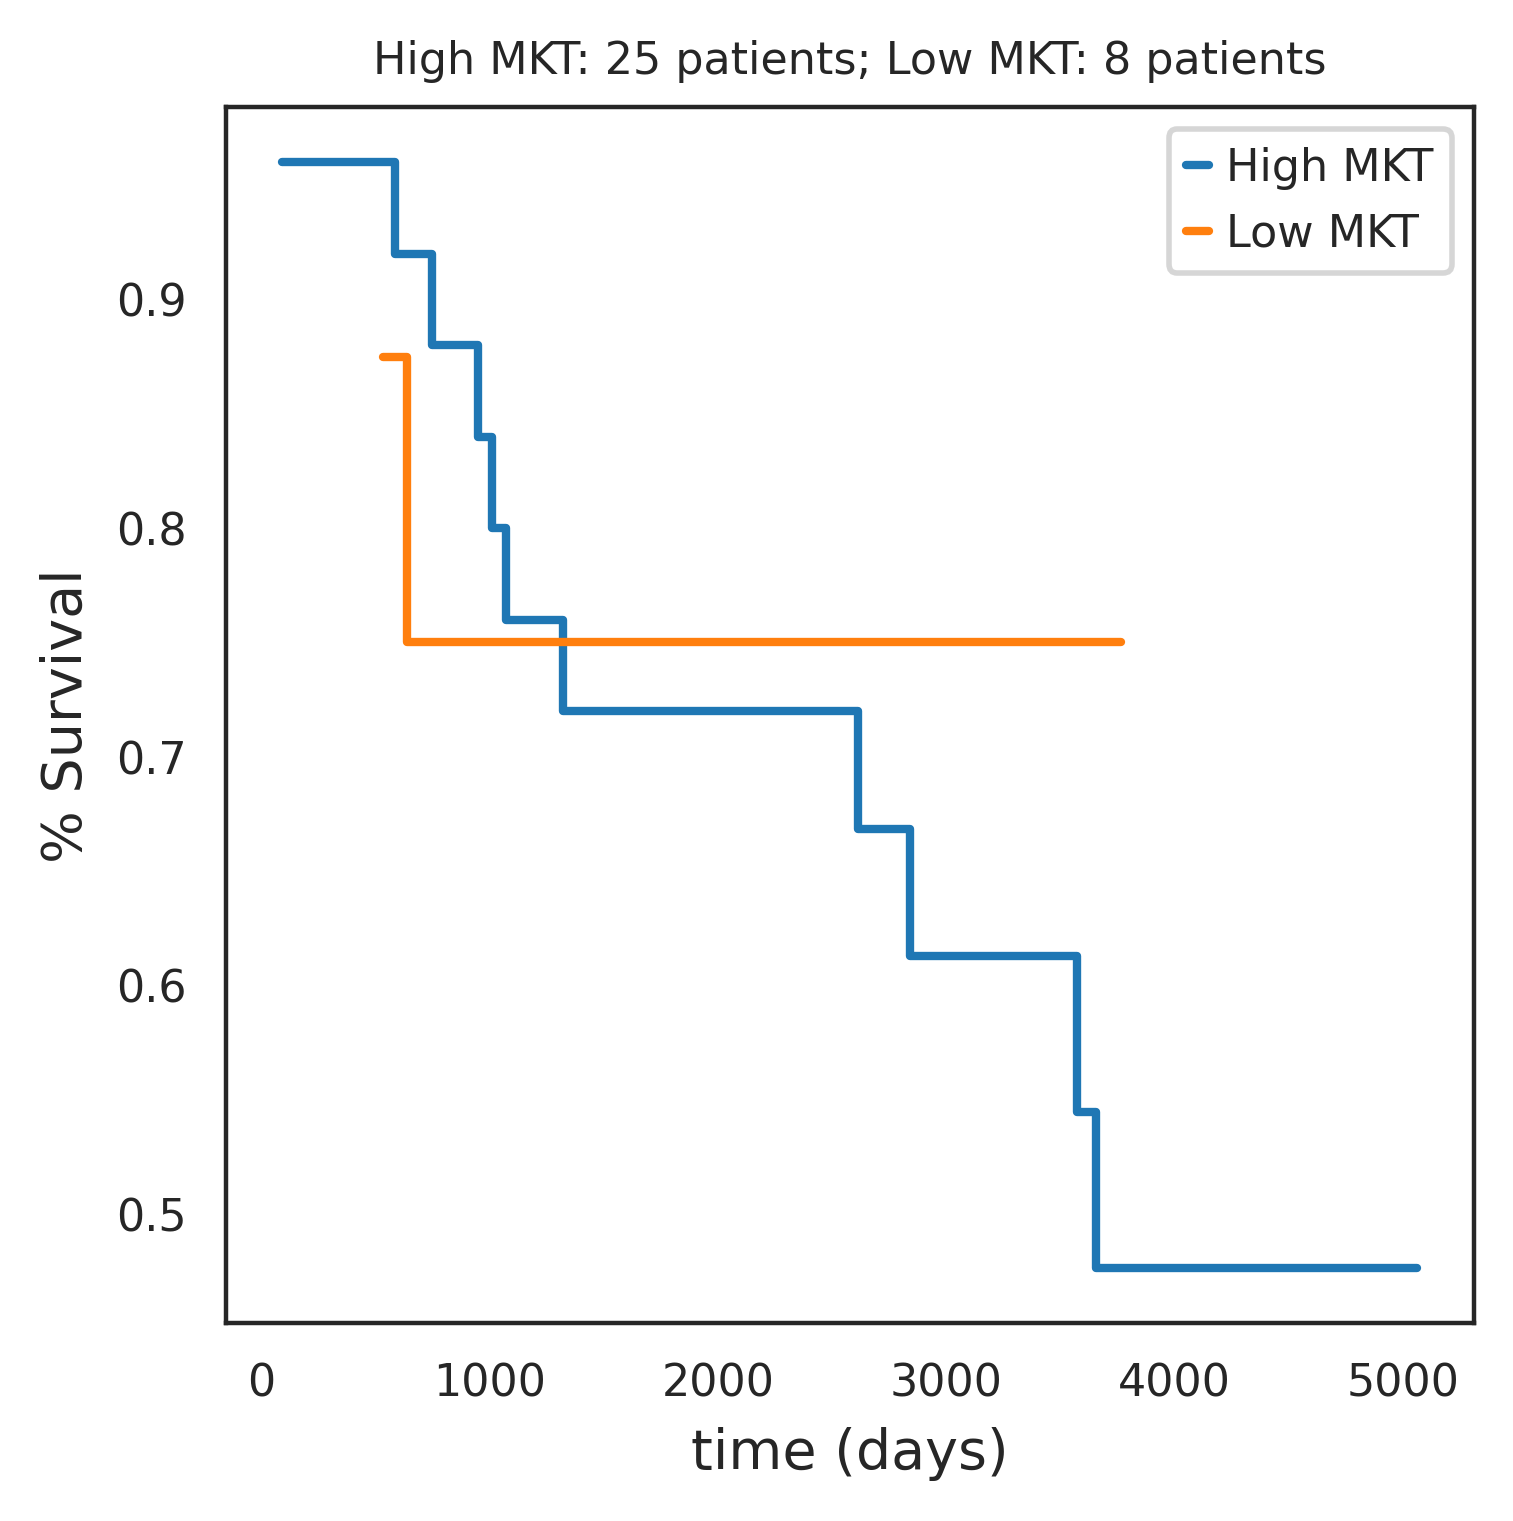

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


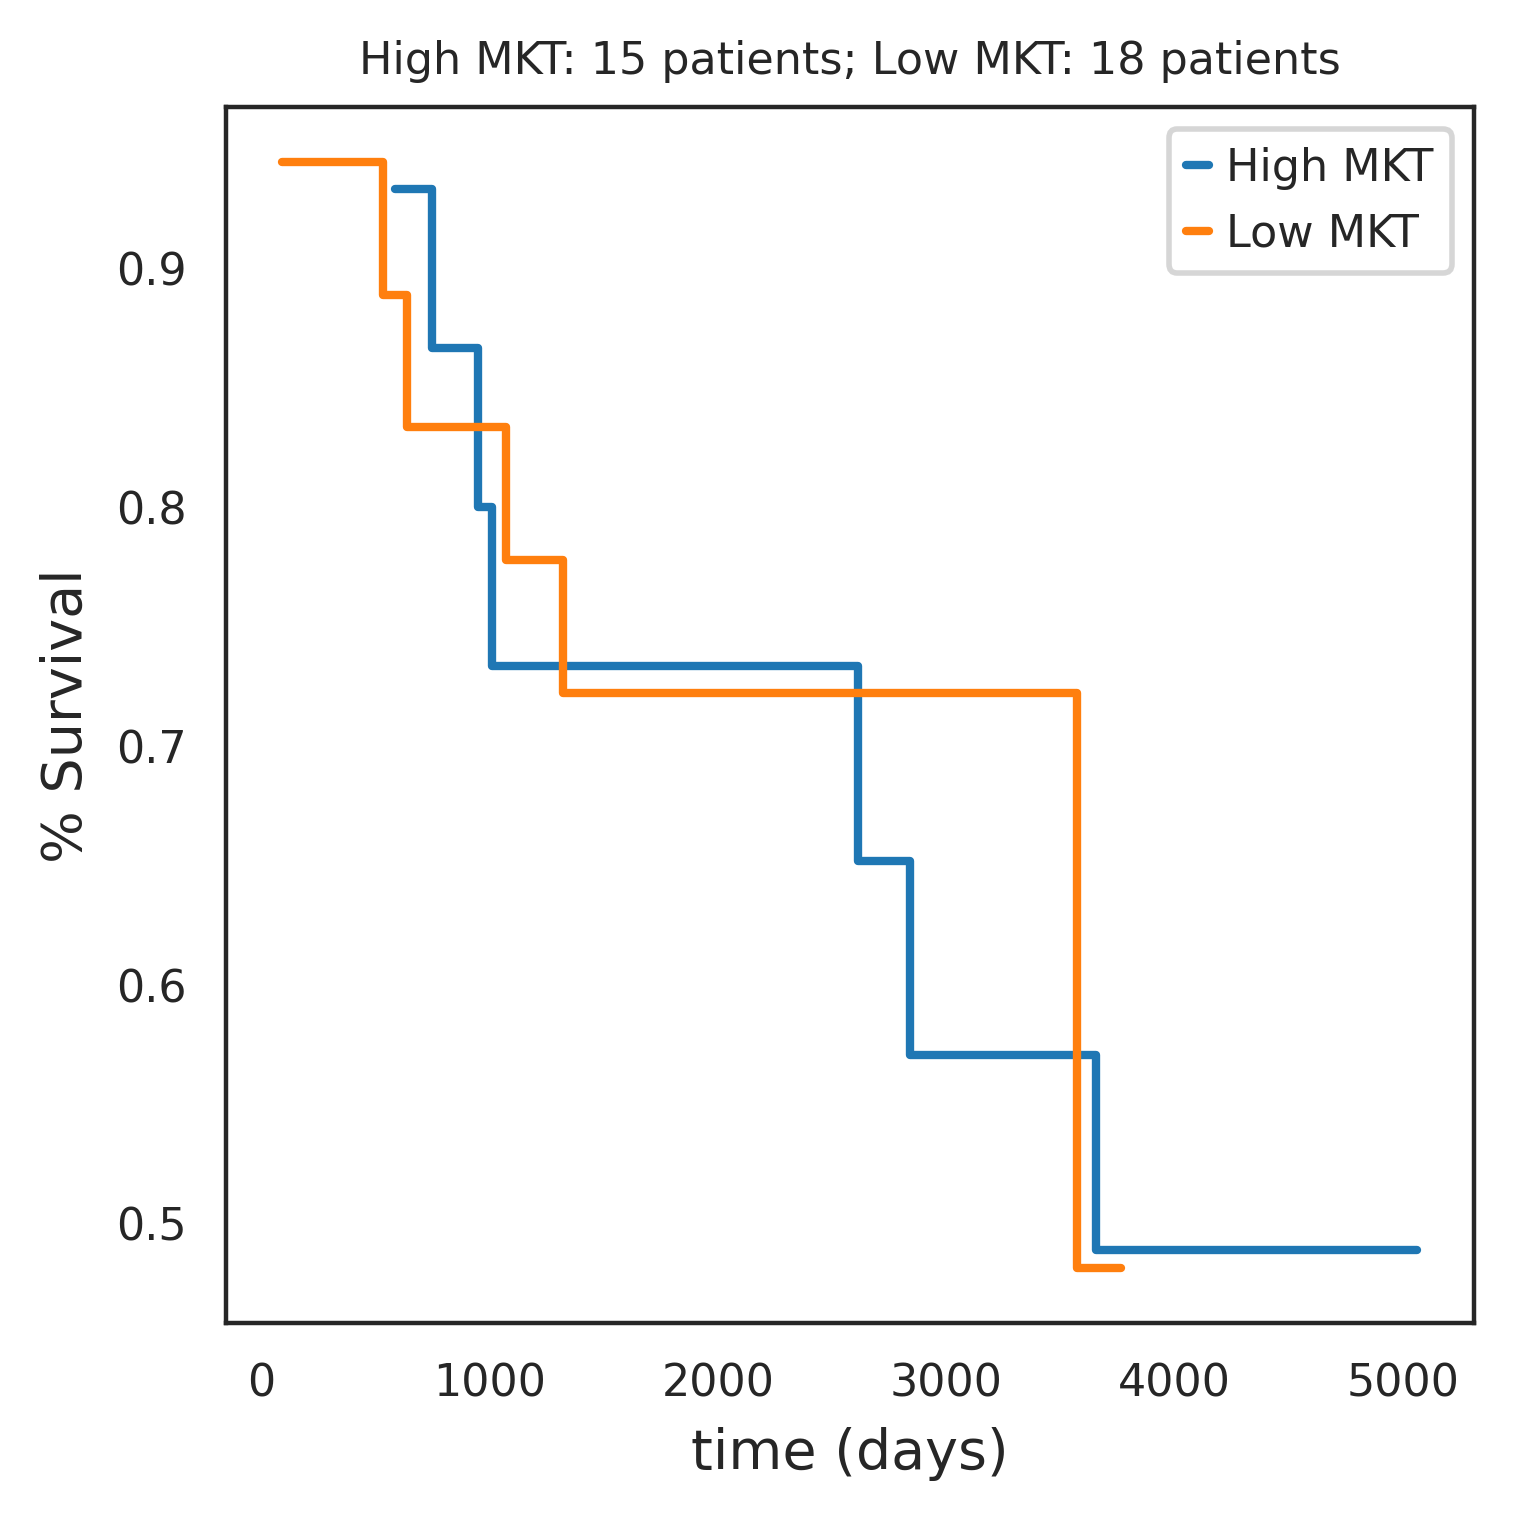

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


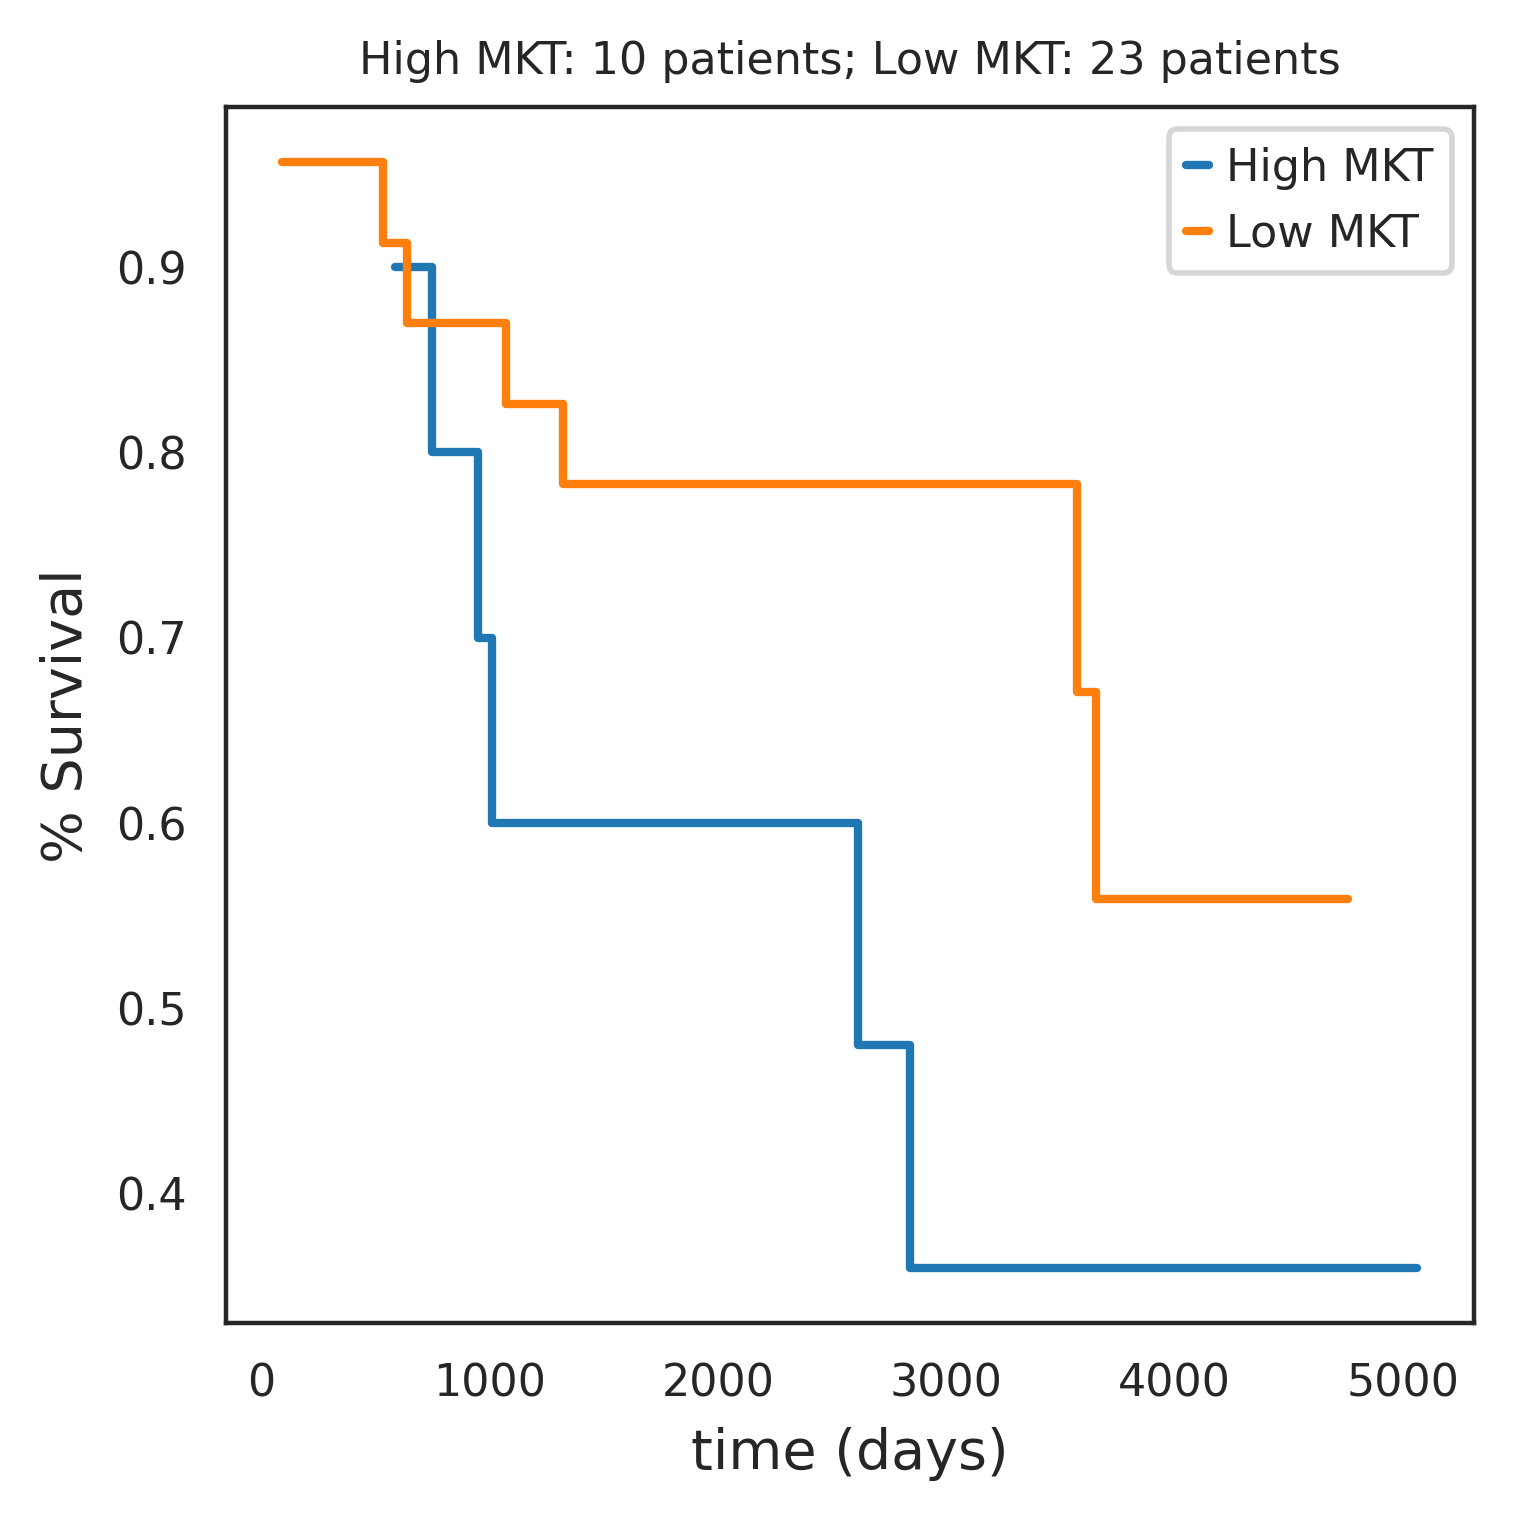

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


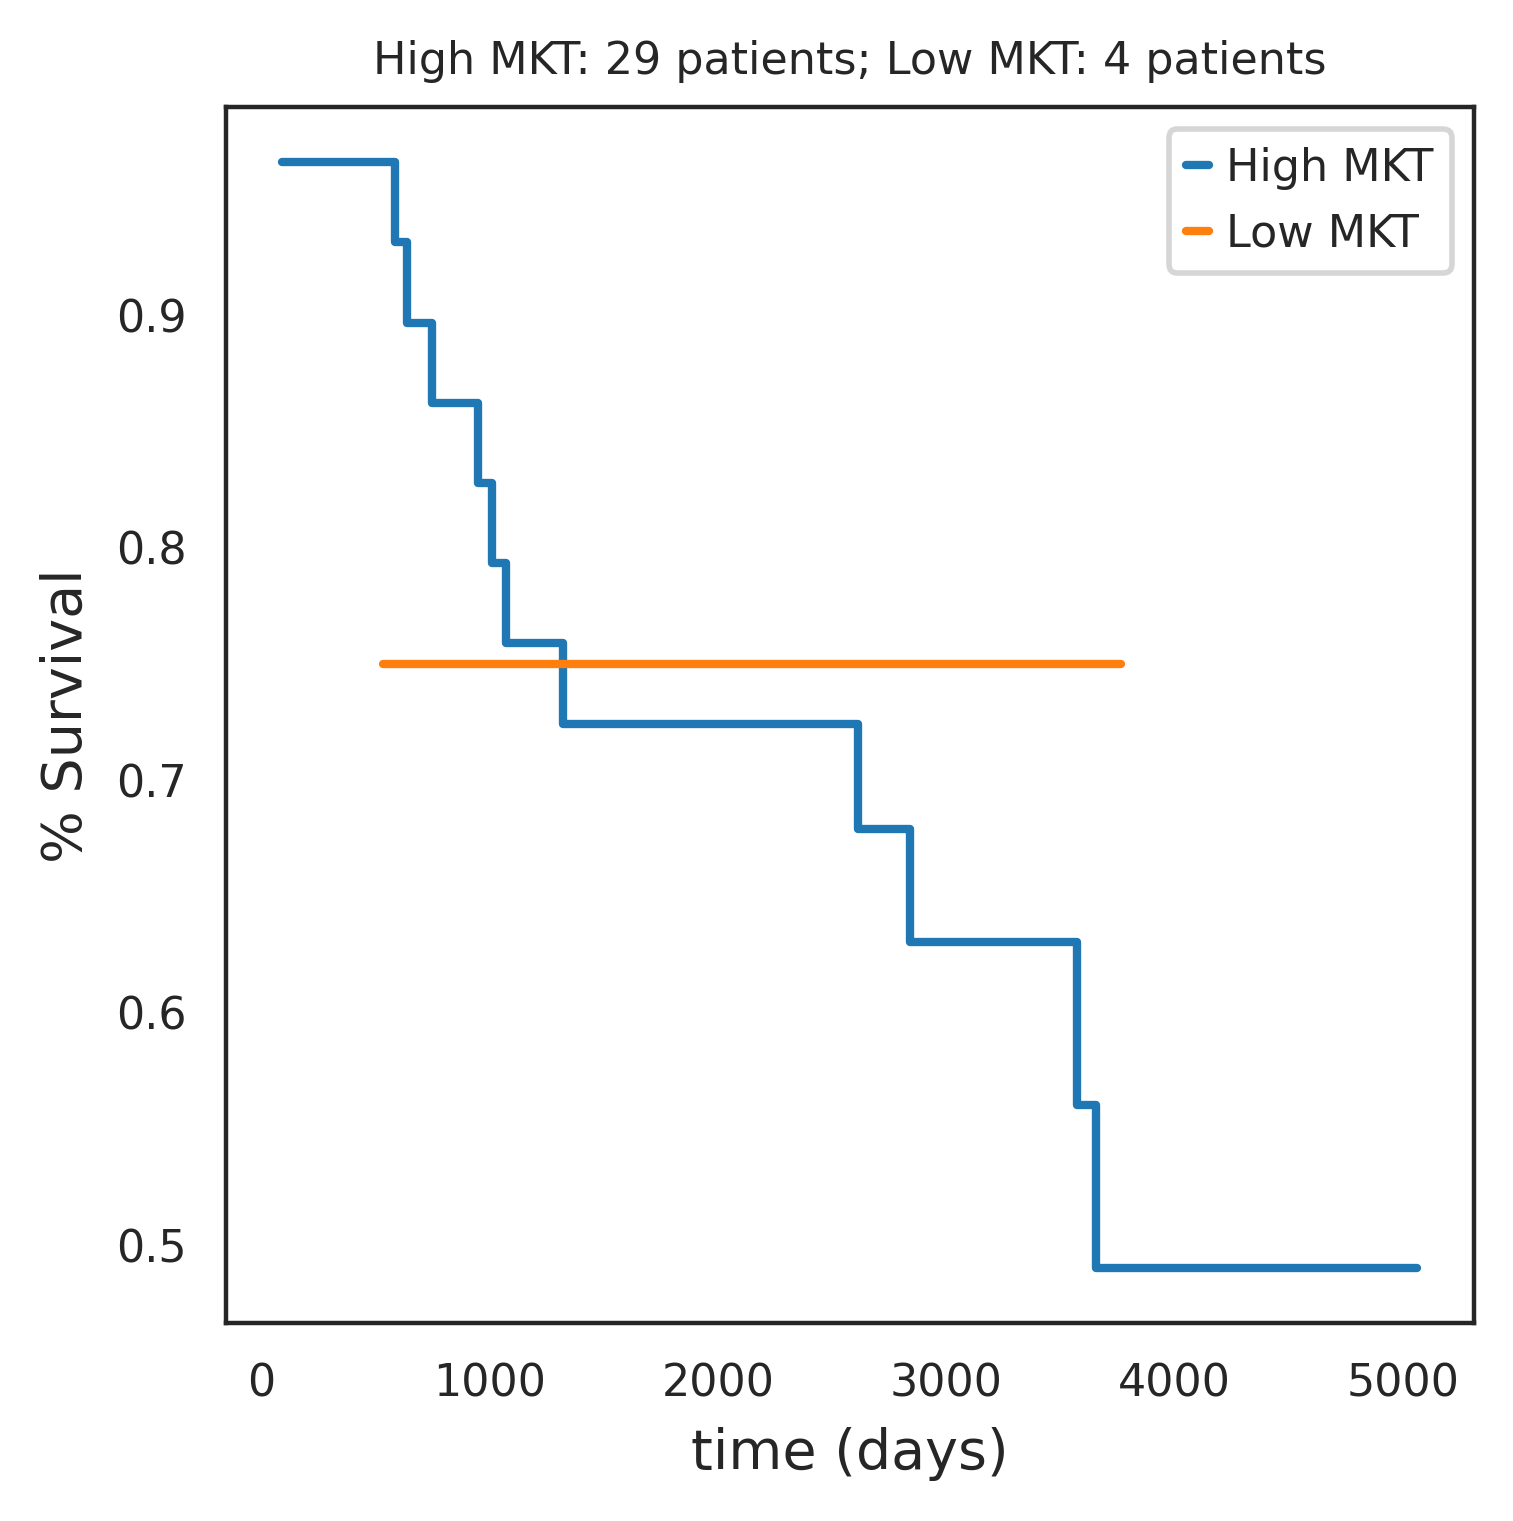

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


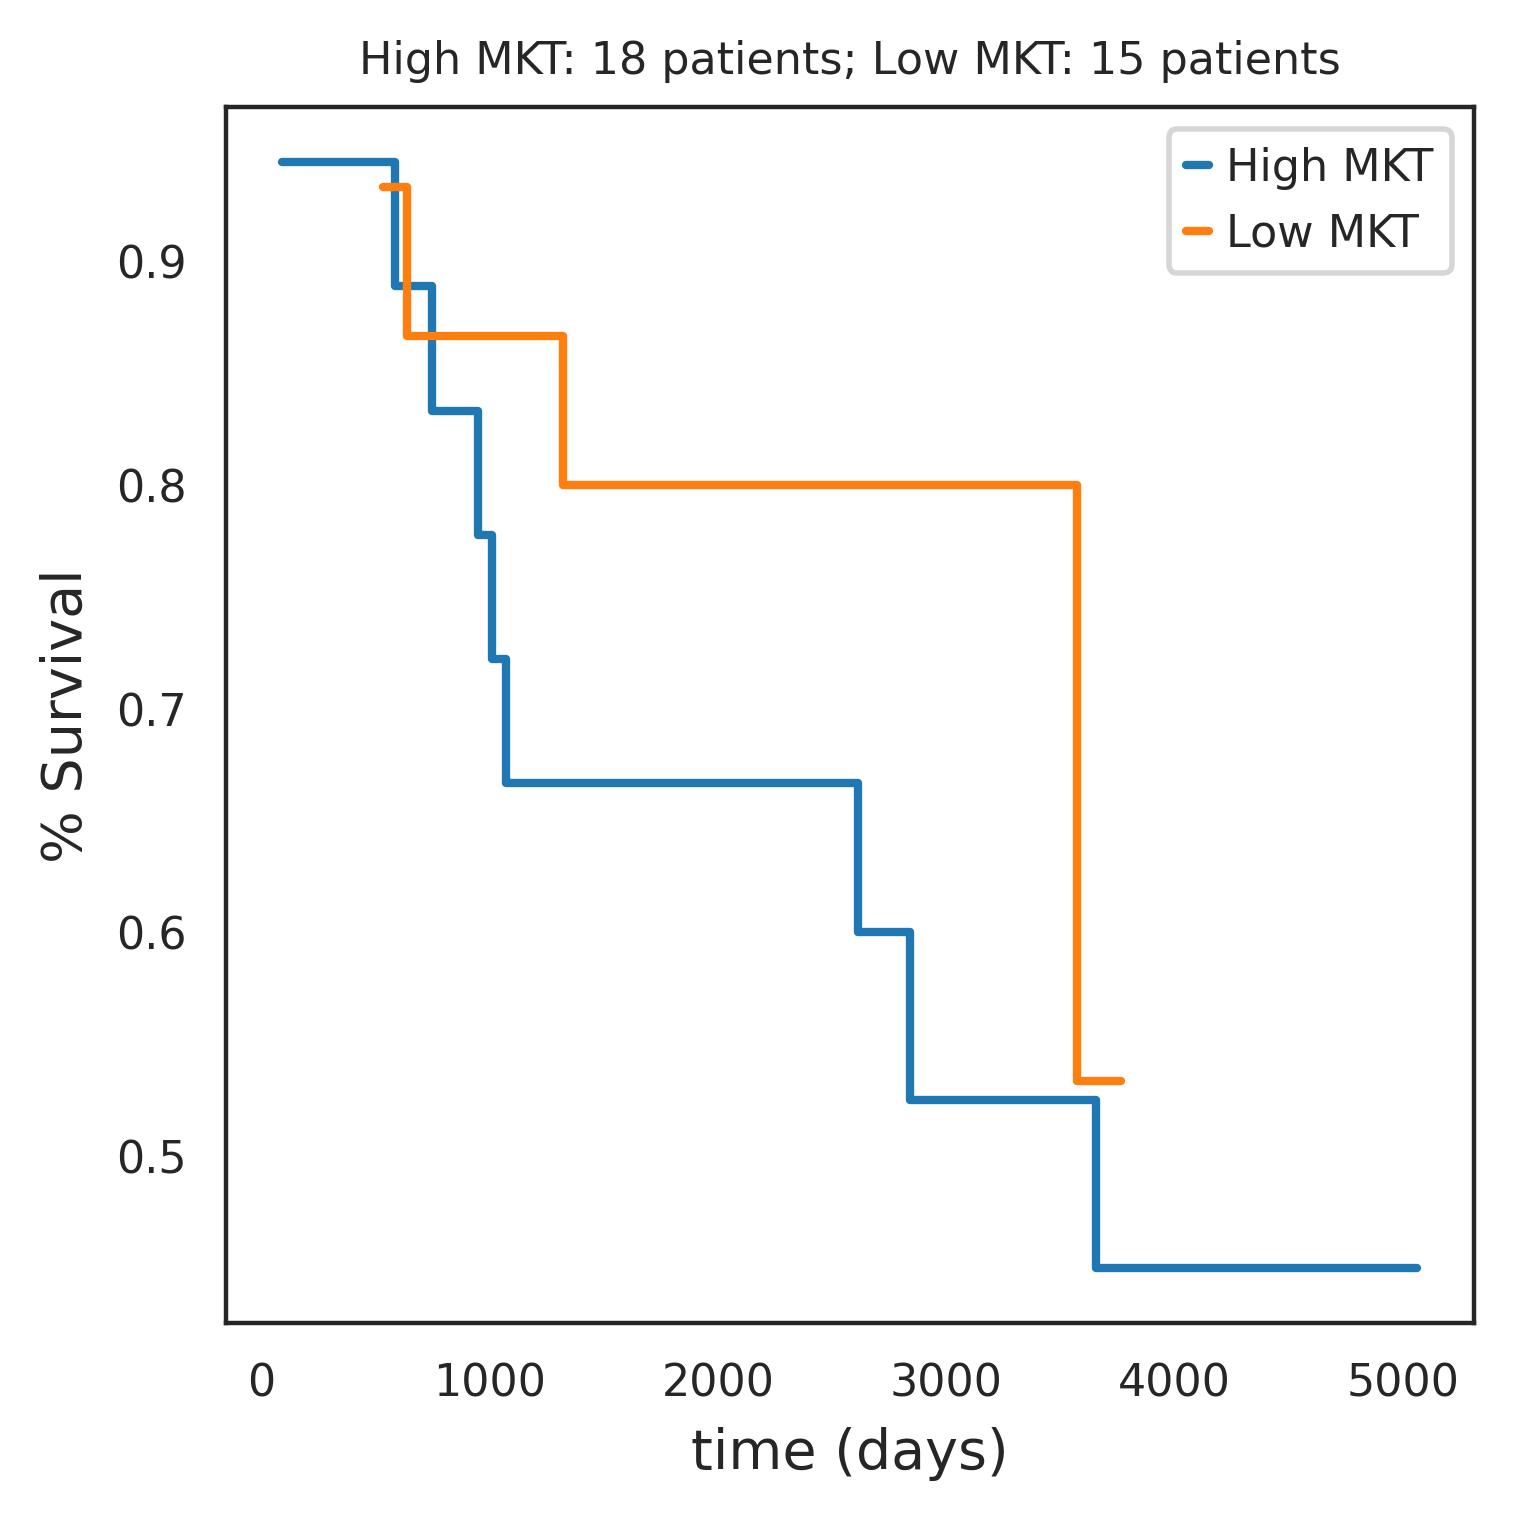

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


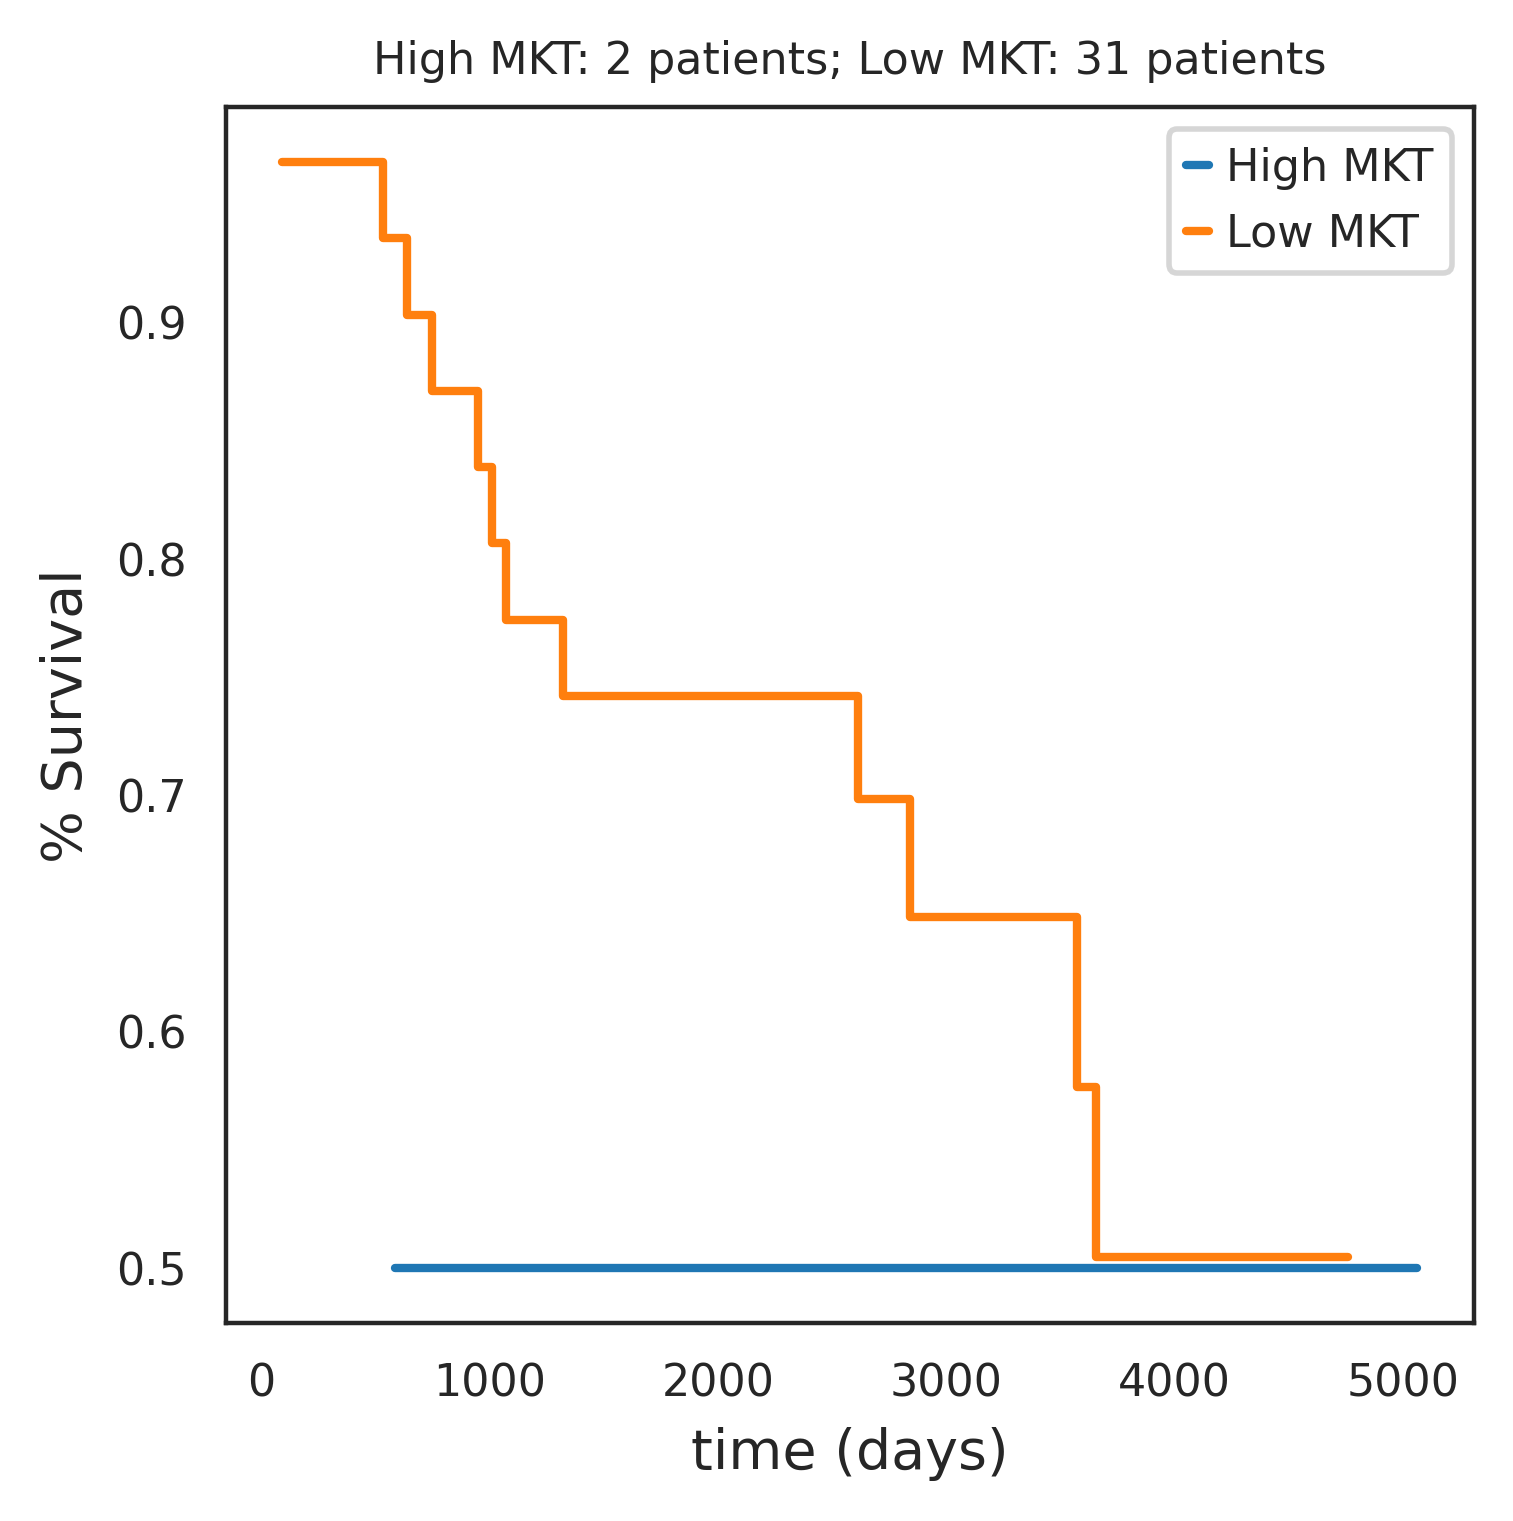

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


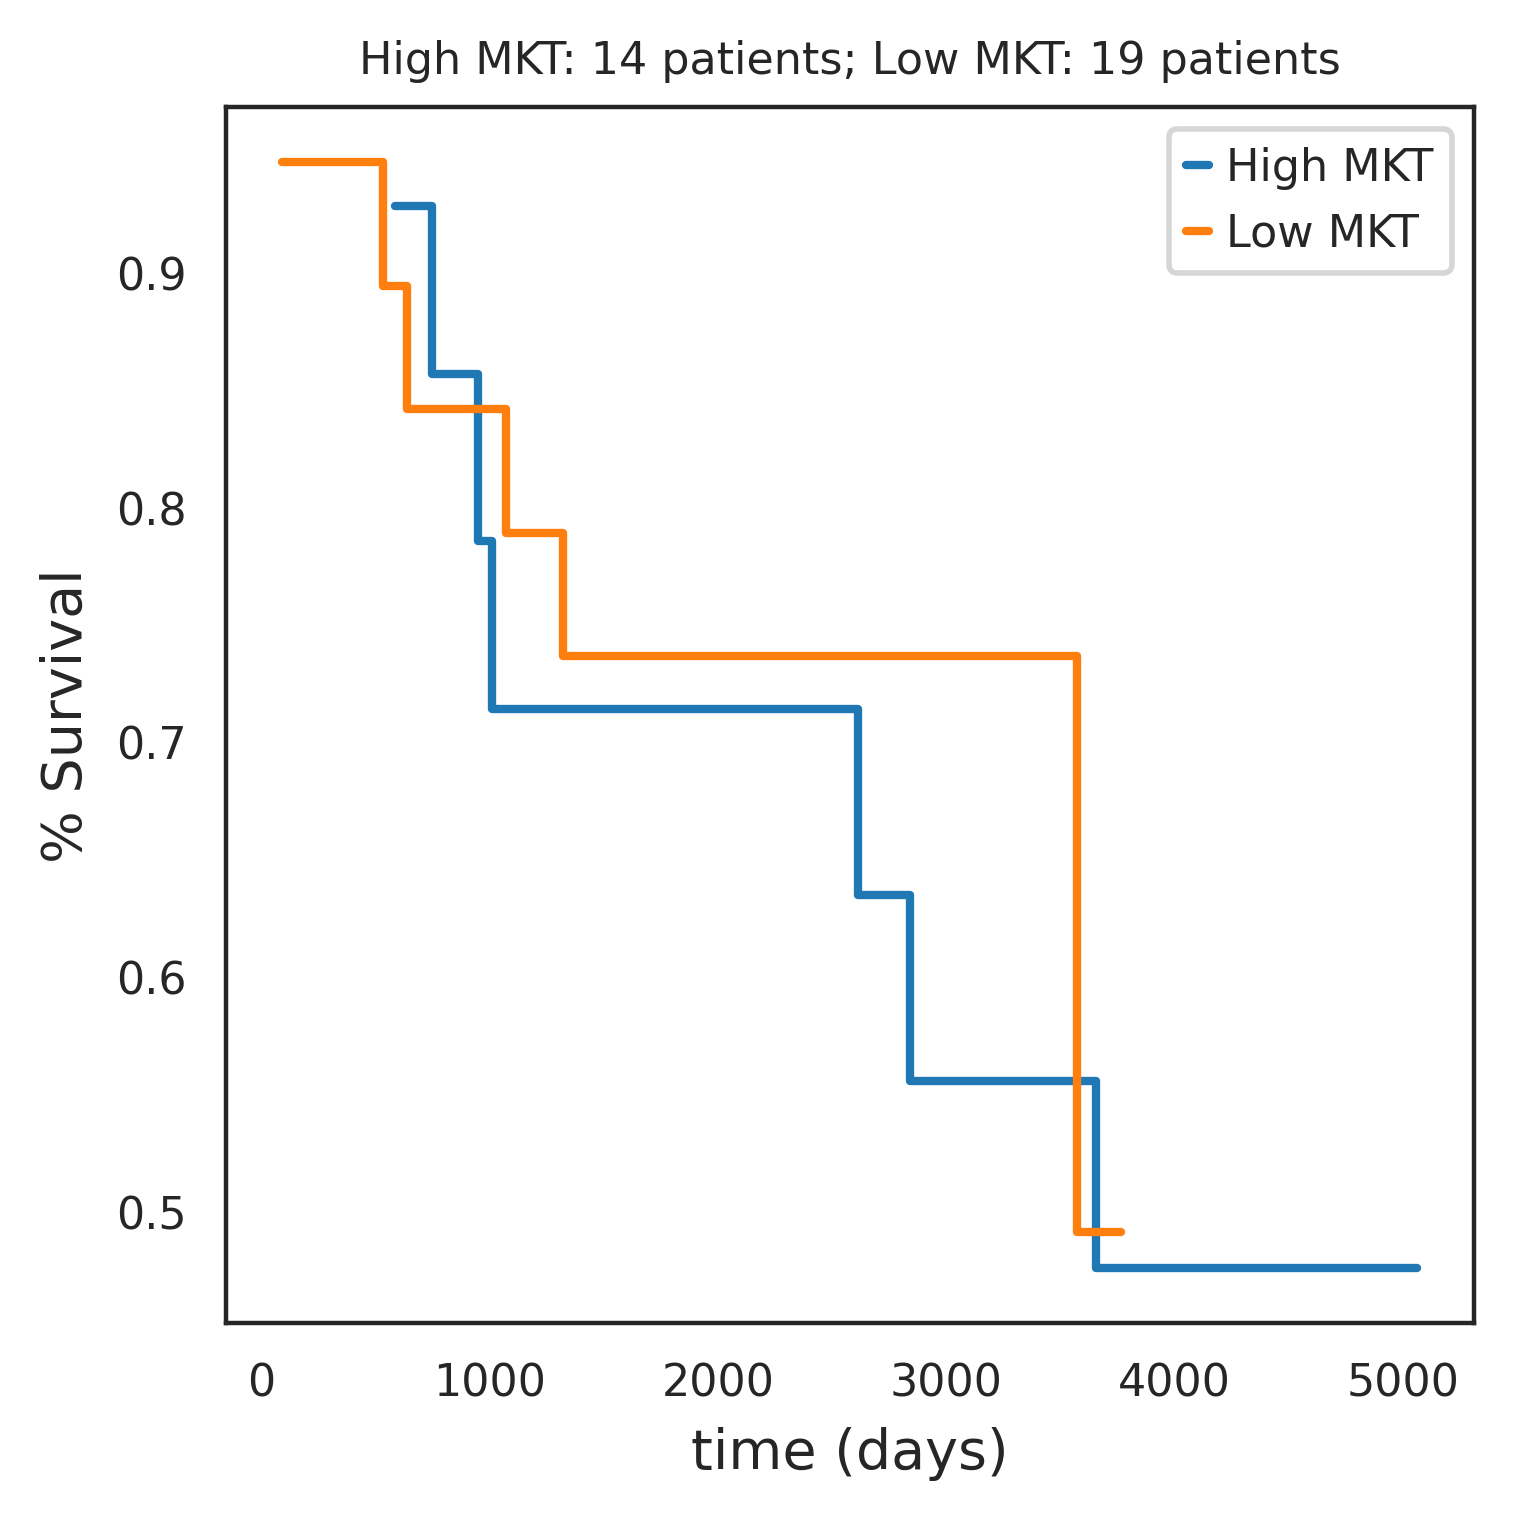

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


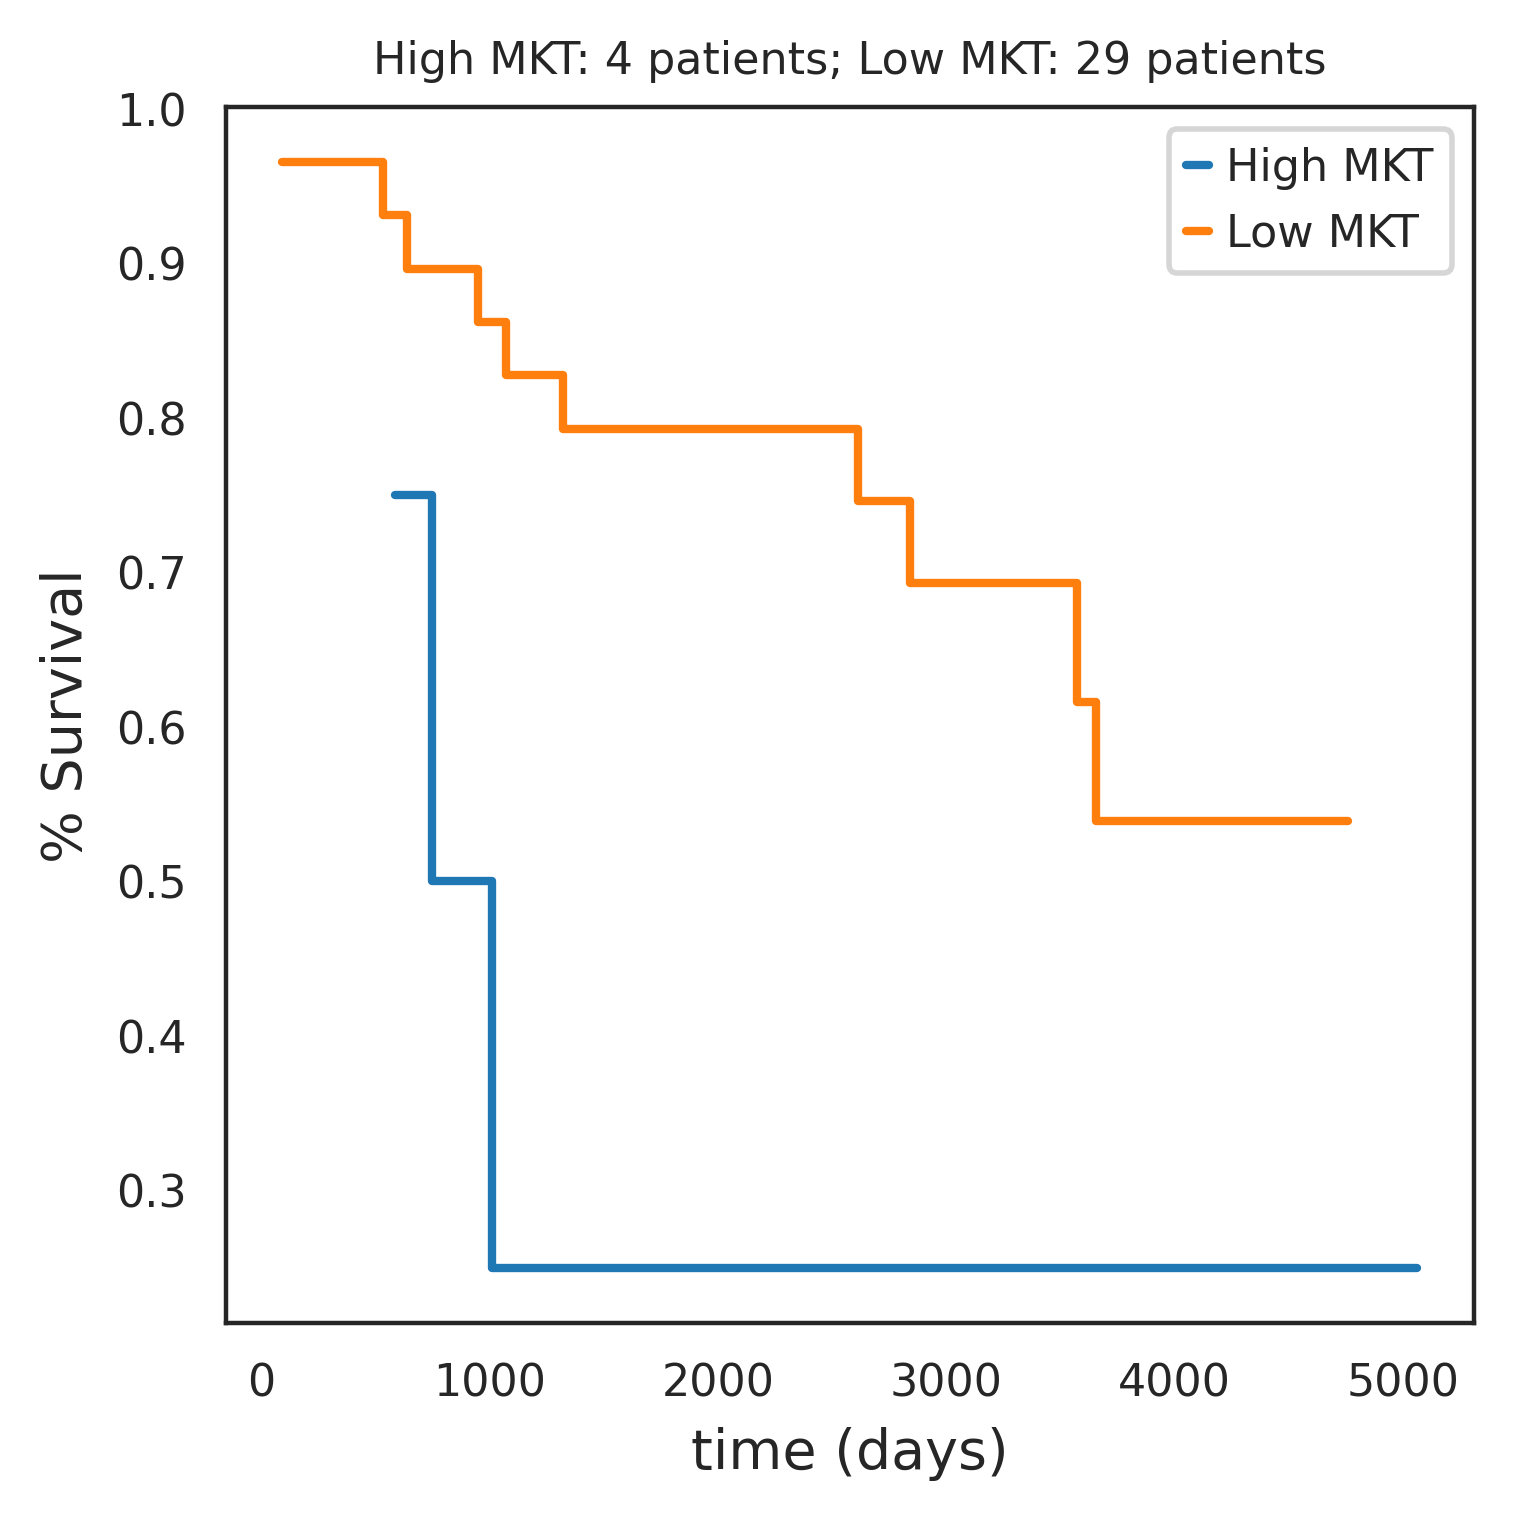

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


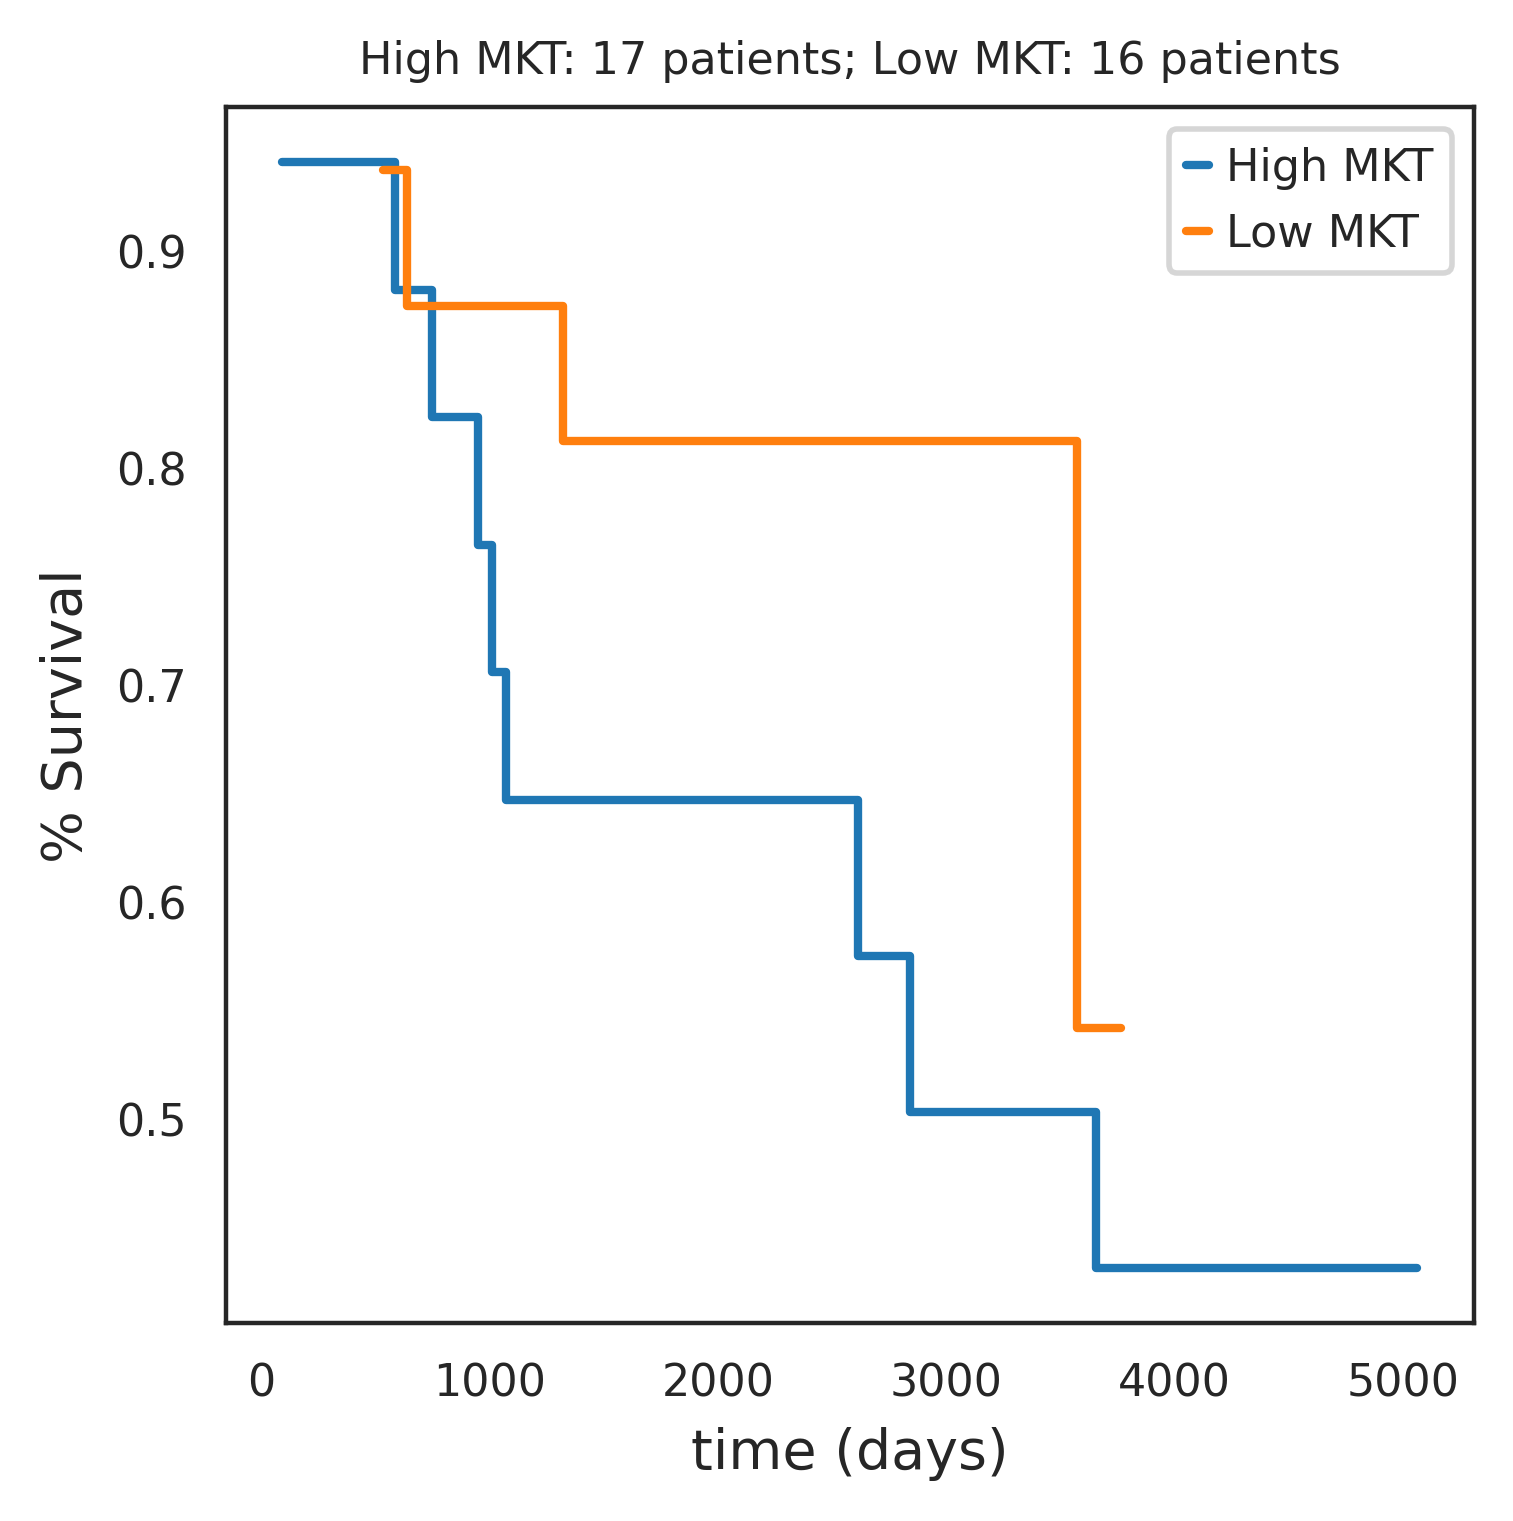

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


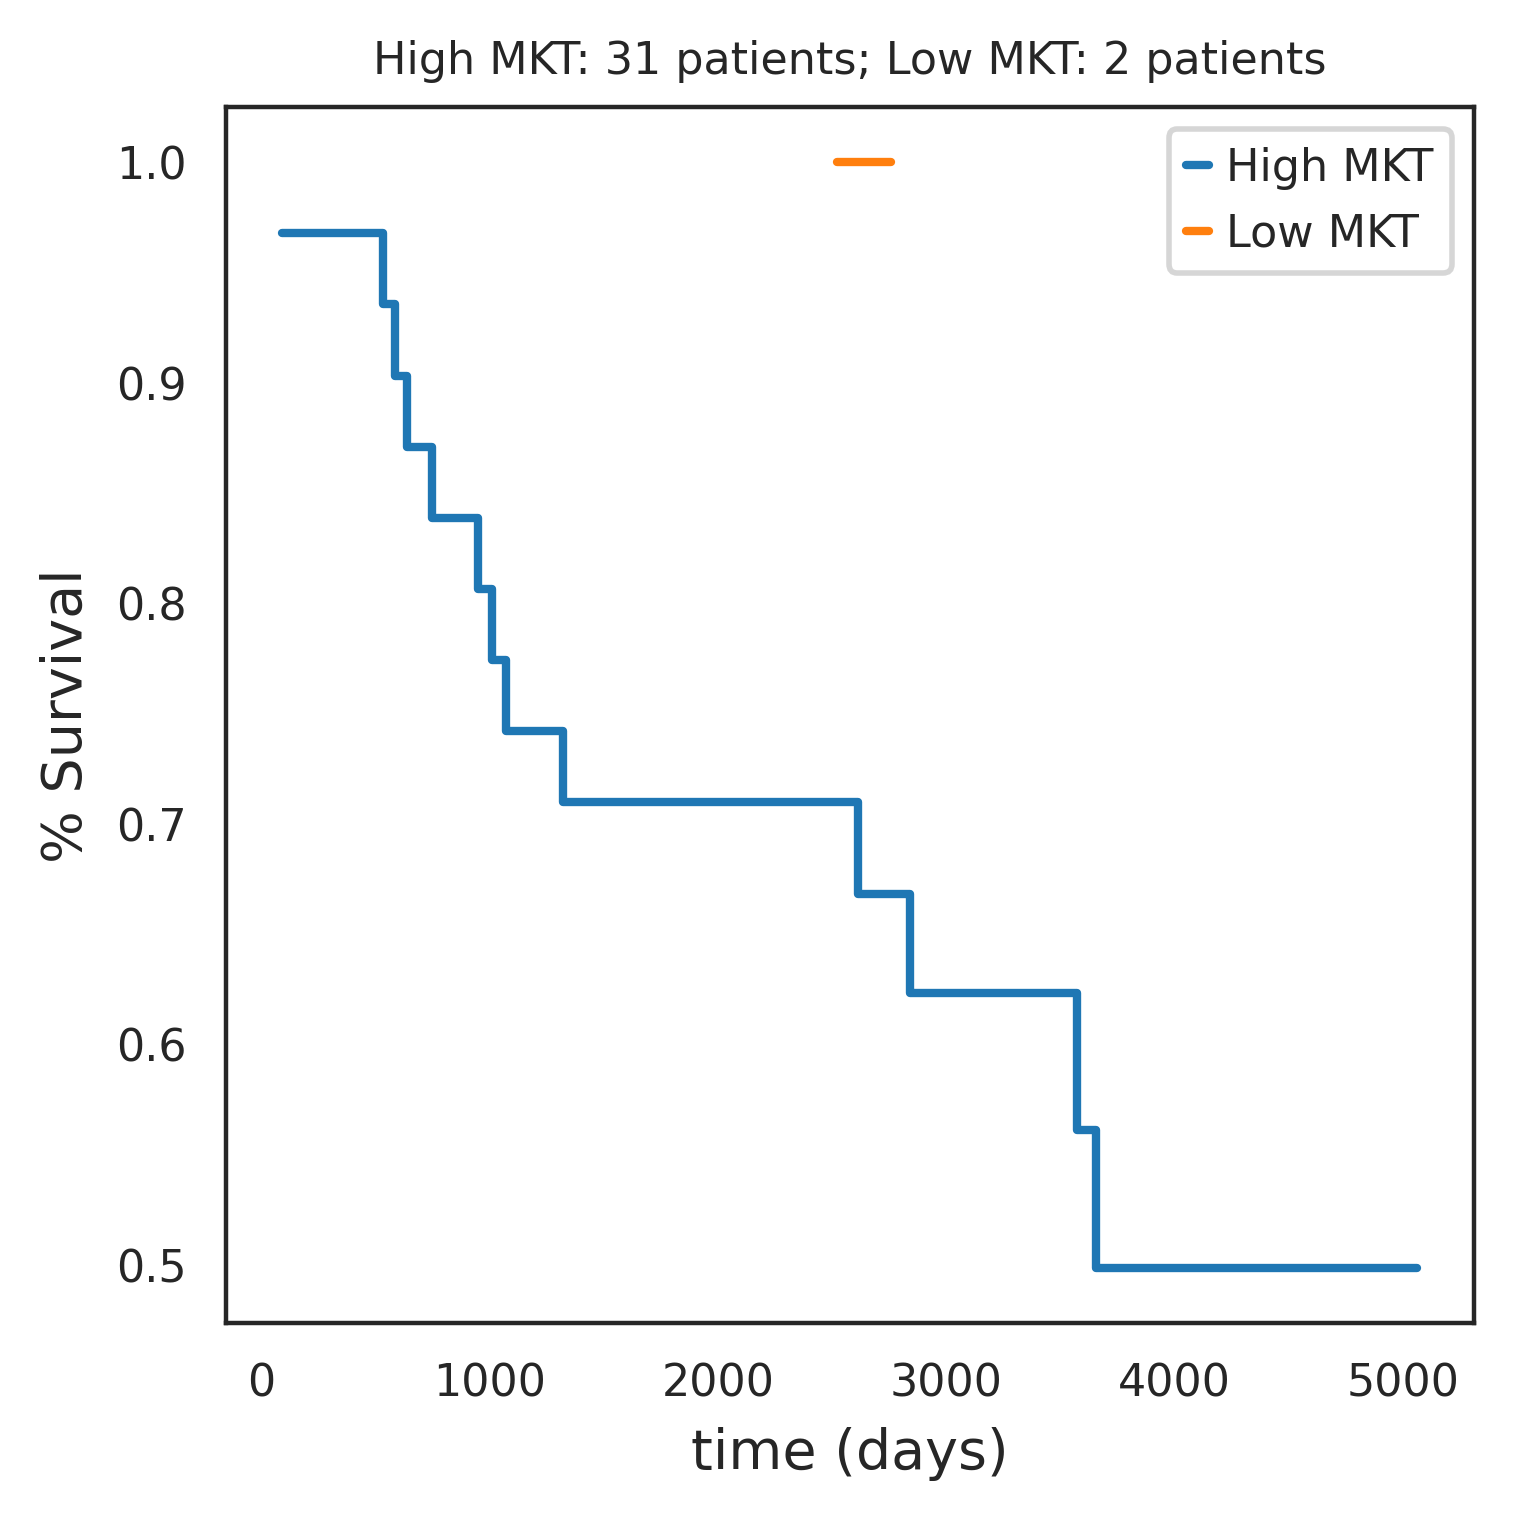

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


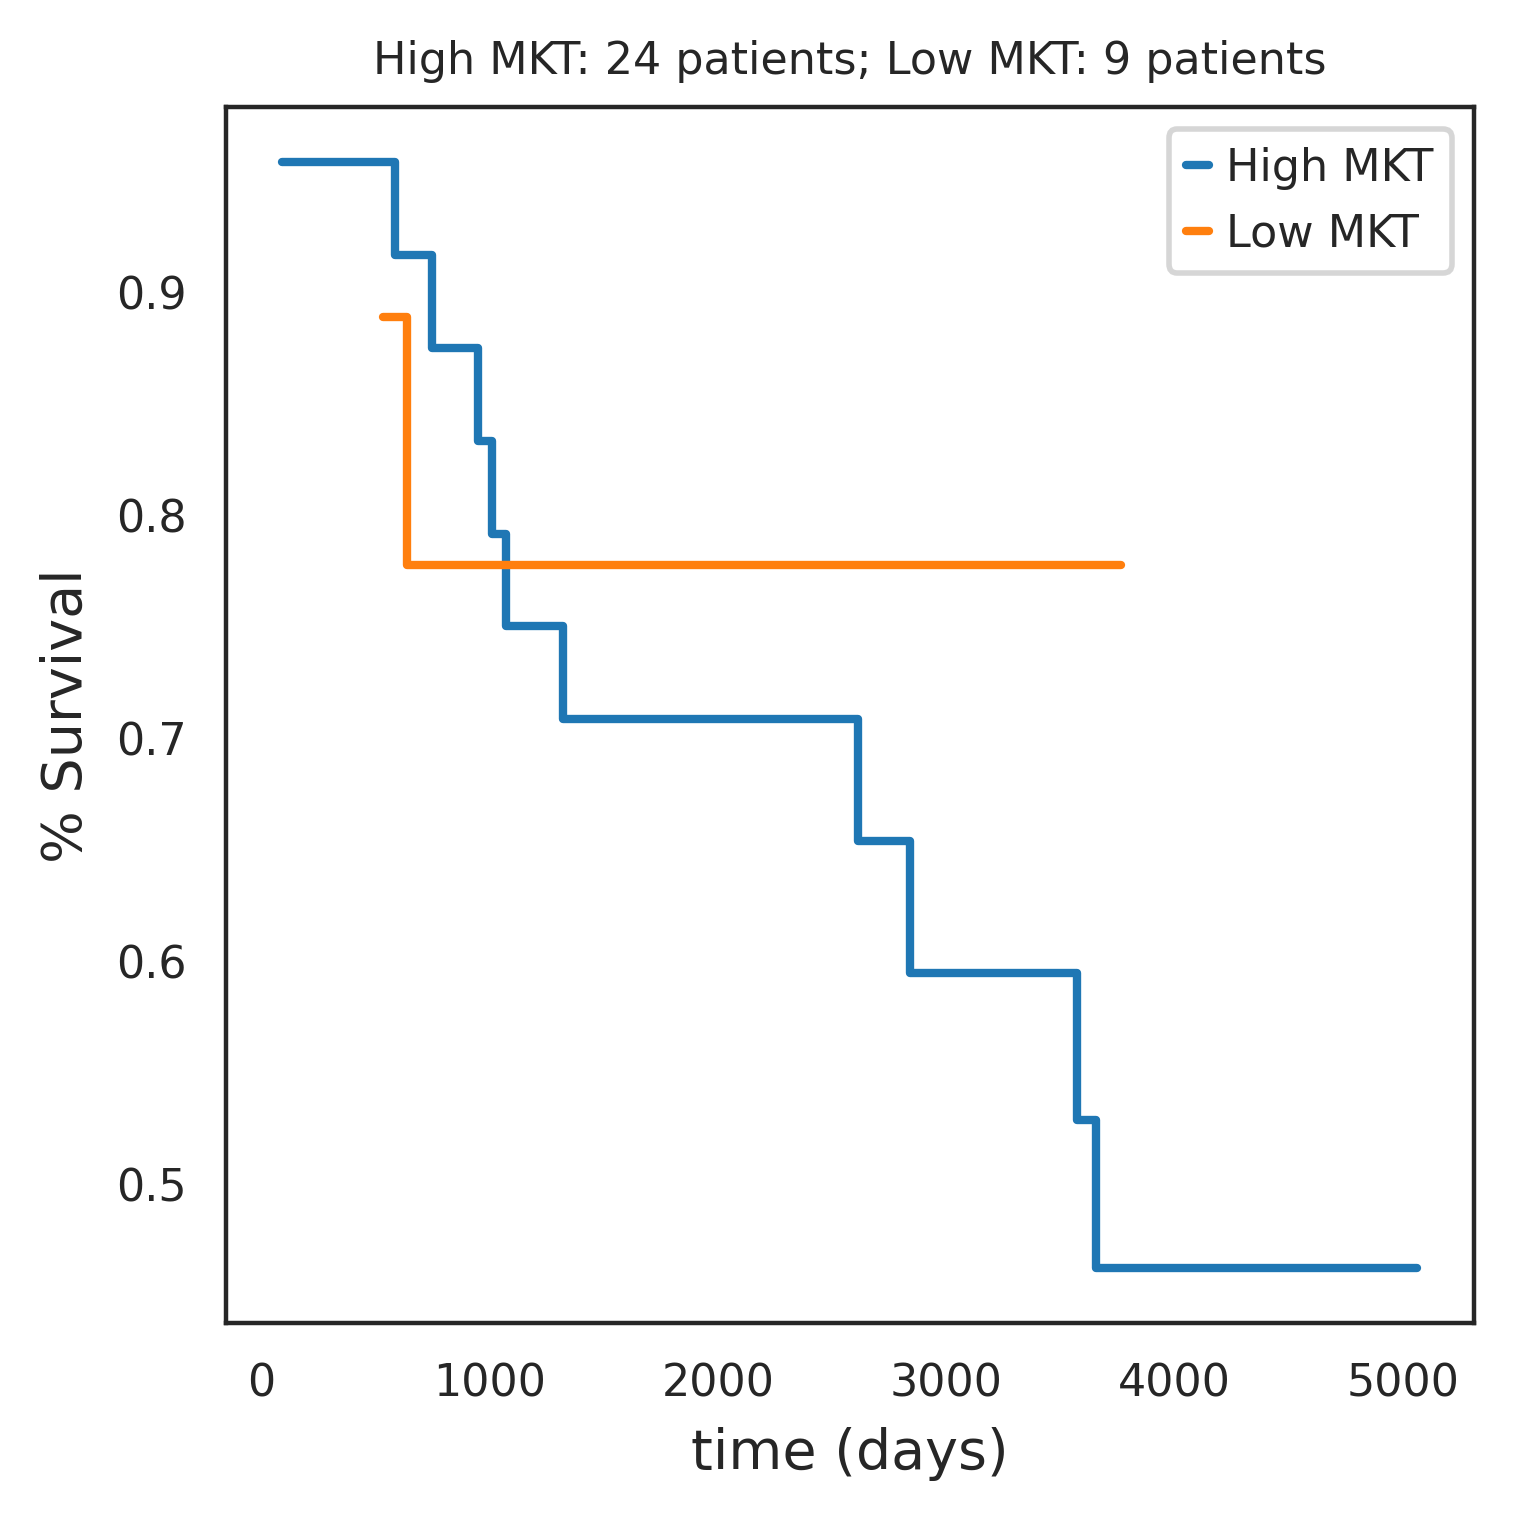

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


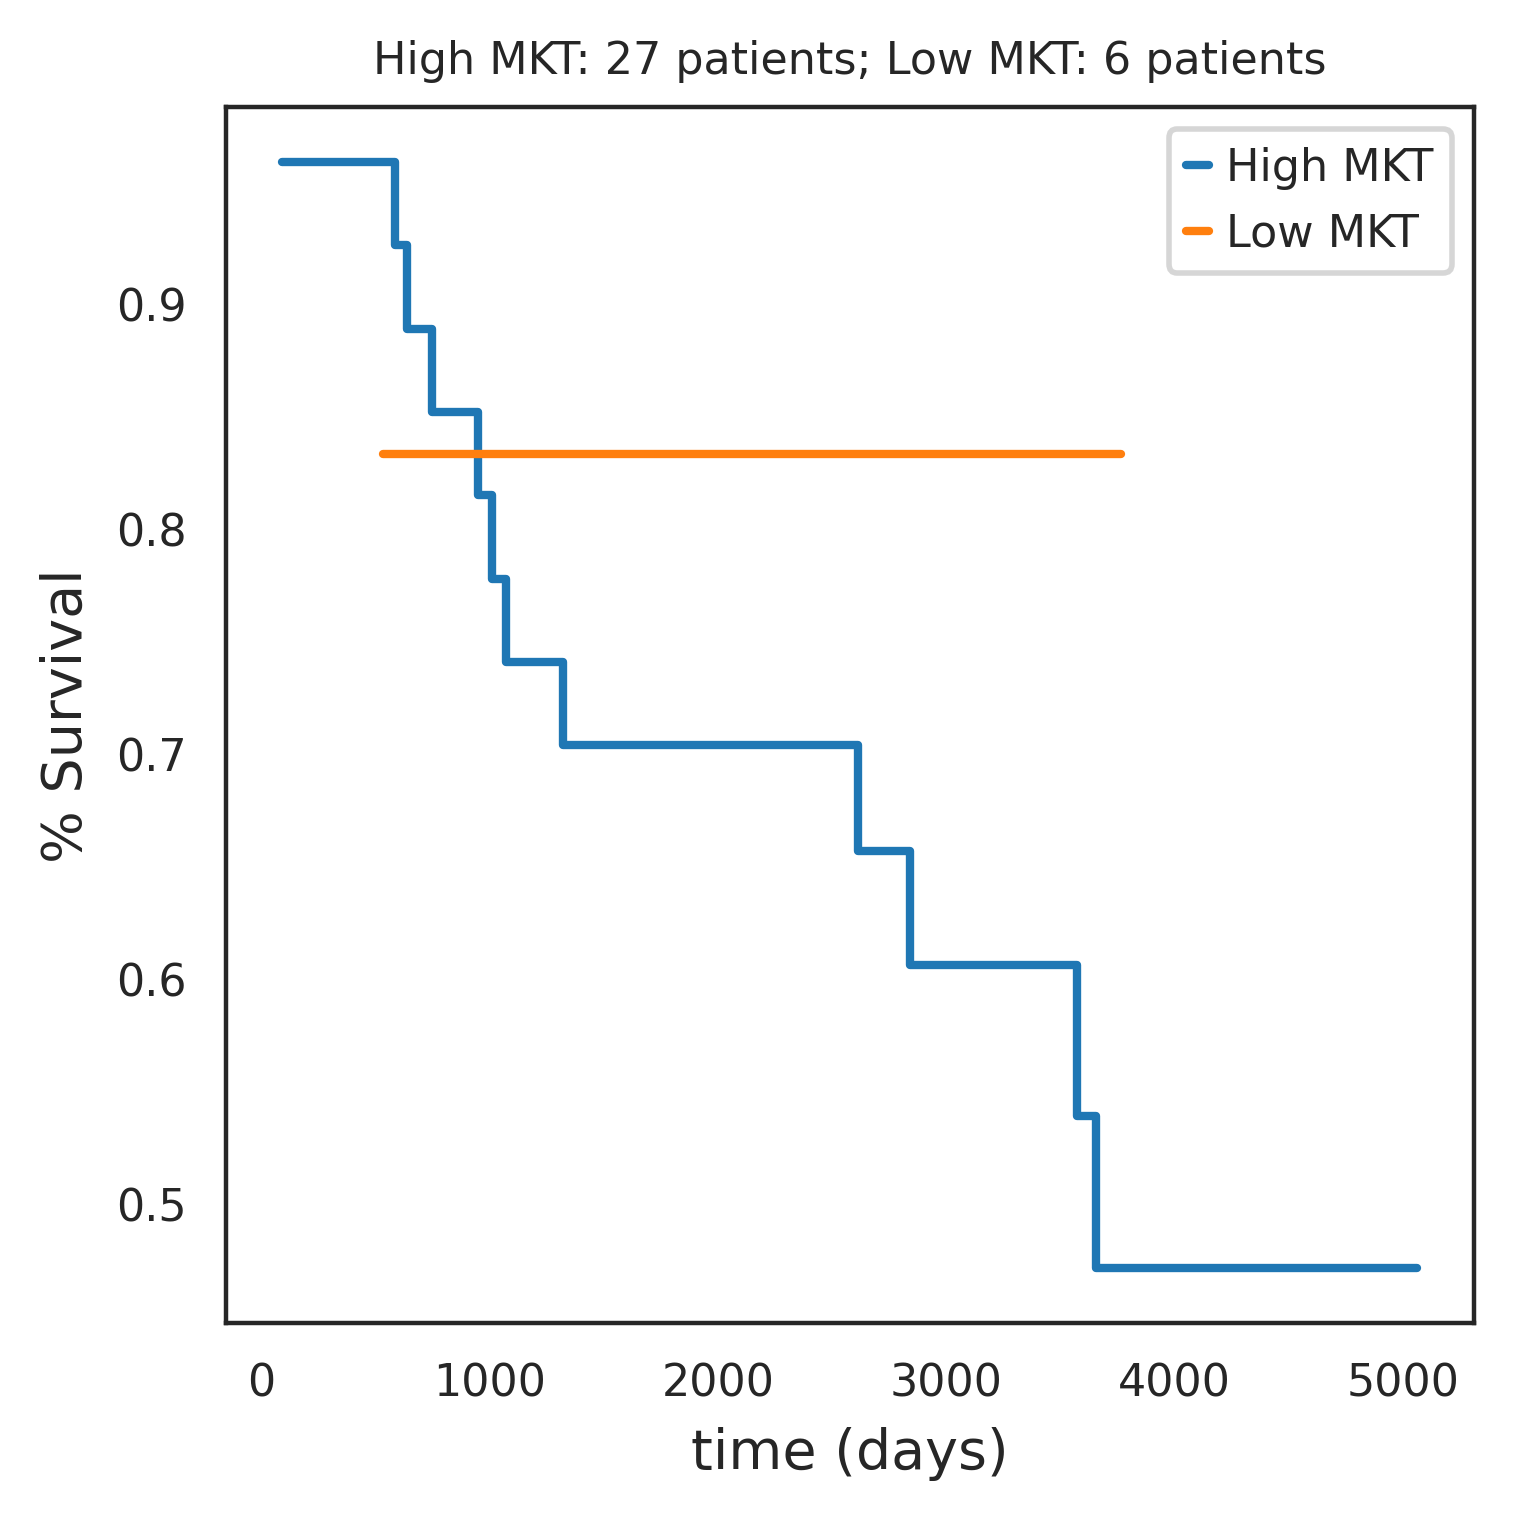

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


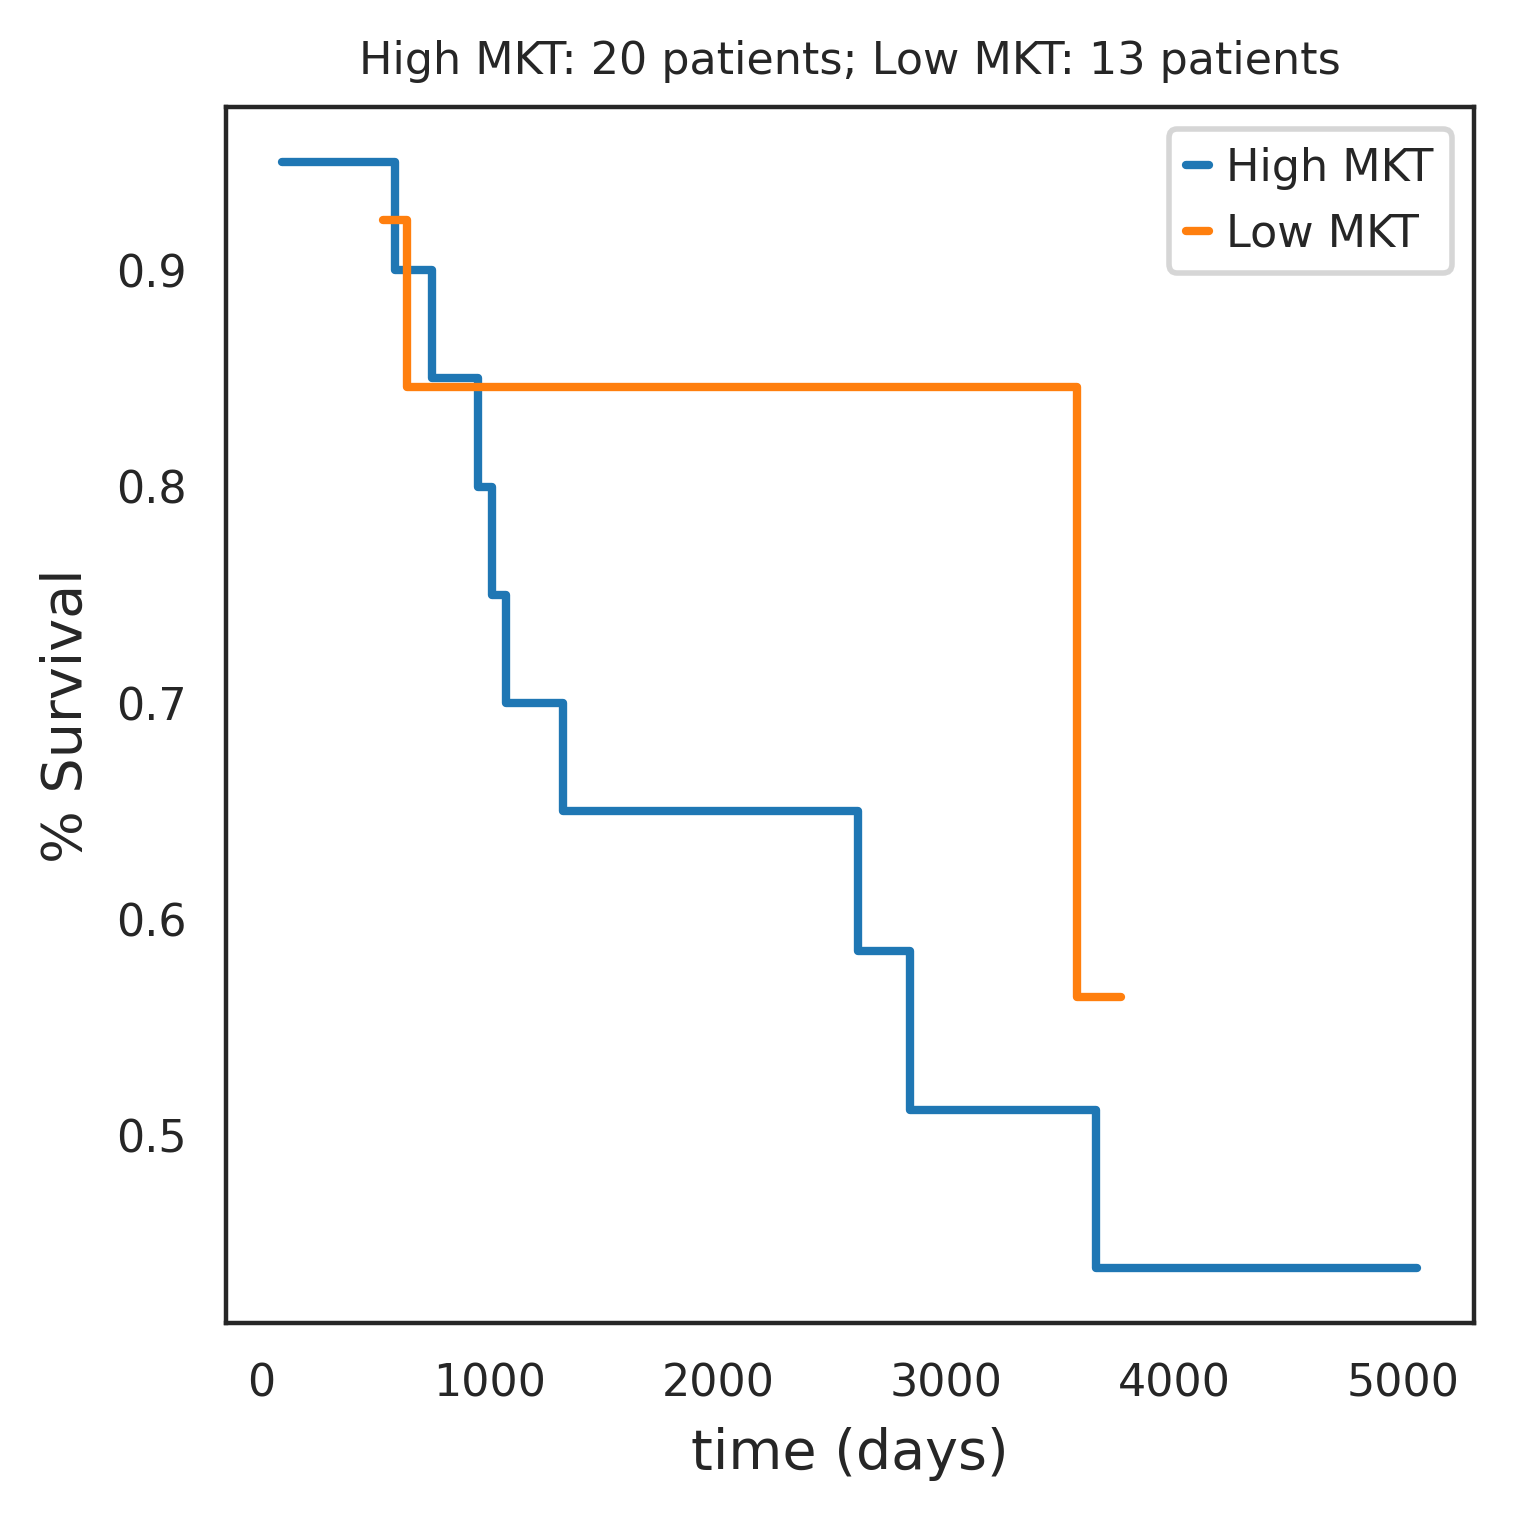

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


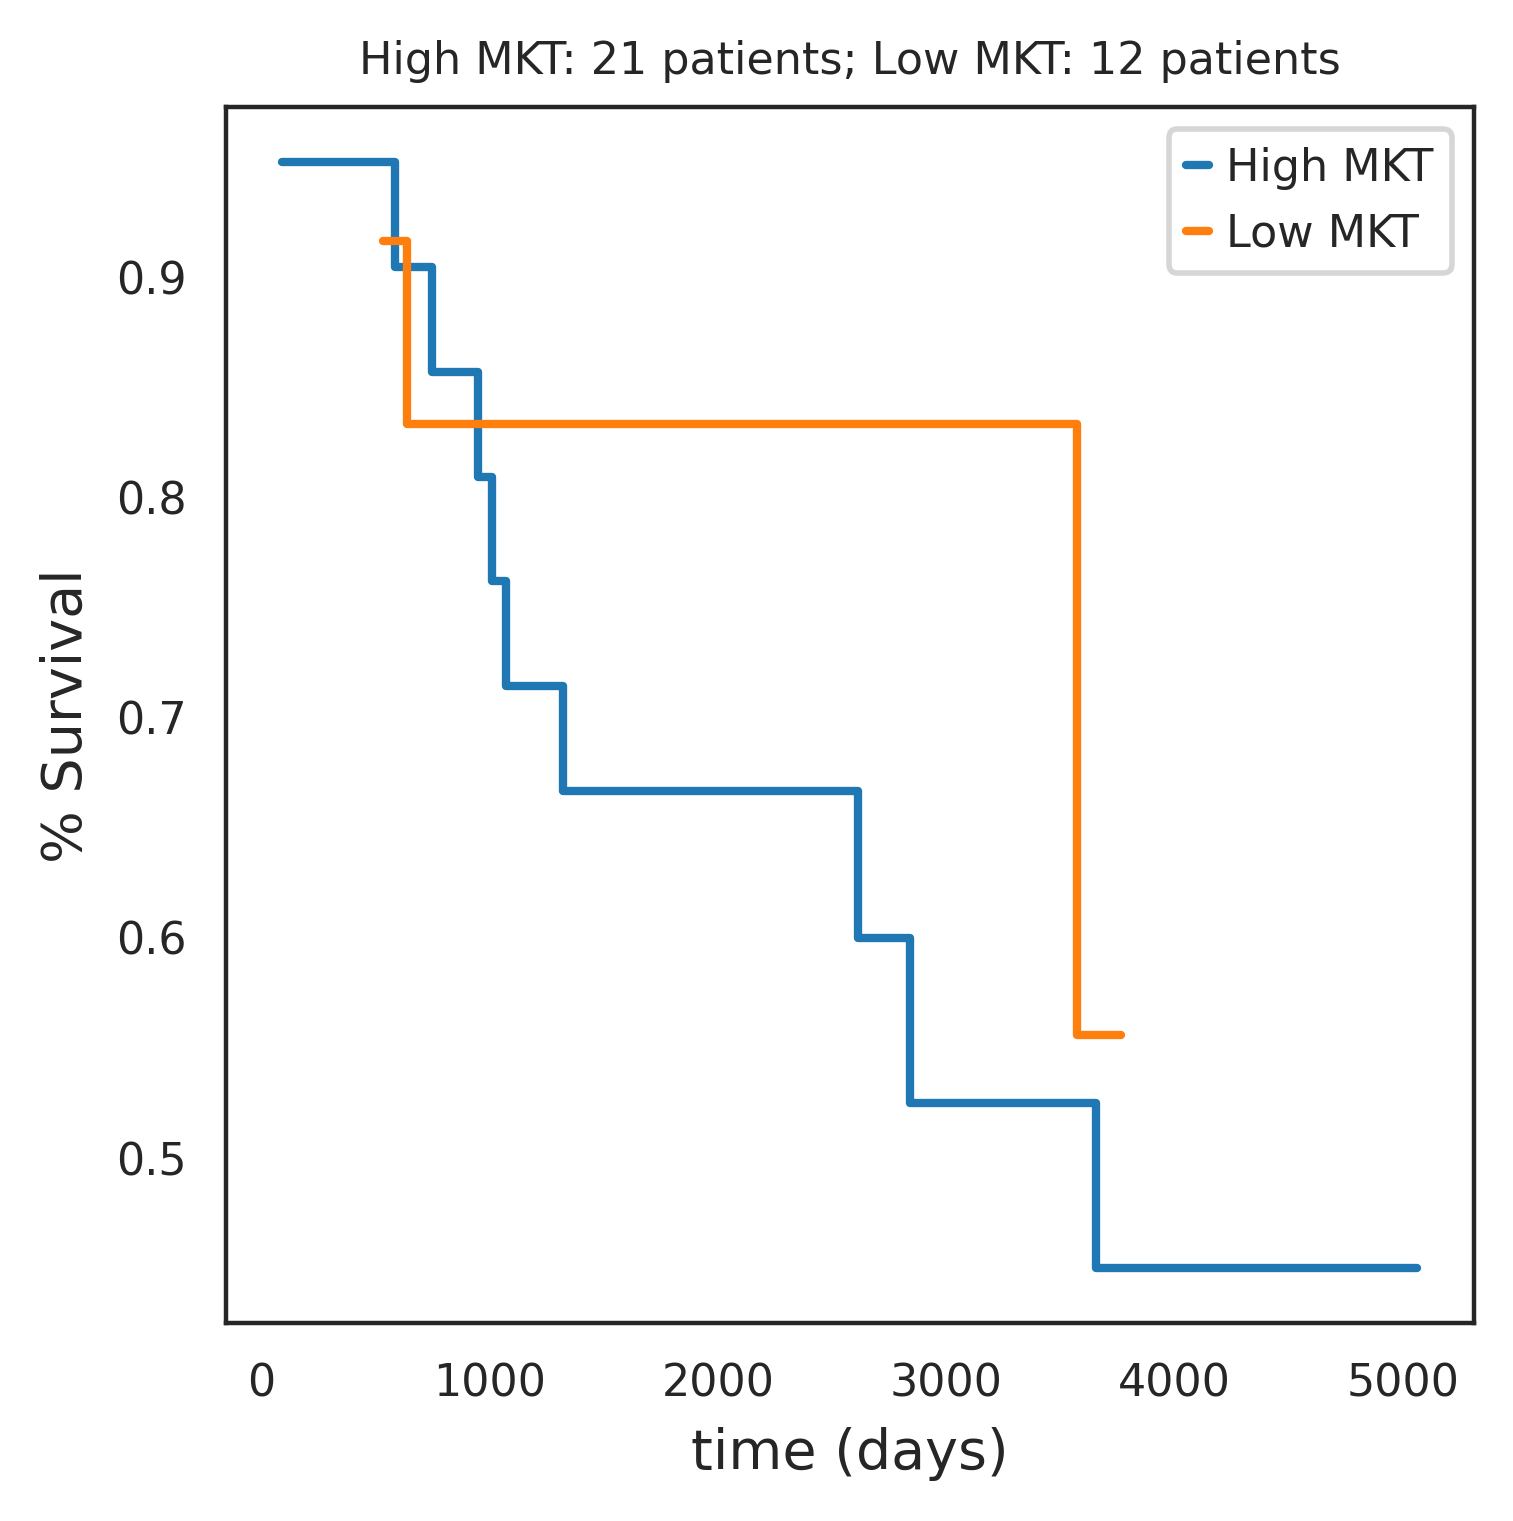

/tmp/ipykernel_28642/1399111705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]


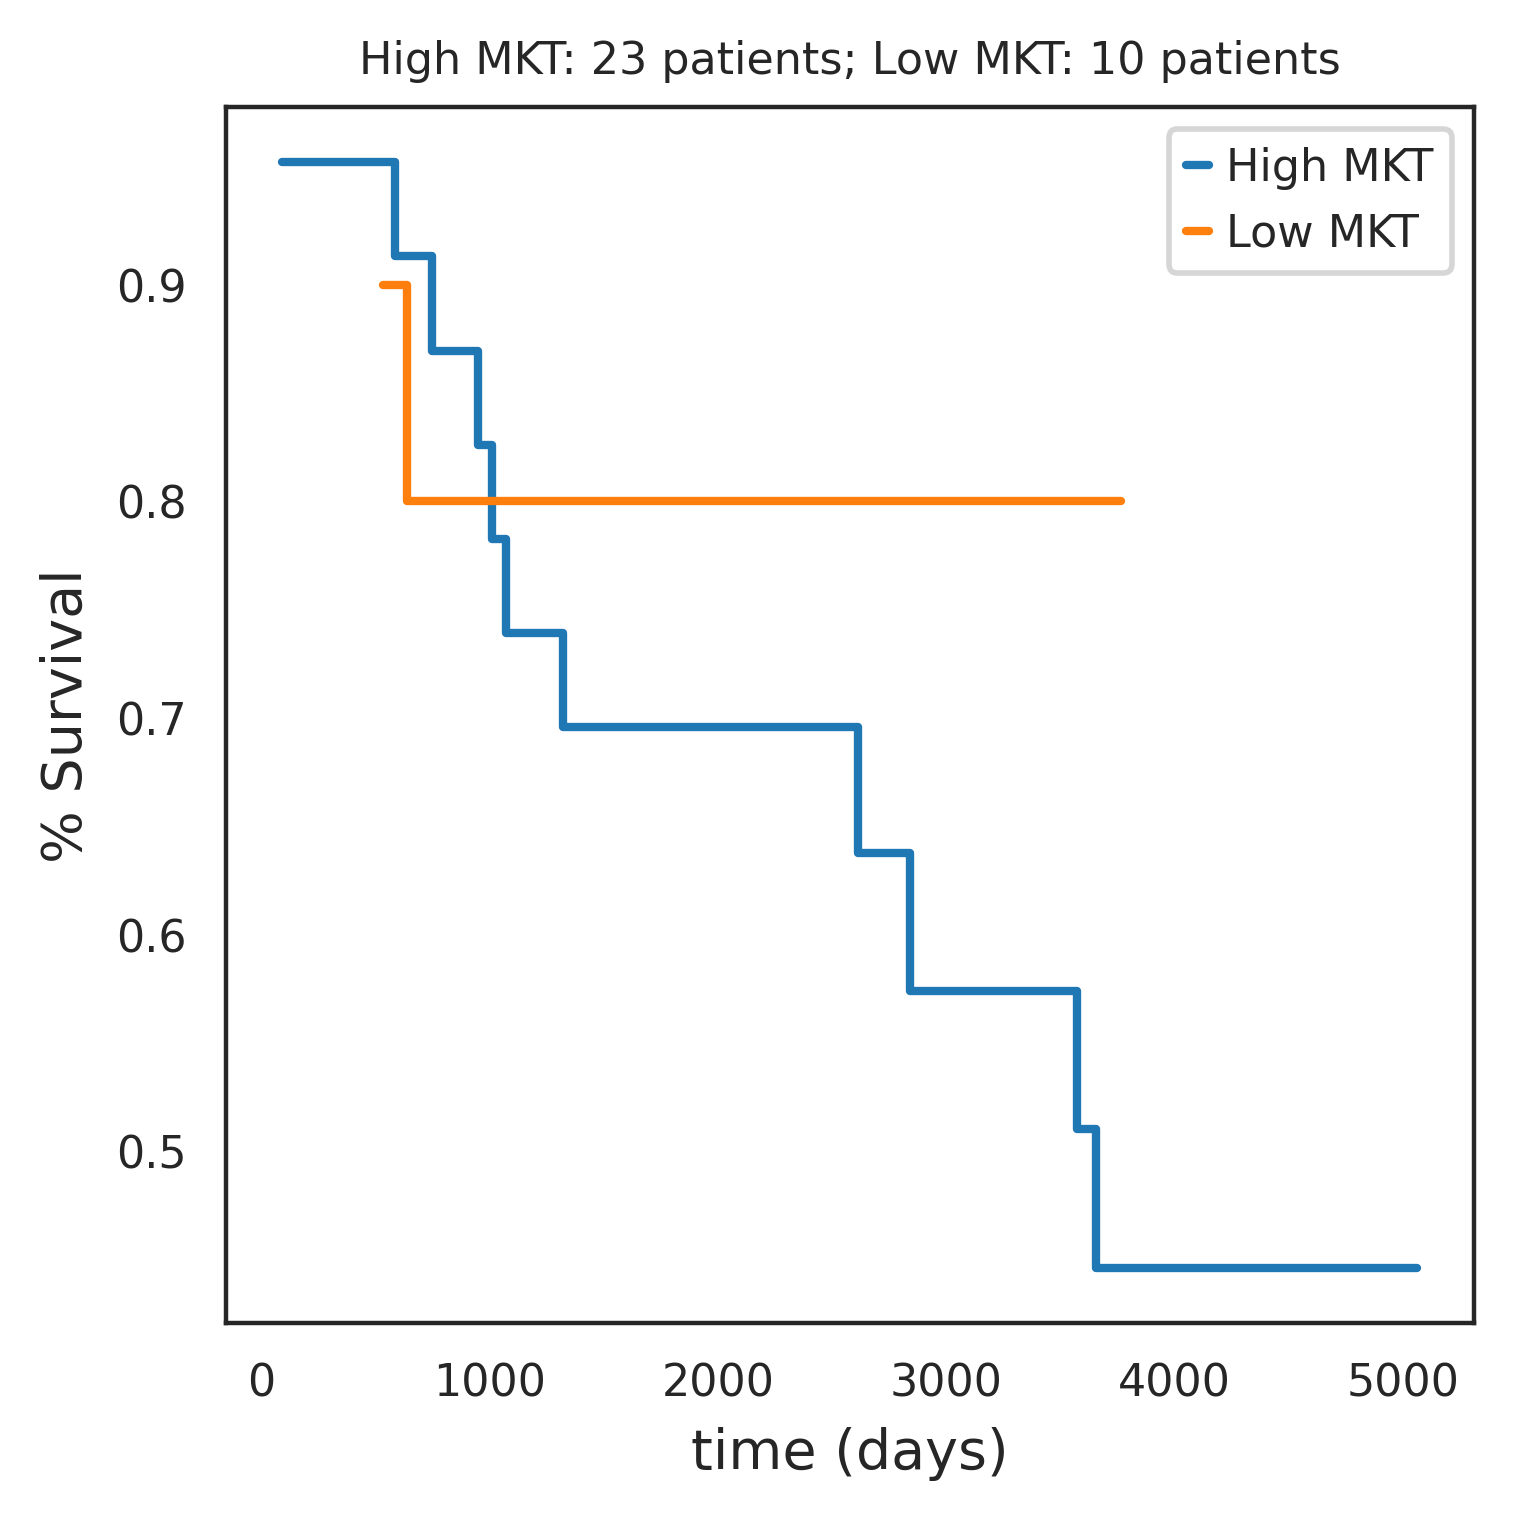

In [268]:
# MKT_cutoff = 0.6189493652095163
MKT_cutoff_list = pd_df_valid['occurrence_score']
# MKT_cutoff_list = [MKT_cutoff_list[10]]
# MKT_cutoff_list = [0.6189493652095163]

for MKT_cutoff in MKT_cutoff_list:
    data_x['MKT'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]
    high_num = np.sum(pd_df_valid['MKT']=='High MKT')
    low_num = np.sum(pd_df_valid['MKT']=='Low MKT')
    
    # high_num = pd_df_valid['MKT'].value_counts()['High MKT']
    # low_num = pd_df_valid['MKT'].value_counts()['Low MKT']
    if high_num ==0 or low_num==0:
        continue
    # if 'High MKT' not in 
    for treatment_type in ("High MKT", "Low MKT"):
        mask_treat = data_x["MKT"] == treatment_type
        time_treatment, survival_prob_treatment = kaplan_meier_estimator(
            data_y["censored"][mask_treat],
            data_y["survival"][mask_treat])

        plt.step(time_treatment, survival_prob_treatment, where="post",
                 label="%s" % treatment_type)

    
    plt.title(f'High MKT: {high_num} patients; Low MKT: {low_num} patients')
    plt.ylabel("% Survival")
    plt.xlabel("time (days)")
    plt.legend(loc="best")
    plt.show()

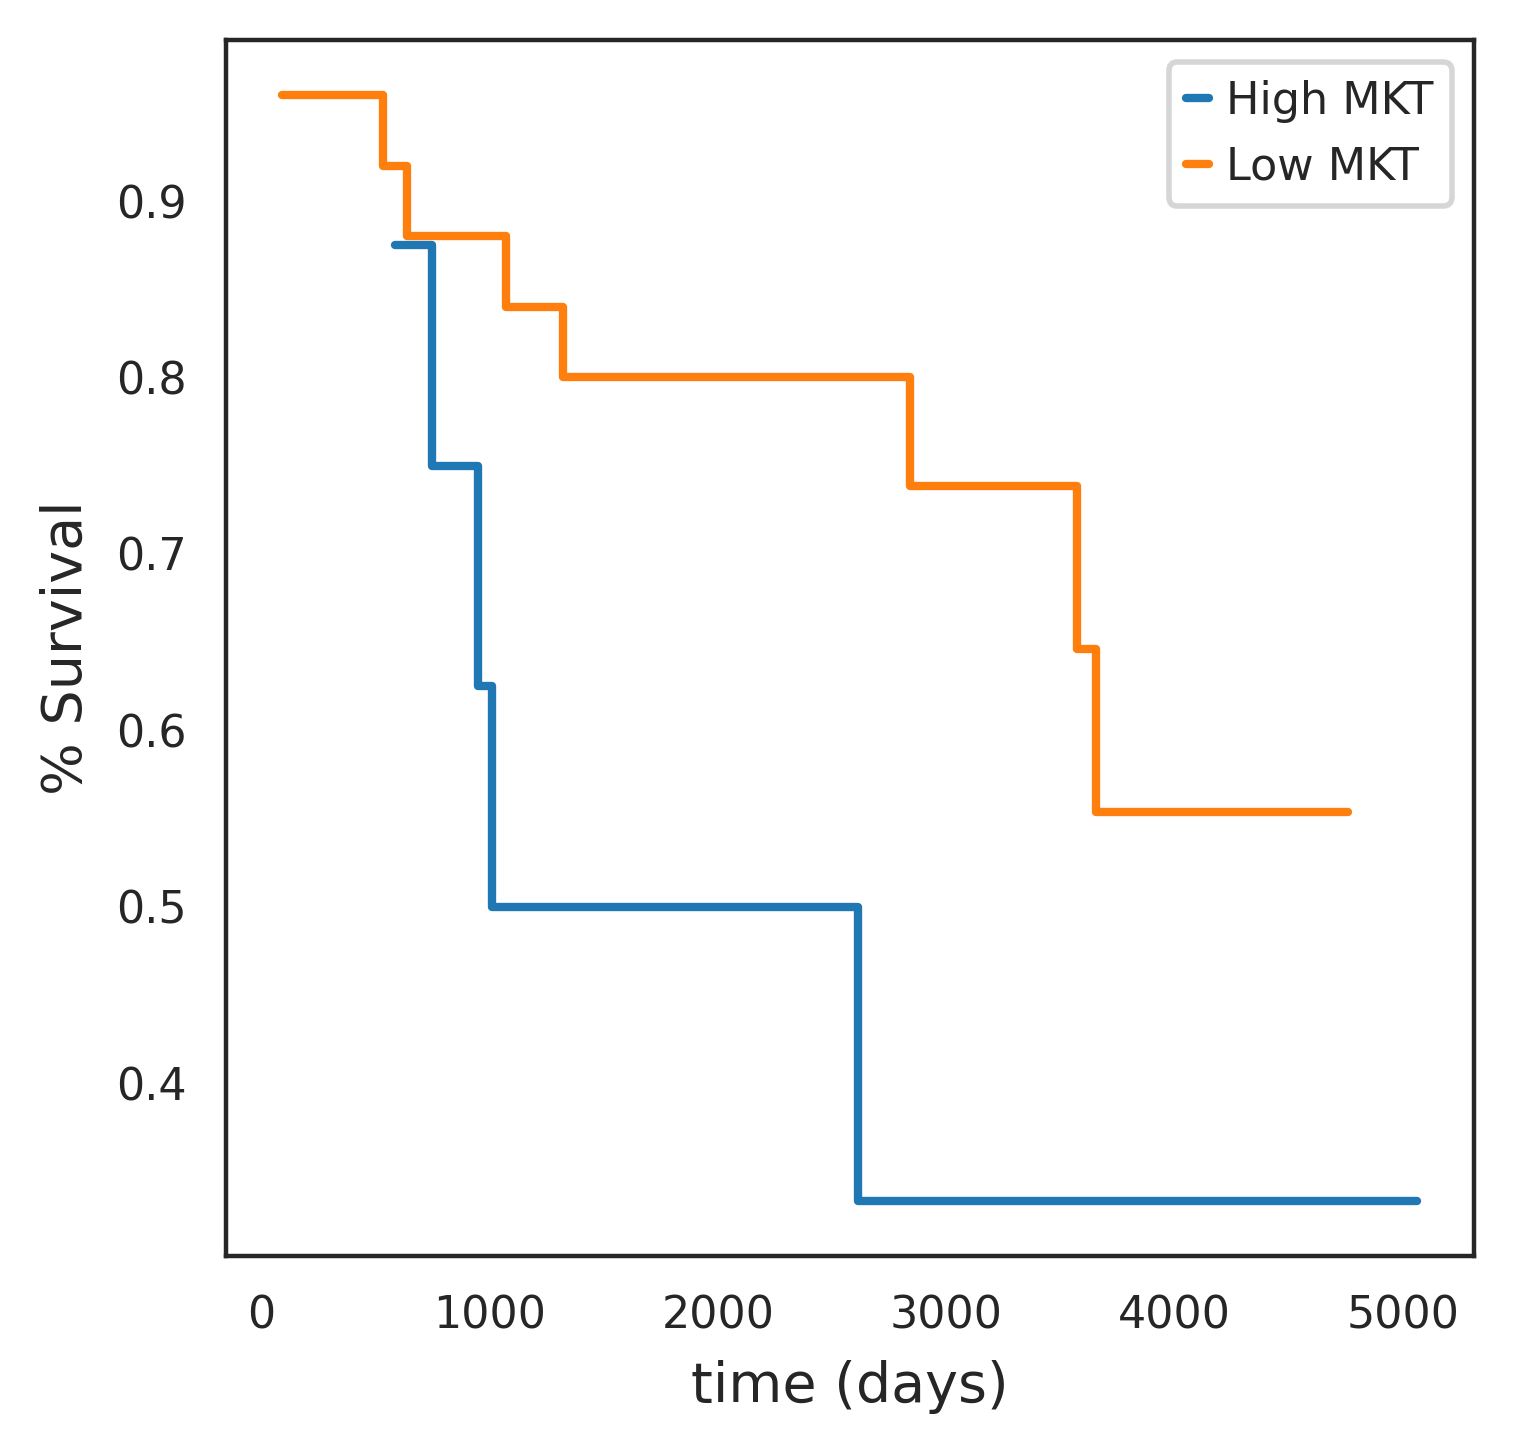

In [249]:
for treatment_type in ("High MKT", "Low MKT"):
    mask_treat = data_x["MKT"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["censored"][mask_treat],
        data_y["survival"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="%s" % treatment_type)

plt.ylabel("% Survival")
plt.xlabel("time (days)")
plt.legend(loc="best")

# survival analysis (ME)

In [84]:
sns.

Unnamed: 0  patient TNBC  ME_int  ME_int_bg_mean  ME_int_bg_var  \
0            0        1    M     450         596.372    1496.681616   
1            1        2    M    1219        1421.060    1823.772400   
2            2        3    C     553        2355.546    3185.959884   
3            3        4    C     127        1679.308    2284.893136   
4            4        5    C     458        3016.570    3069.369100   
5            5        6    C     417        1212.210    1832.833900   
6            6        7    M      25          19.972      51.711216   
7            7        8    M     162         259.174     572.691724   
8            8        9    C     832        2582.146    2818.816684   
9            9       10    C    1347        2609.638    2733.018956   
10          10       11    M    1090        1562.092    2328.239536   
11          11       12    M    2485        4014.868    3807.882576   
12          12       13    M    2372        5515.142    4826.509836   
13          13       14    M     673        1260.778    2312.080716   
14          14       16    C     379        3207.746    3196.581484   
15          15       17    M    1330        2246.068    3751.831376   
16          16       18    M     228         199.866     540.104044   
17          17       20    M     515         967.004    1798.455984   
18          18       21    M       7          24.398      77.307596   
19          19       23    M     155         360.368     745.232576   
20          20       27    M     108         197.248     380.550496   
21          21       28    C      86         567.070    1417.929100   
22          22       29    M     877        2366.666    2826.026444   
23          23       31    M      30          31.334      79.270444   
24          24       32    C    1997        4508.830    2110.077100   
25          25       33    M     145         177.190     497.841900   
26          26       34    C     388        1010.152    1722.708896   
27          27       35    C      41         427.414    1084.854604   
28          28       36    C     360        1232.320    2235.301600   
29          29       37    C     709        3398.994    5269.765964   
31          31       39    M     925        2798.638    2649.106956   
32          32       40    C     123         379.546     951.931884   
33          33       41    C     398        1302.046    2322.191884   

    ME_int_bg_std  occurrence_score  survival  censored  
0       38.686970          0.754563      2612         0  
1       42.705648          0.857810       745         0  
2       56.444308          0.234765      3130         1  
3       47.800556          0.075626      2523         1  
4       55.401887          0.151828      1683         1  
5       42.811609          0.344000      2275         1  
6        7.191051          1.251752       584         0  
7       23.930978          0.625063       946         0  
8       53.092529          0.322213      3767         1  
9       52.278284          0.516164      3822         1  
10      48.251835          0.697782      3774         1  
11      61.708043          0.618949      4353         1  
12      69.473087          0.430089      1072         0  
13      48.084100          0.533797      4145         1  
14      56.538319          0.118151       530         0  
15      61.252195          0.592146      2842         0  
16      23.240139          1.140764      5063         1  
17      42.408207          0.532573      4761         1  
18       8.792474          0.286909       635         0  
19      27.298948          0.430116        91         0  
20      19.507704          0.547534      3658         0  
21      37.655399          0.151657      3767         1  
22      53.160384          0.370563      1319         0  
23       8.903395          0.957426      1009         0  
24      45.935576          0.442909      1568         1  
25      22.312371          0.818331      1738         1  
26      41.505528      

In [145]:
pd_df_valid['occurrence_score']

0     0.754563
1     0.857810
2     0.234765
3     0.075626
4     0.151828
5     0.344000
6     1.251752
7     0.625063
8     0.322213
9     0.516164
10    0.697782
11    0.618949
12    0.430089
13    0.533797
14    0.118151
15    0.592146
16    1.140764
17    0.532573
18    0.286909
19    0.430116
20    0.547534
21    0.151657
22    0.370563
23    0.957426
24    0.442909
25    0.818331
26    0.384101
27    0.095926
28    0.292132
29    0.208591
31    0.330518
32    0.324071
33    0.305673
Name: occurrence_score, dtype: float64

In [176]:
MKT_cutoff_list = pd_df_valid['occurrence_score']
MKT_cutoff_cols = []
for MKT_cutoff in MKT_cutoff_list:
    MKT_cutoff_cols.append(f'MKT_{MKT_cutoff}=Low MKT')
    pd_df_valid[f'MKT_{MKT_cutoff}'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]
    pd_df_valid[f'MKT_{MKT_cutoff}'] = pd_df_valid[f'MKT_{MKT_cutoff}'].astype('category')

/tmp/ipykernel_28642/1090306627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_valid[f'MKT_{MKT_cutoff}'] = ['High MKT' if MKT> MKT_cutoff else 'Low MKT' for MKT in pd_df_valid['occurrence_score']]
/tmp/ipykernel_28642/1090306627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_df_valid[f'MKT_{MKT_cutoff}'] = pd_df_valid[f'MKT_{MKT_cutoff}'].astype('category')


In [90]:
from sksurv.datasets import load_veterans_lung_cancer

data_x = pd_df_valid
# data_y = list(zip(pd_df_valid['censored'].astype('bool'),pd_df_valid['survival']))
data_y = pd_df_valid[['censored','survival']]
# data_y['censored'] = data_y['censored'].astype('bool')
data_y['censored'] = (1-data_y['censored']).astype('bool')

/tmp/ipykernel_28642/1413051459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y['censored'] = (1-data_y['censored']).astype('bool')


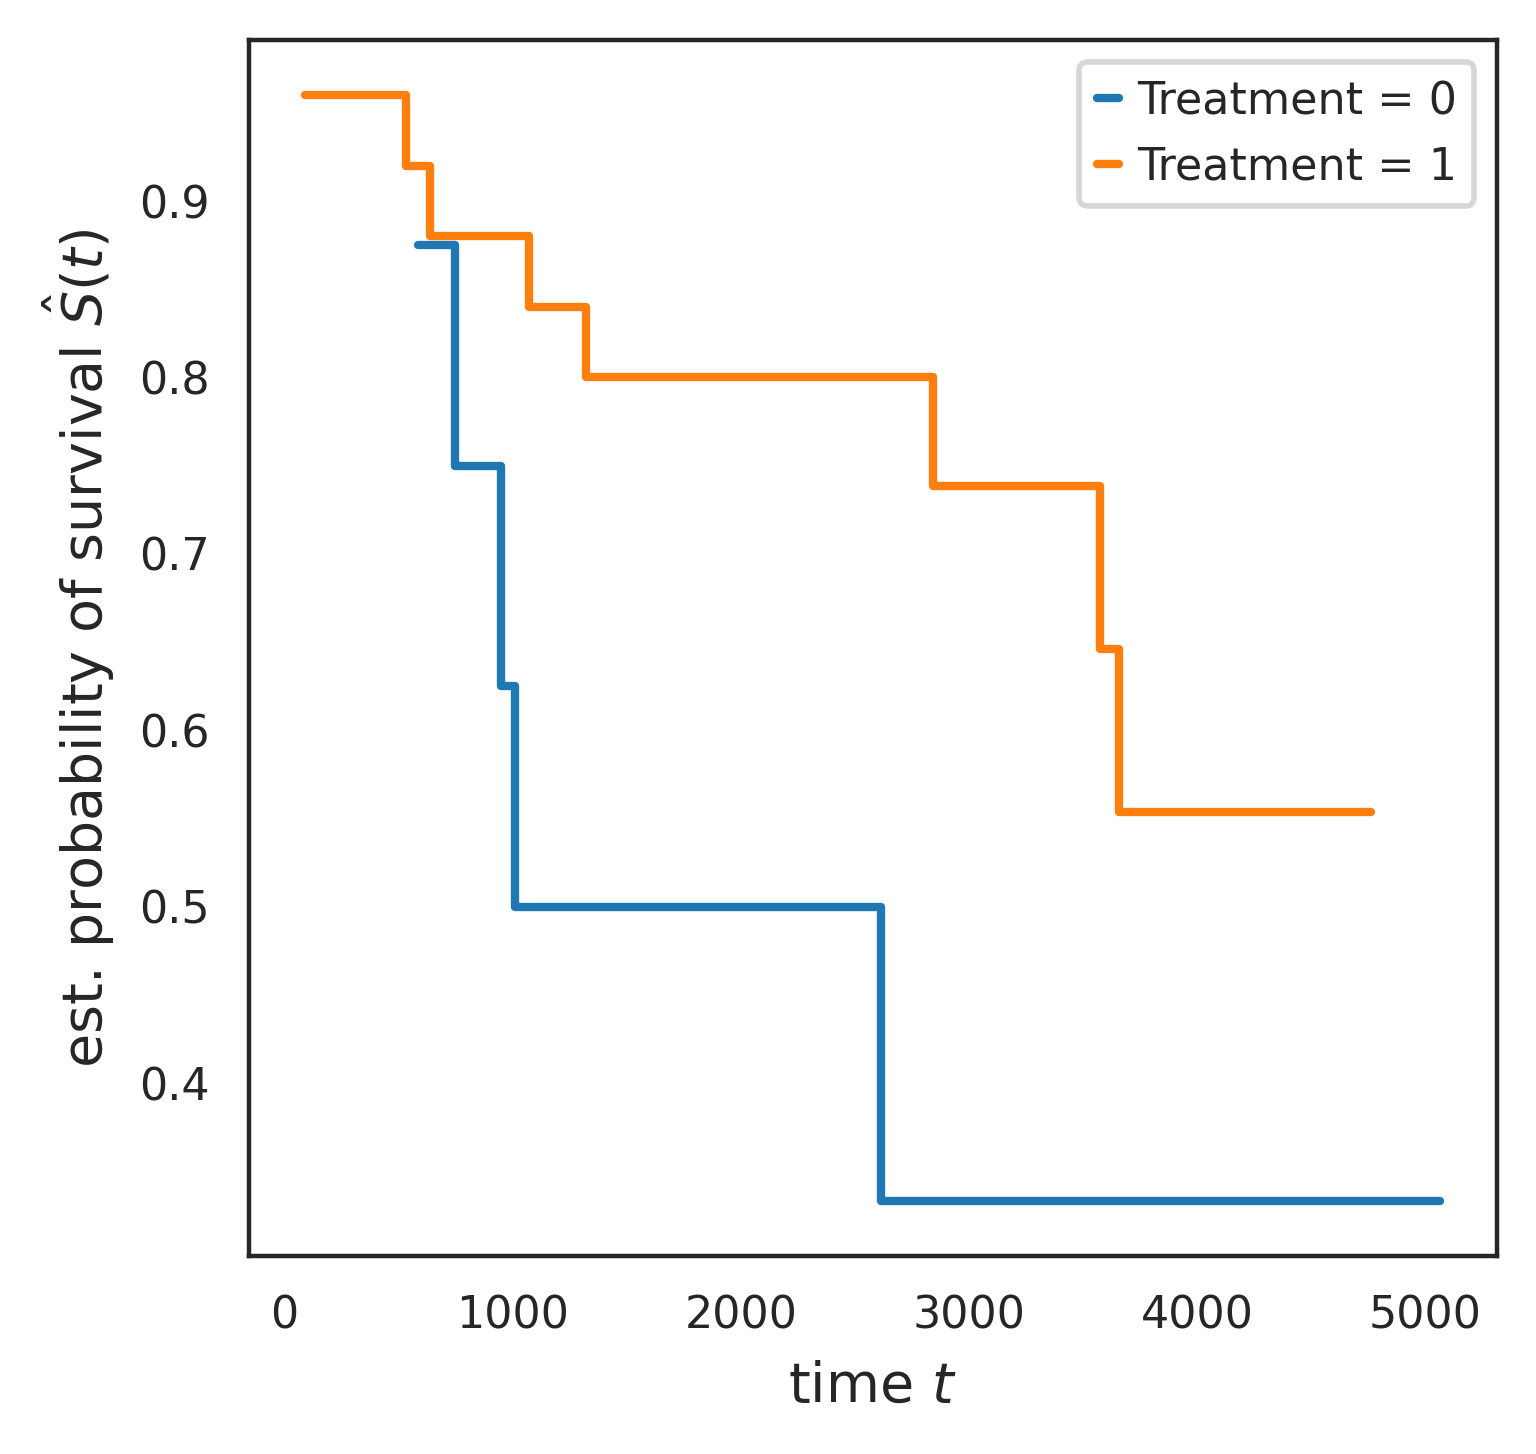

In [193]:
for treatment_type in (0, 1):
    mask_treat = darta_x_numeric["MKT_0.6189493652095163=Low MKT"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["censored"][mask_treat],
        data_y["survival"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")